In [1]:
# 2022-10-17 10:30 Понед Фр
# Анализ и прогнозирование временного ряда стоимости уля.
# На Основе Project_01_Commodity/TS_commodity_14.ipynb. Пересчет в золото и нефть, Корреляция. Шкалирование. 
# Логарифм.изм. дневных стоймостей угля в разн ед.изм.
# ARIMA. Прогноз на основе ARIMA. Прогоноз получился, но очень примитивный. TS_Coal_01.ipynb

# 2022-10-18 10:25 Фр TS_Coal_02.ipynb. Изменил деление при расчете в золоте и нефти
# Добавляю сглажив и эспоненц сглаж.
# Начал sktime

# 2022-10-19 10:20 Фр TS_Coal_03.ipynb. Добавил скользящ средн., закоммент лишнее, по чистил прогноз ARIMA, VAR

# 2022-10-20 10:45 Фр TS_Coal_04.ipynb. Добавить корректн временн индексы в прогнозн знач. Продолжить прогоз в золоте и нефти

# 2022-10-21 15:50 пятн Нвг TS_Coal_05.ipynb. Убираю лишее. 
# Также делаю проверку прогоноза на фактических данных. 

# 2022-10-22 11:20 субб Огн TS_Coal_07.ipynb. (В варианте 06 намудрил с автозаменой). 
# Добавить полосы Боллинджера. См. библиотеку TA-Lib (не смог установить на Linux). 
# Пересечен скольз средних. VAR прогноз по оценке всех активов в золоте и нефти
# 2022-10-22 15:15 субб Огн TS_Coal_08.ipynb.

# 2022-10-23 11:25 вскр Огн TS_Coal_09.ipynb. Добавляю библ визуал граф mplcyberpunk

# 2022-10-23 16:25 вскр Огн TS_Coal_10.ipynb

# 2022-10-24 10:20 понед Фр TS_Coal_11.ipynb. Пробую Darts - удалил не пошло
# надо пробовать алгоритм из: 01a_forecasting_sklearn_1.ipynb.

# 2022-10-25 10:15 вторн Фр TS_Coal_11.ipynb. Также взять в работу скрипт "LSTM_CodeTrading_2.ipynb"
# Гипотеза. Ещё раз взглянуть на скользящие средние на шкалир данным. LSTM убрал в отдельный файл

# 2022-10-25 15:50 вторн Фр TS_Coal_12.ipynb.# Еще смотрел tutorial 

# 2022-10-27 11:10 чтв Фр TS_Coal_13.ipynb. 
# Добавил в папку файл Coal_BollingerBand_1.ipynb - данные технич. анализа по углю на основе pandas_ta и интреакт визуализ.
# 16:00 Делал пробный доклад Евгению. Надо укороить скрипт, добавить тестовое осмысленное изложение, добавить или убавить активы.

# 2022-10-28 11:40 пятн Нвг TS_Coal_14.ipynb. Вернул S&P500, NASDAQ

# 2022-10-30 14:20 вскр Огн TS_Coal_15.ipynb. Делаю ссылки как стандартах html. Из вар 15 убрал расчеты по statsmodels ARIMA, как изыточные.
# создал TS_Coal_PCA_1.ipynb для тестирования

# 2022-10-31 10:00 пнд Фр TS_Coal_16.ipynb
# добавил в sktime прогноз VARMAX, Prophet. Еще научится добавлять параметры

# 2022-11-01 10:40 пнд Фр TS_Coal_17.ipynb
# делаю различн методы прогнозиров. Потом проверка на фактич пяти - семи прошл периодов и прогноз на 2-3 периода вперед. Потом все автоматизировать.
# еще ни как не решил задачу с прогнозом по дневн знач методом VAR, только по месячному df получается.

# 2022-11-02 10:20 вторн Фр Фр TS_Coal_18.ipynb
#  Собираю данные акций что бы на них запустить sktime VAR для угля. Создал папку Moex: moex_2.ipynb
# работал с файлом TS_coal_comm_moex_1.ipynb, moex_2.ipynb изучал точность прогноза для факт периода при разных составляющих предикторов.

# 2022-11-04 09:30 пятн (5 нояб продолжил в этом же варианте) Огн TS_Coal_19.ipynb. Автоматизация загрузки. Еще надо запустить sktime Multi..

# 2022-11-06 10:20 вскр Огн TS_Coal_20.ipynb

# 2023-03-15 15:00 срд Фр вар 21. Читал книгу агоритм торг.. и вернулся к этому файлу когда уткнулся в ARIMA 
# сейчас пошли сложности с pandas_datareader : TypeError: string indices must be integers
# pip install pandas_datareader==0.9.0
# пытаюсь перейти я yfinance. Переустановил yfinance - данные стали загружаться

# 2023-06-09 14:00 птн TS_Coal_22.ipynb. Пробую для публикации на https://hub.mos.ru/
# вар 23 Пошли ошибки с библ Prophet. убрал

# 2023-06-23 11:00 птн Фр. Думаю о публикации на Хабр. Добавляю Разложение временного ряда на компоненты statsmodels.tsa.api

# 2023-08-16 17:00 срд Фр. вар 25. Опять вернулся к этим вариантам. Повторяю и смотрю что с прогнозам

###### Start

<a name="top"></a>


### <h3>Оглавление / Краткое содержание</h3>

## <h2><a href=#part_1><b>Часть первая</b></a></h2>

### 01. <a href=#Library>Загрузка библиотек <b>Python</b></a>

### 02. <a href=#data>Загрузка данных</a>

<a href=#Coal>Уголь</a>

<a href=#Brent>Нефть</a>

<a href=#Gold>Золото</a>

<a href=#Silver>Серебро</a>

<a href=#Platinum>Платина</a>

<a href=#Alum>Алюминий</a>

<a href=#Cupper>Медь</a>

<a href="Commodity Index Future">Commodity Index Future</a>

### 03. <a href=#df1>Соединение все представленных временных рядов в один dateframe</a>


#### 03.1 <a href=#corr1>Корреляция временных рядов</a>
#### 03.2 <a href=#diff1>Ежедневная волотильность временных рядов</a>

### 04. <a href=#scaler1>Шкалирование временных рядов</a> 


### 05. <a href=#df_gold1>Перход к измерению в унциях золота</a>
####        05.1 <a href=#corr_gold1>Корреляция временных рядов выраженная в унциях золота</a>


### 06. <a href=#df_brent1>Перход к измерению в баррелях нефти</a>
####        06.1 <a href=#corr_brent1>Корреляция временных рядов выраженная в баррелях нефти</a>

### 07. <a href=#df2>Представление шкалированной стоимости угля в разных ед.измерения</a>
####        07.1 <a href=#corr2>Корреляция стоимости угля выраженная в разных единицах измеренния</a>


## <h2><a href=#part_2><b>Часть вторая</b></a></h2>

### 08. <a href=#sktime1>Построение прогнозов стоимости угля на основании использования библиотеки SKTIME</a>
#### 08.1 <a href=#sktime_arima1>Метод прогнозирования SKTIME ARIMA</a>
#### 08.2 <a href=#sktime_var1>Метод прогнозирования SKTIME VAR в долл.</a>
#### 08.3 <a href=#sktime_var2>Метод прогнозирования SKTIME VAR в унициях золота</a>
#### 08.4 <a href=#sktime_var3>Метод прогнозирования SKTIME VAR в баррелях нефти</a>



<a href=#Finish>Окончание</a>




## 00. Краткое содержание

Цель работы: провести анализ стоимости угля, проанализировать коррелирующие показатели, возможные предикторы и построить прогноз стоимости угля. 

<b>В первой части </b> данной работы представлен анализ временых рядов стоимости основных биржевых товаров, в том числе с преминением показателей из технического анализа. 
Произведен переход к единицам измерения такие как: унции золота, и  тонны нефти. В этим же единицах приведен анализ представленных временных рядов.

<b>Во второй части </b> произведено прогнозирование стоимости угля с использованием статистического анализа, глубокого обучения в нескольких единицах измерения. В последующем будет произведено прогнозирование с прменением нейроных сетей.

<b>Disclaimer. </b> Принимая во внимание, происходящие события, стирающие понятие рыынка, свободного ценообразования, котировок и т.д. все нежеизложенные рассуждения стали носить умозрительный характер, которые могли бы иметь основания в парадигмах, действовавших до 2022 года. 

### Введение


Динамика биржевых котировок товаров группы commodities подвержены значительной волатильности. Само изменения графиков, а также совокупность влияющих факторов (предикторов) на такие изменения стоимостей изучаются и анализируются как биржевыми спекулянтами так и учёными. 
Есть обоснованные предположения, что «Случайное блуждание — хорошая стартовая модель для описания финансовых временных рядов». Модель случайного блуждания предполагает, что движение элемента (или группы элементов) не предсказуемо.
Поэтому попробуем для оценки тенденций применить методы технического анализа, которые используют биржевые спекулянты.

Следующий возникающий вопрос заключается, а в чем мы производим измерения и почему именно в долл. или фунтах. Однако, согласитесь, что трудно что-либо «измерять» если твоя «линейка» постоянно увеличивается и причем в некоторых случаях в геометрической прогрессии путём денежной эмиссии в долларах США (см. показатель M2 с сайта Федеральной резервной системы США (https://fred.stlouisfed.org/categories/29). В как же получить "абсолютный" эквивалент истинной стоимости. Ответить на данный вопрос достаточно затруднительно. Отсылаю к экономической теории и теории эффективного фондового рынка.

В таких условиях предлагаю рассмотреть возможность и "вернуться" к так называемому «золотому стандарту», добавить к нему ещё и «нефтяной стандарт», далее оценивать биржевые товары в унциях золота и баррелях нефти. Исходя из этого в данных расчётах использование «измеритель» в долл.США буду условно - только для пересчёта одних биржевых товаров в тройские унции и баррели.

Многофакторность влияющих предпосылок на волатильность и динамику цен приводит к признанию случайного блуждания, как основной гипотезы. Однако наличие причинно-следственных связей заметны даже не всегда осведомленным обывателям.

Во второй части:

Производится прогнозирование по временным рядам (с акцентом на прогноз стоимости тонны угля) с помощью пакета <a href="https://www.sktime.org/en/stable/">sktime</a>. (Также ссылка на <a href="https://github.com/sktime/sktime">GitHub sktime</a>)

Пакет Sktime является гибкой модульной платформой с открытым исходным кодом для задач, связанных с иследованиями временных рядов.


как многомерные воспользуемся моделью VAR - векторная авторегрессия. (https://ru.wikipedia.org/wiki/Векторная_авторегрессия) и построим прогноз стоимости активов на ближайшее будущее в разных единицах измерения.
Ключом к прогнозированию многомерных макроэкономических временных рядов является отображение как временных вариаций для каждого признака, так и возможных корреляций между ними в каждом периоде. Модель VAR служит таким целям, используя матрицы в качестве коэффициентов для отображения линейных зависимостей между периодами и между объектами. Он предполагает случайный процесс, который генерирует данные, и пытается оценить параметры модели, которые можно рассматривать как плавное приближение к структуре, которая сгенерировала данные.



## <h2><a name="part_1"><b>Часть первая</b></a></h2>

### 01. Загрузка библиотек

<a name="Library"></a>

<a href="#top">К оглавлению</a>

In [2]:
#  Загрузка необходимых библиотек Python


import numpy as np
import pandas as pd


import pandas_datareader as pdr

import yfinance as yf


import matplotlib.pyplot as plt
from matplotlib import pyplot

import mplcyberpunk


from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize


#for ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.api as sm


# Для разлож временного ряда на компаненты
import pandas_datareader.data as web
import statsmodels.tsa.api as tsa

from pylab import rcParams

import itertools

import warnings

from scipy.stats import pearsonr, spearmanr

# sktime

from sktime.registry import all_estimators

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.var import VAR
from sktime.forecasting.varmax import VARMAX
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.theta import ThetaForecaster

from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.forecasting.model_selection import (
   ForecastingGridSearchCV,
   ExpandingWindowSplitter)
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_evaluation import evaluate


from sktime.utils import plotting
from sktime.utils.plotting import plot_series

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError


import pandas_ta as ta

import datetime as dt


import prophet

In [3]:
# Задание параметров вывода 
# Формат чисел
# pd.option_context('display.float_format', '{:0.20f}'.format)
pd.set_option("display.precision", 5)

pd.set_option('display.max_columns', 25)
# pd.set_option('display.max_rows', 15)

# настройка графиков
plt.style.use("cyberpunk")


In [4]:
# Сегодня

today = pd.Timestamp.now().normalize()
# today = pd.Timestamp.now().to_period('D')

today

Timestamp('2023-08-16 00:00:00')

### 02. Загрузка данных

<a name="data"></a>

<a href="#top">К оглавлению</a>

Загружаем данные с https://finance.yahoo.com/, сразу получаем представление в графике и строим datagrame по цене закрытия. 

Дату начала анализа временных рядов принял за 1 января 2015 года.


In [5]:
# Задание дата начала выборки данных. 

start='2008-01-01'



start

'2008-01-01'

In [6]:
# yfinance

start_date = dt.datetime(2020,1,1)
end_date =  dt.datetime(2023,3,10)
test = yf.download(tickers = "GOOGL", start = start_date, end = end_date)

test

[*********************100%***********************]  1 of 1 completed


Open     High      Low    Close  Adj Close    Volume
Date                                                               
2020-01-02  67.4205  68.4340  67.3245  68.4340    68.4340  27278000
2020-01-03  67.4000  68.6875  67.3660  68.0760    68.0760  23408000
2020-01-06  67.5815  69.9160  67.5500  69.8905    69.8905  46768000
2020-01-07  70.0230  70.1750  69.5780  69.7555    69.7555  34330000
2020-01-08  69.7410  70.5925  69.6315  70.2520    70.2520  35314000
...             ...      ...      ...      ...        ...       ...
2023-03-03  92.4800  93.7300  92.4500  93.6500    93.6500  35160100
2023-03-06  94.0200  95.9700  94.0000  95.1300    95.1300  32639300
2023-03-07  94.9800  95.6700  93.5300  93.8600    93.8600  27835500
2023-03-08  94.1200  95.9600  94.0000  94.2500    94.2500  34103300
2023-03-09  94.0500  95.5300  91.9000  92.3200    92.3200  28813500

[802 rows x 6 columns]

## Загрузка сразу нескольких тикеров с yahoo finance


In [7]:
### array(['^IXIC', '^GSPC', 'ZC=F', 'HG=F', 'ALI=F', 'NG=F', 'PL=F', 'SI=F','GC=F', 'BZ=F', 'MTF=F'], dtype=object)

tickers = ['^IXIC', '^GSPC', 'ZC=F', 'HG=F', 'ALI=F', 'NG=F', 'PL=F', 'SI=F','GC=F', 'BZ=F', 'MTF=F']

df0 = pd.DataFrame()


for tic in tickers:
    df_temp = yf.download(tic, start=start)
    df_temp['Ticker'] = tic 
    df0 = pd.concat([df_temp, df0])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df0

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-17    115.50000    115.50000    115.50000    122.50000    122.50000   
2010-12-20    122.50000    122.50000    122.50000    122.50000    122.50000   
2010-12-21    123.25000    123.25000    123.25000    123.25000    123.25000   
2010-12-22    125.50000    125.50000    125.50000    125.50000    125.50000   
2010-12-23    125.25000    125.25000    125.25000    125.25000    125.25000   
...                 ...          ...          ...          ...          ...   
2023-08-10  13818.25000  13947.16016  13686.50977  13737.99023  13737.99023   
2023-08-11  13633.65039  13720.33008  13609.98047  13644.84961  13644.84961   
2023-08-14  13599.00000  13789.16016  13582.49023  13788.33008  13788.33008   
2023-08-15  13760.48047  13774.98047  13611.94043  13631.04980  13631.04980   
2023-08-16  13593.20020  13633.01758  13567.40527  13631.58496  13631.58496   

                Volume Ticker  
Date                           
2010-12-17           2  MTF=F  
2010-12-20           2  MTF=F  
2010-12-21           2  MTF=F  
2010-12-22           2  MTF=F  
2010-12-23           2  MTF=F  
...                ...    ...  
2023-08-10  5299080000  ^IXIC  
2023-08-11  4638880000  ^IXIC  
2023-08-14  4272020000  ^IXIC  
2023-08-15  4473320000  ^IXIC  
2023-08-16  1568601000  ^IXIC  

[40393 rows x 7 columns]

In [9]:
df0['Ticker'].unique()

array(['MTF=F', 'BZ=F', 'GC=F', 'SI=F', 'PL=F', 'NG=F', 'ALI=F', 'HG=F',
       'ZC=F', '^GSPC', '^IXIC'], dtype=object)

In [10]:
# переименование тикеров в норм значения по заданному словарю

dic = {'MTF=F': 'coal', 'BZ=F': 'brent', 'GC=F': 'gold', 'SI=F': 'silver', 'PL=F': 'platinum', 'NG=F': 'gaz',
         'ALI=F': 'aluminum', 'HG=F': 'cupper', 'ZC=F': 'corn', '^GSPC': 'SP', '^IXIC': 'NASDAQ'}

df0['Ticker'] = df0['Ticker'].replace(dic)

df0

Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-12-17    115.50000    115.50000    115.50000    122.50000    122.50000   
2010-12-20    122.50000    122.50000    122.50000    122.50000    122.50000   
2010-12-21    123.25000    123.25000    123.25000    123.25000    123.25000   
2010-12-22    125.50000    125.50000    125.50000    125.50000    125.50000   
2010-12-23    125.25000    125.25000    125.25000    125.25000    125.25000   
...                 ...          ...          ...          ...          ...   
2023-08-10  13818.25000  13947.16016  13686.50977  13737.99023  13737.99023   
2023-08-11  13633.65039  13720.33008  13609.98047  13644.84961  13644.84961   
2023-08-14  13599.00000  13789.16016  13582.49023  13788.33008  13788.33008   
2023-08-15  13760.48047  13774.98047  13611.94043  13631.04980  13631.04980   
2023-08-16  13593.20020  13633.01758  13567.40527  13631.58496  13631.58496   

                Volume  Ticker  
Date                            
2010-12-17           2    coal  
2010-12-20           2    coal  
2010-12-21           2    coal  
2010-12-22           2    coal  
2010-12-23           2    coal  
...                ...     ...  
2023-08-10  5299080000  NASDAQ  
2023-08-11  4638880000  NASDAQ  
2023-08-14  4272020000  NASDAQ  
2023-08-15  4473320000  NASDAQ  
2023-08-16  1568601000  NASDAQ  

[40393 rows x 7 columns]

In [11]:
# беру только столбец с ценой и тикер

df01 = df0[['Close', 'Ticker']]

df01

Close  Ticker
Date                           
2010-12-17    122.50000    coal
2010-12-20    122.50000    coal
2010-12-21    123.25000    coal
2010-12-22    125.50000    coal
2010-12-23    125.25000    coal
...                 ...     ...
2023-08-10  13737.99023  NASDAQ
2023-08-11  13644.84961  NASDAQ
2023-08-14  13788.33008  NASDAQ
2023-08-15  13631.04980  NASDAQ
2023-08-16  13631.58496  NASDAQ

[40393 rows x 2 columns]

In [12]:
# сводная табл

df02 = pd.pivot_table(df01, index=df01.index, values=['Close'] , columns=['Ticker'])

df02

Close                                                      \
Ticker           NASDAQ          SP aluminum  brent    coal    corn  cupper   
Date                                                                          
2008-01-02   2609.62988  1447.16003      NaN  97.84     NaN  462.50  3.0505   
2008-01-03   2602.67993  1447.16003      NaN  97.60     NaN  466.00  3.1730   
2008-01-04   2504.64990  1411.63000      NaN  96.79     NaN  466.75  3.1415   
2008-01-07   2499.45996  1416.18005      NaN  94.39     NaN  466.25  3.1250   
2008-01-08   2440.51001  1390.18994      NaN  95.54     NaN  478.75  3.2735   
...                 ...         ...      ...    ...     ...     ...     ...   
2023-08-10  13737.99023  4468.83008  2154.75  86.40  115.35  483.25  3.7510   
2023-08-11  13644.84961  4464.04980  2115.25  86.81  115.85  474.50  3.7145   
2023-08-14  13788.33008  4489.72021  2081.00  86.21  115.05  475.75  3.7245   
2023-08-15  13631.04980  4437.85986  2075.50  84.89  115.85  464.00  3.6615   
2023-08-16  13631.58496  4445.81006  2137.00  84.68     NaN  478.00  3.6750   

                                                   
Ticker        gaz        gold    platinum  silver  
Date                                               
2008-01-02  7.850   857.00000  1547.00000  15.167  
2008-01-03  7.674   866.40002  1541.80005  15.382  
2008-01-04  7.841   863.09998  1539.09998  15.346  
2008-01-07  7.879   859.59998  1524.19995  15.180  
2008-01-08  7.967   878.00000  1553.59998  15.707  
...           ...         ...         ...     ...  
2023-08-10  2.763  1914.40002   908.20001  22.746  
2023-08-11  2.770  1912.90002   907.90002  22.674  
2023-08-14  2.795  1910.59998   900.09998  22.644  
2023-08-15  2.659  1902.50000   885.90002  22.595  
2023-08-16  2.584  1935.40002   895.40002  22.670  

[3933 rows x 11 columns]

In [13]:
# убираю мильтиндекс из сводн табл
df02 = df02['Close']

df02

Ticker           NASDAQ          SP  aluminum  brent    coal    corn  cupper  \
Date                                                                           
2008-01-02   2609.62988  1447.16003       NaN  97.84     NaN  462.50  3.0505   
2008-01-03   2602.67993  1447.16003       NaN  97.60     NaN  466.00  3.1730   
2008-01-04   2504.64990  1411.63000       NaN  96.79     NaN  466.75  3.1415   
2008-01-07   2499.45996  1416.18005       NaN  94.39     NaN  466.25  3.1250   
2008-01-08   2440.51001  1390.18994       NaN  95.54     NaN  478.75  3.2735   
...                 ...         ...       ...    ...     ...     ...     ...   
2023-08-10  13737.99023  4468.83008   2154.75  86.40  115.35  483.25  3.7510   
2023-08-11  13644.84961  4464.04980   2115.25  86.81  115.85  474.50  3.7145   
2023-08-14  13788.33008  4489.72021   2081.00  86.21  115.05  475.75  3.7245   
2023-08-15  13631.04980  4437.85986   2075.50  84.89  115.85  464.00  3.6615   
2023-08-16  13631.58496  4445.81006   2137.00  84.68     NaN  478.00  3.6750   

Ticker        gaz        gold    platinum  silver  
Date                                               
2008-01-02  7.850   857.00000  1547.00000  15.167  
2008-01-03  7.674   866.40002  1541.80005  15.382  
2008-01-04  7.841   863.09998  1539.09998  15.346  
2008-01-07  7.879   859.59998  1524.19995  15.180  
2008-01-08  7.967   878.00000  1553.59998  15.707  
...           ...         ...         ...     ...  
2023-08-10  2.763  1914.40002   908.20001  22.746  
2023-08-11  2.770  1912.90002   907.90002  22.674  
2023-08-14  2.795  1910.59998   900.09998  22.644  
2023-08-15  2.659  1902.50000   885.90002  22.595  
2023-08-16  2.584  1935.40002   895.40002  22.670  

[3933 rows x 11 columns]

In [14]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3933 entries, 2008-01-02 to 2023-08-16
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NASDAQ    3933 non-null   float64
 1   SP        3933 non-null   float64
 2   aluminum  2299 non-null   float64
 3   brent     3873 non-null   float64
 4   coal      3074 non-null   float64
 5   corn      3929 non-null   float64
 6   cupper    3930 non-null   float64
 7   gaz       3931 non-null   float64
 8   gold      3930 non-null   float64
 9   platinum  3631 non-null   float64
 10  silver    3930 non-null   float64
dtypes: float64(11)
memory usage: 368.7 KB


In [15]:
# создаю переменную с названием столбцов
col = df02.columns

col

Index(['NASDAQ', 'SP', 'aluminum', 'brent', 'coal', 'corn', 'cupper', 'gaz',
       'gold', 'platinum', 'silver'],
      dtype='object', name='Ticker')

In [16]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3933 entries, 2008-01-02 to 2023-08-16
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NASDAQ    3933 non-null   float64
 1   SP        3933 non-null   float64
 2   aluminum  2299 non-null   float64
 3   brent     3873 non-null   float64
 4   coal      3074 non-null   float64
 5   corn      3929 non-null   float64
 6   cupper    3930 non-null   float64
 7   gaz       3931 non-null   float64
 8   gold      3930 non-null   float64
 9   platinum  3631 non-null   float64
 10  silver    3930 non-null   float64
dtypes: float64(11)
memory usage: 368.7 KB


<h3 id="Coal">Уголь</h3>
### Уголь $ за тонну

###### MTFF


Coal (API2) CIF ARA (ARGUS-McCl (MTF=F)

С 1 ноября 2022 использую:
Coal (API2) CIF ARA (ARGUS-McCl (MTFZ22.NYM)

2023-06-09: MTF=F

https://finance.yahoo.com/quote/MTFZ22.NYM?p=MTFZ22.NYM

<a href="https://finance.yahoo.com/quote/MTF=F?p=MTF=F" target="_blank">https://finance.yahoo.com/quote/MTF=F?p=MTF=F</a>

[Ссылка на оглавление](######Start)

<a href="#top">К оглавлению</a>

In [17]:
# что-то серия выходит, а нужен df с названиями столбцов

# уголь

# coal = df03[['Date', 'coal']]

# coal.rename(columns={'': 'coal'}, inplace=True)

# coal.rename(columns={'':'coal'}, inplace=True)


# coal = df02[['gaz','coal']]

coal = df02[['coal']].copy()

coal



Ticker        coal
Date              
2008-01-02     NaN
2008-01-03     NaN
2008-01-04     NaN
2008-01-07     NaN
2008-01-08     NaN
...            ...
2023-08-10  115.35
2023-08-11  115.85
2023-08-14  115.05
2023-08-15  115.85
2023-08-16     NaN

[3933 rows x 1 columns]

In [18]:
# coal.info()
coal.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2023-08-03', '2023-08-04', '2023-08-07', '2023-08-08',
               '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-14',
               '2023-08-15', '2023-08-16'],
              dtype='datetime64[ns]', name='Date', length=3933, freq=None)

In [19]:


coal.dropna(how='any', inplace=True)

coal

Ticker        coal
Date              
2010-12-17  122.50
2010-12-20  122.50
2010-12-21  123.25
2010-12-22  125.50
2010-12-23  125.25
...            ...
2023-08-09  115.90
2023-08-10  115.35
2023-08-11  115.85
2023-08-14  115.05
2023-08-15  115.85

[3074 rows x 1 columns]

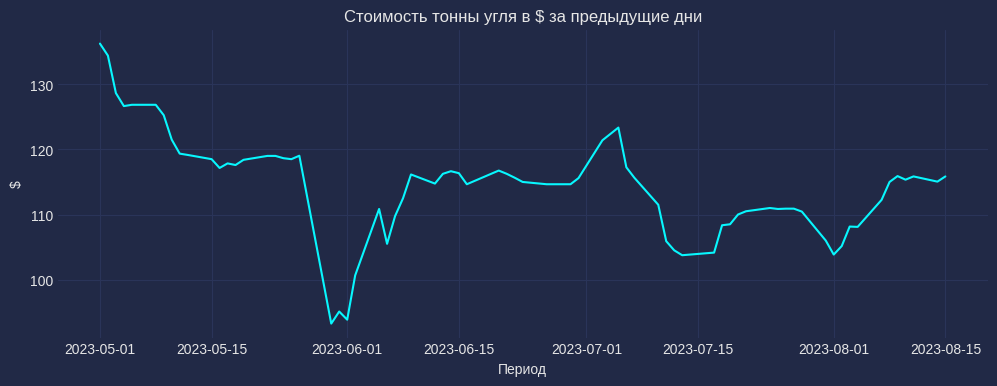

In [20]:
# график за ближайшие дни
fig = plt.figure(figsize=(12, 4))

plt.grid(2)
plt.title('Стоимость тонны угля в $ за предыдущие дни')
plt.plot(coal['coal']['2023-05-01':])
# plt.plot(coal)


plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)


plt.show()


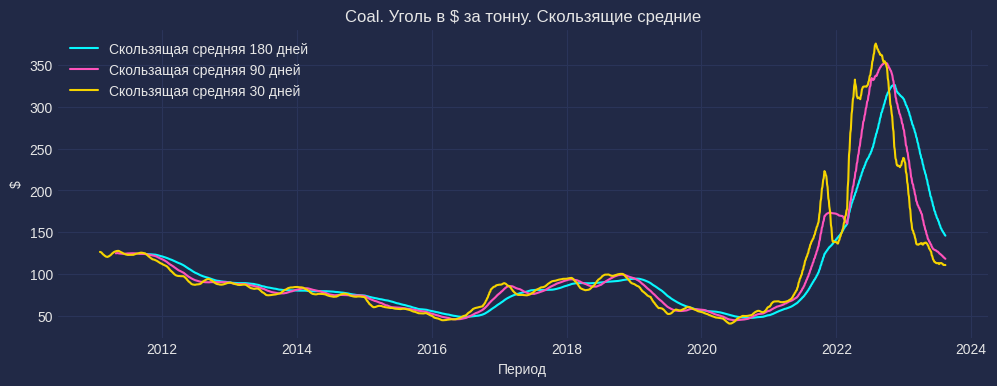

In [21]:
# скользящие средние разных периодов 

coal_rol180 = coal.rolling(180).mean()
coal_rol90 = coal.rolling(90).mean()
coal_rol30 = coal.rolling(30).mean()

# график скользящих средних

fig, ax = plt.subplots(figsize = (12,4), dpi = 100)

# plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_rol180, label='Скользящая средняя 180 дней')
plt.plot(coal_rol90, label='Скользащая средняя 90 дней')
plt.plot(coal_rol30, label='Скользящая средняя 30 дней')
plt.title('Coal. Уголь в $ за тонну. Скользящие средние')

plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)


plt.legend()
plt.show()

На вышепредставленном графике на основании рекомендаций из технического анализа следует обратить внимание на пересечение короткой и длинной скользящих средних. Особенность пересчечения короткой скользящей средней с верху или с низу показывает изменение тренда.

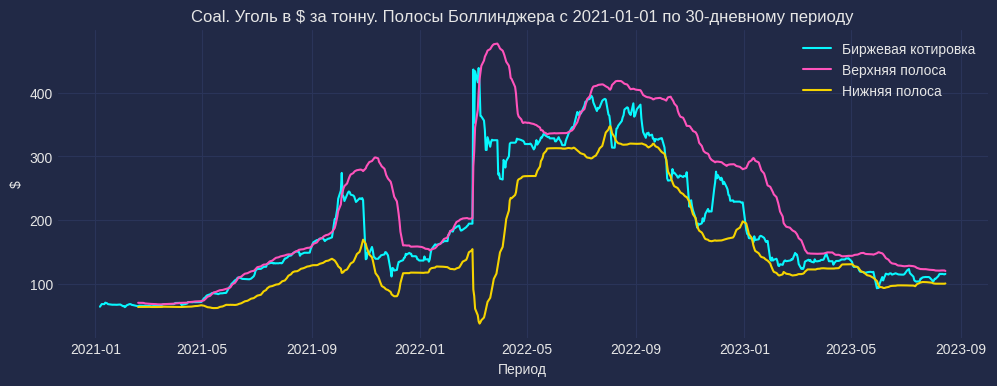

In [22]:
# Уголь в $. Полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

coal_d = coal[date:]
coal_ma = coal_d.rolling(window=n).mean()
coal_sd = coal_d.rolling(window=n).std()

coal_line1 = coal_ma + (2 * coal_sd)
coal_line2 = coal_ma - (2 * coal_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_d, label='Биржевая котировка')
plt.plot(coal_line1, label='Верхняя полоса')
plt.plot(coal_line2, label='Нижняя полоса')
plt.title(f'Coal. Уголь в $ за тонну. Полосы Боллинджера c {date} по {n}-дневному периоду')

plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)

plt.legend()
plt.show()

# На графике полос Боллинджера смотрим на ... дописать

In [23]:
#### разложение временного ряда на компоненты. Тест. 2023-06-23
# Надо решить: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
# после as.freq('D) ошибка: ValueError: This function does not handle missing values

In [24]:
# привожу к месячным значениям
coal2 = coal.resample("M").mean().squeeze().dropna()

coal2



Date
2010-12-31    126.40000
2011-01-31    126.44250
2011-02-28    119.64211
2011-03-31    123.92391
2011-04-30    128.21000
                ...    
2023-04-30    138.00474
2023-05-31    119.86045
2023-06-30    112.65429
2023-07-31    110.43750
2023-08-31    111.86364
Freq: M, Name: coal, Length: 153, dtype: float64

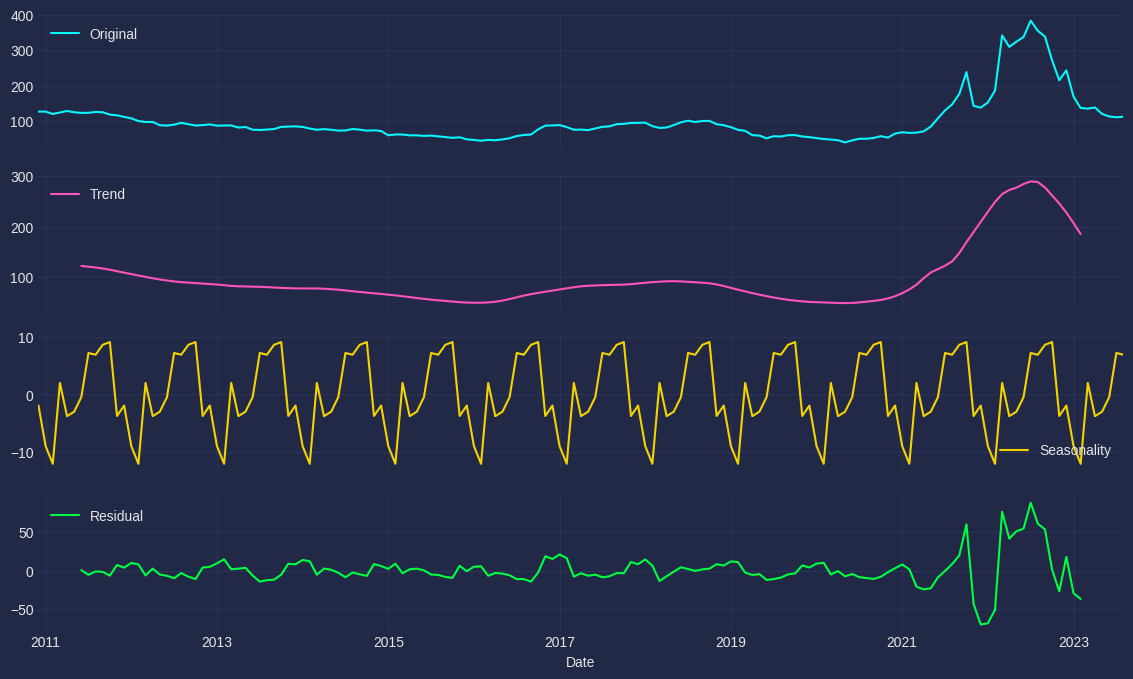

In [25]:


components = tsa.seasonal_decompose(coal2, model='additive')

ts = (coal2.to_frame('Original')
.assign(Trend=components.trend)
.assign(Seasonality=components.seasonal)
.assign(Residual=components.resid))

ts.plot(subplots=True, figsize=(14, 8));

In [26]:
ts

Original  Trend  Seasonality  Residual
Date                                               
2010-12-31  126.40000    NaN     -1.91890       NaN
2011-01-31  126.44250    NaN     -8.96376       NaN
2011-02-28  119.64211    NaN    -12.04164       NaN
2011-03-31  123.92391    NaN      2.00872       NaN
2011-04-30  128.21000    NaN     -3.76109       NaN
...               ...    ...          ...       ...
2023-04-30  138.00474    NaN     -3.76109       NaN
2023-05-31  119.86045    NaN     -2.98844       NaN
2023-06-30  112.65429    NaN     -0.45985       NaN
2023-07-31  110.43750    NaN      7.20780       NaN
2023-08-31  111.86364    NaN      6.90897       NaN

[153 rows x 4 columns]

In [27]:
coal_trend = ts['Trend']
coal_seas = ts['Seasonality']

# coal_trend
coal_seas

Date
2010-12-31    -1.91890
2011-01-31    -8.96376
2011-02-28   -12.04164
2011-03-31     2.00872
2011-04-30    -3.76109
                ...   
2023-04-30    -3.76109
2023-05-31    -2.98844
2023-06-30    -0.45985
2023-07-31     7.20780
2023-08-31     6.90897
Freq: M, Name: Seasonality, Length: 153, dtype: float64

<AxesSubplot:xlabel='Date'>

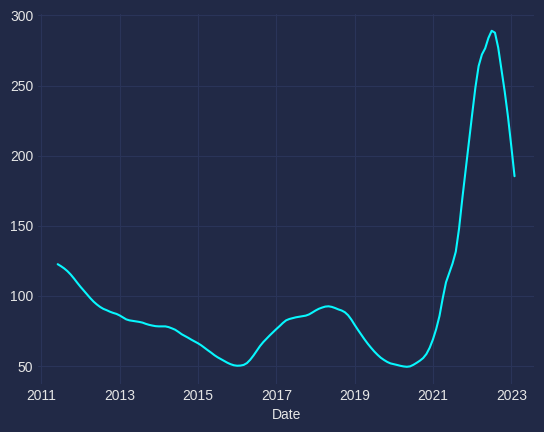

In [28]:
ts['Trend'].plot()

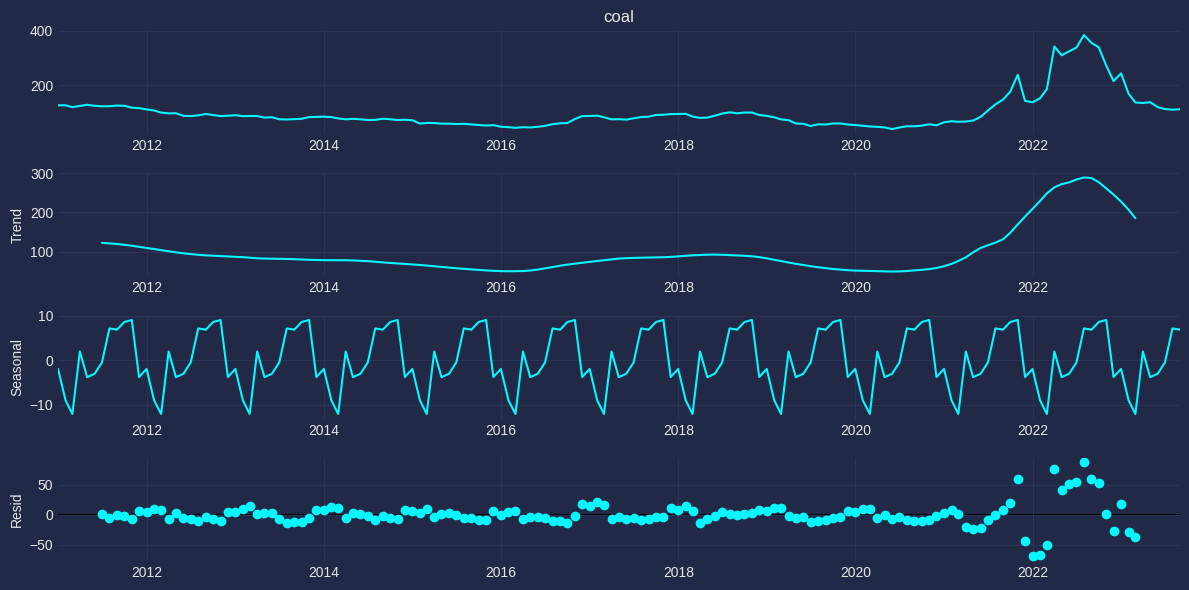

In [29]:
# тоже декомпозиция

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
decomposition = sm.tsa.seasonal_decompose(coal2, model='additive')
fig = decomposition.plot()
plt.show()

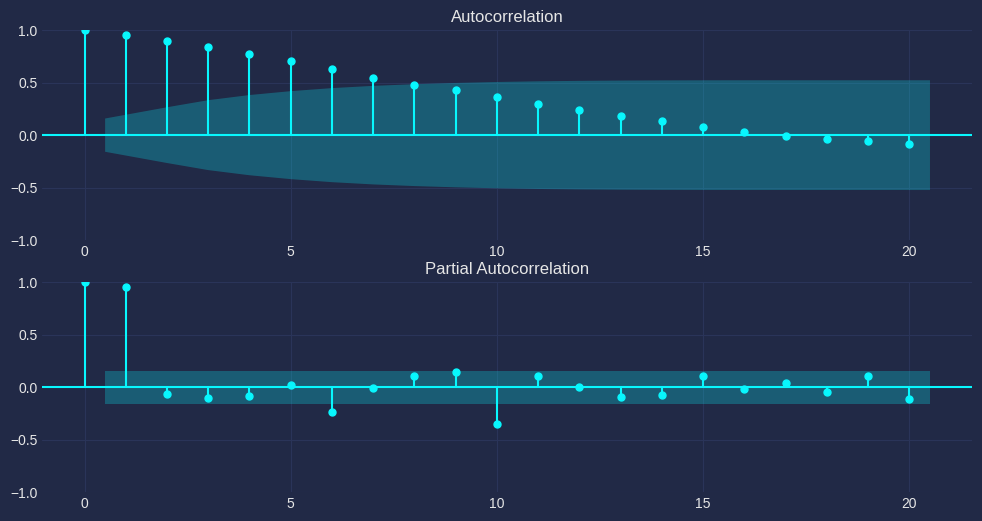

In [30]:
# Графики автокорреляции и частичной автокорреляции месячных значений стоимости угля. Метод 'ywmle'

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(coal2, lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(coal2, method='ywmle', lags=20, ax=plt.gca())

plt.show()

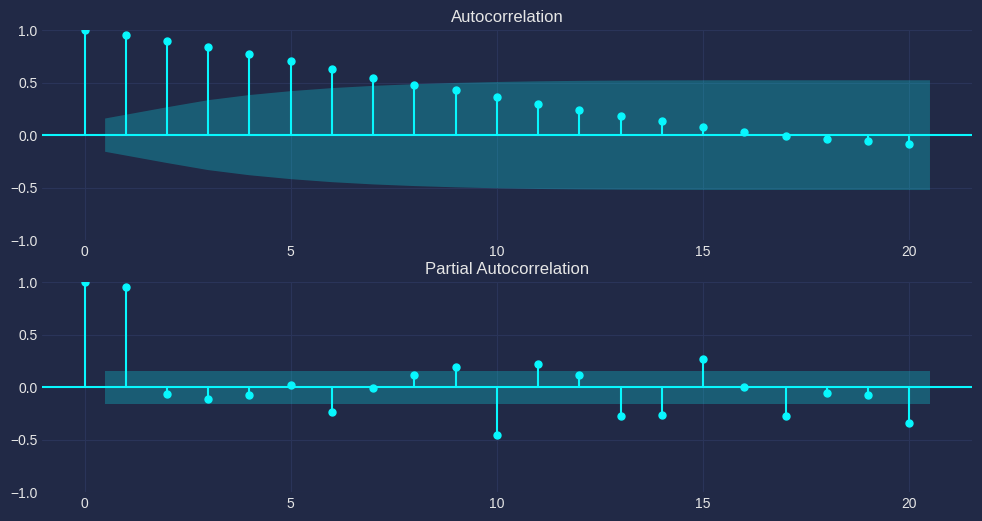

In [31]:
# Графики автокорреляции и частичной автокорреляции месячных значений стоимости угля. Метод 'ols'

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(coal2, lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(coal2, method='ols', lags=20, ax=plt.gca())

plt.show()

In [32]:
# модель ARIMA (1, 0, 0)
model = sm.tsa.ARIMA(coal2, order=(1, 0, 0))
model_fit = model.fit()
model_fit.summary()


# критерий качества модели (самый популярный) AIC - информ критерий Акаике. Чем меньше тем лучше. 
# Также если разница мменьше 10 то нет различий в моделях
# BIC - Байесовский инфомационный критерий

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   coal   No. Observations:                  153
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -677.960
Date:                Wed, 16 Aug 2023   AIC                           1361.919
Time:                        17:15:51   BIC                           1371.011
Sample:                    12-31-2010   HQIC                          1365.612
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.9188     60.707      1.712      0.087     -15.065     222.902
ar.L1          0.9458      0.024     39.397      0.000       0.899       0.993
sigma2       407.3423     14.423     28.243      0.000     379.074     435.611
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):              5417.81
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):              62.98   Skew:                             2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

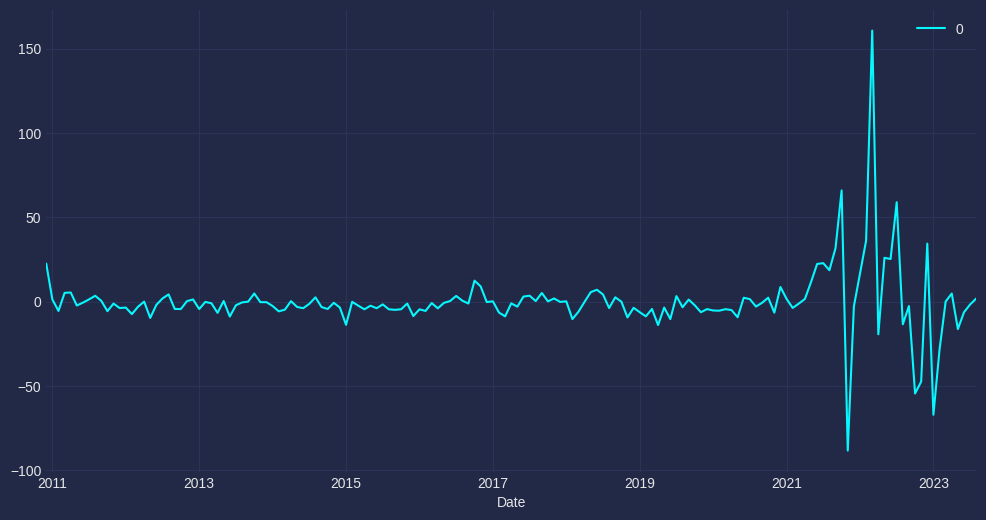

               0
count  153.00000
mean    -0.14007
std     20.32170
min    -88.35708
25%     -4.59598
50%     -1.20668
75%      1.56500
max    160.63264


In [33]:
# остатки модели

residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()
print(residuals.describe())

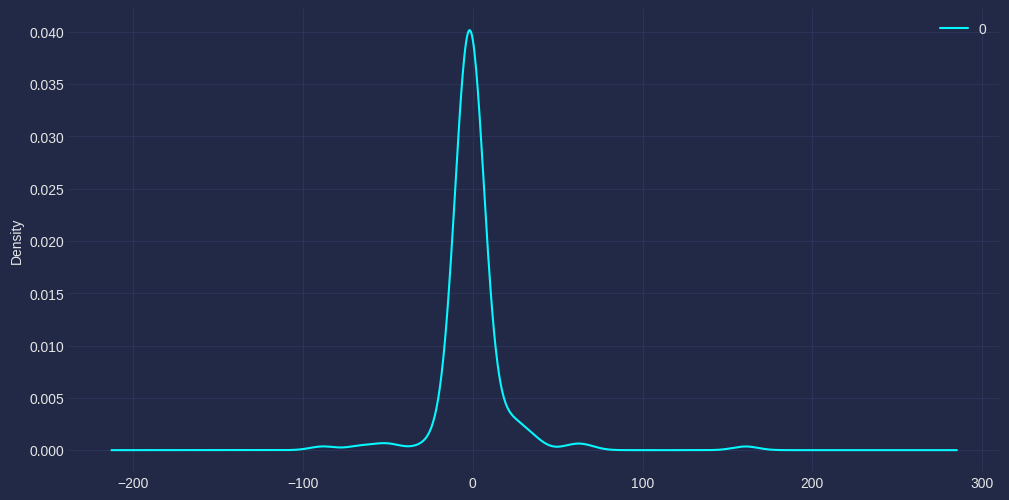

               0
count  153.00000
mean    -0.14007
std     20.32170
min    -88.35708
25%     -4.59598
50%     -1.20668
75%      1.56500
max    160.63264


In [34]:
# ядерная оценка плотности остатков модели 

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [35]:
# строю прогноз на последние наблюдения

# coal2_fit = model_fit.predict(0, 20)

coal2_fit = model_fit.predict(-10, -1)

coal2_fit

Date
2022-11-30    262.56885
2022-12-31    209.08193
2023-01-31    235.85399
2023-02-28    165.23659
2023-03-31    134.93224
2023-04-30    133.24868
2023-05-31    136.15627
2023-06-30    118.99594
2023-07-31    112.18056
2023-08-31    110.08399
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

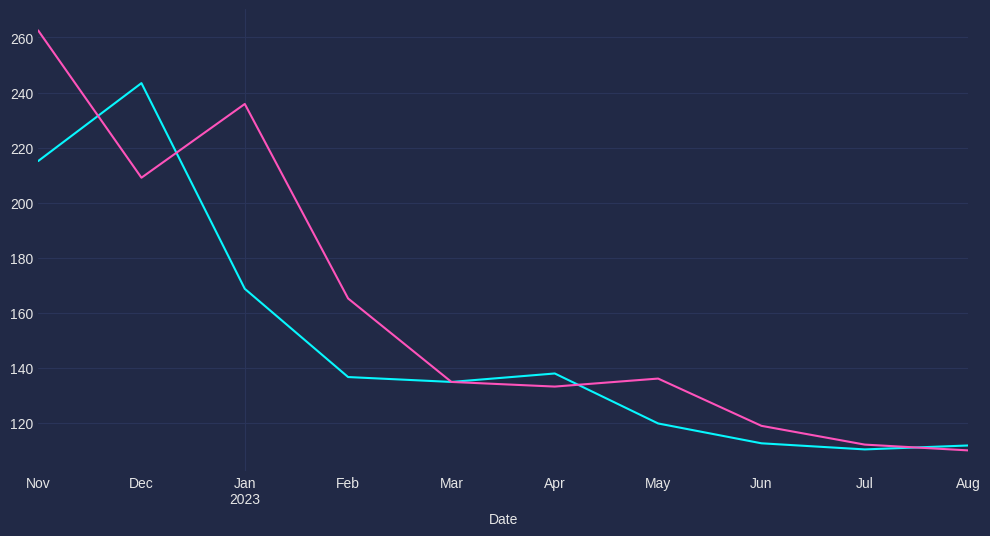

In [36]:
coal2.tail(10).plot()
coal2_fit.tail(10).plot()

<h3 id="Brent">Нефть</h3>

### Нефть $ за баррель

###### BZ=F


<a href="https://finance.yahoo.com/quote/BZ=F?p=BZ=F" target="_blank">https://finance.yahoo.com/quote/BZ=F?p=BZ=F</a>


<a href="#top">К оглавлению</a>

In [37]:
# 
brent = df02[['brent']].copy()

brent.dropna(how='any', inplace=True)

brent

Ticker      brent
Date             
2008-01-02  97.84
2008-01-03  97.60
2008-01-04  96.79
2008-01-07  94.39
2008-01-08  95.54
...           ...
2023-08-10  86.40
2023-08-11  86.81
2023-08-14  86.21
2023-08-15  84.89
2023-08-16  84.68

[3873 rows x 1 columns]

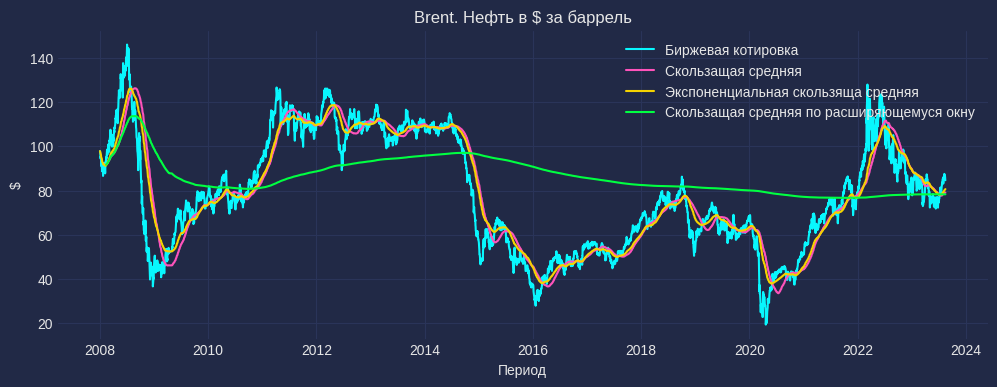

In [38]:
# нефть


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(brent, label='Биржевая котировка')
plt.plot(brent.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(brent.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(brent.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Brent. Нефть в $ за баррель')

plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)

plt.legend()
plt.show()

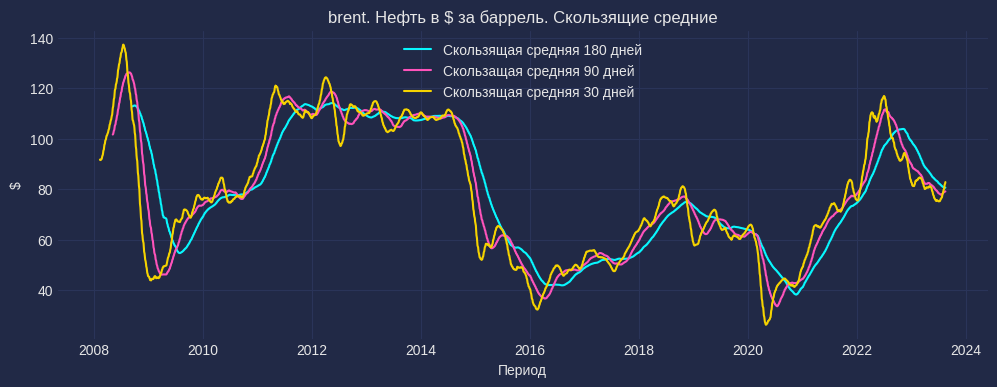

In [39]:
# скользящие средние разных периодов 

brent_rol180 = brent.rolling(180).mean()
brent_rol90 = brent.rolling(90).mean()
brent_rol30 = brent.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(brent_rol180, label='Скользящая средняя 180 дней')
plt.plot(brent_rol90, label='Скользащая средняя 90 дней')
plt.plot(brent_rol30, label='Скользящая средняя 30 дней')
plt.title('brent. Нефть в $ за баррель. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

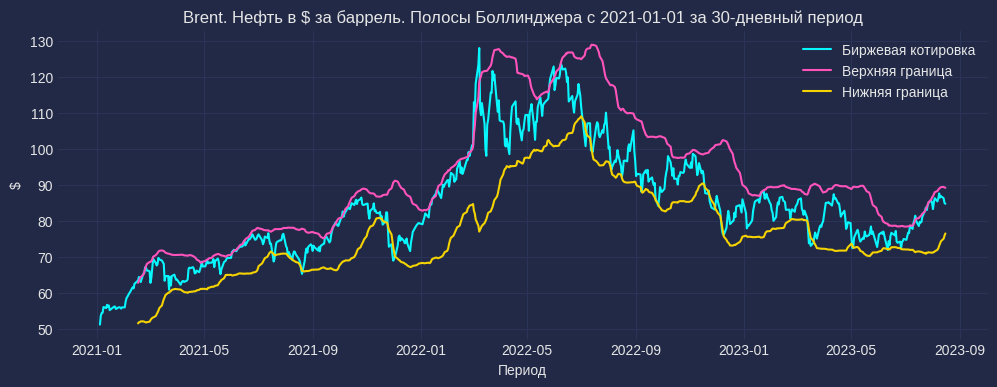

In [40]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

brent_d = brent[date:]
brent_ma = brent_d.rolling(window=n).mean()
brent_sd = brent_d.rolling(window=n).std()

brent_line1 = brent_ma + (2 * brent_sd)
brent_line2 = brent_ma - (2 * brent_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(brent_d, label='Биржевая котировка')
plt.plot(brent_line1, label='Верхняя граница')
plt.plot(brent_line2, label='Нижняя граница')
plt.title(f'Brent. Нефть в $ за баррель. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Gold">Золото</h3>

### Золото $ за тройскую унцию

###### GC=F

<a href="https://finance.yahoo.com/quote/GC=F?p=GC=F" target="_blank">https://finance.yahoo.com/quote/GC=F?p=GC=F</a>

<a href="#top">К оглавлению</a>

In [41]:
gold = df02[['gold']].copy()

gold.dropna(how='any', inplace=True)

gold

Ticker            gold
Date                  
2008-01-02   857.00000
2008-01-03   866.40002
2008-01-04   863.09998
2008-01-07   859.59998
2008-01-08   878.00000
...                ...
2023-08-10  1914.40002
2023-08-11  1912.90002
2023-08-14  1910.59998
2023-08-15  1902.50000
2023-08-16  1935.40002

[3930 rows x 1 columns]

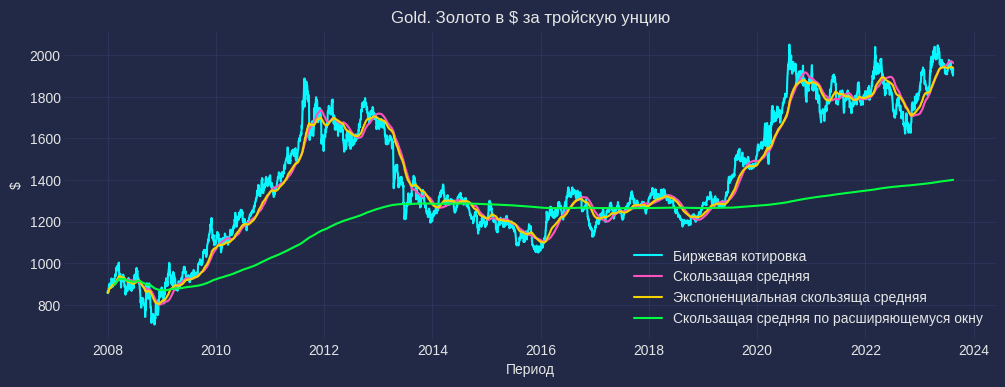

In [42]:
# золото


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gold, label='Биржевая котировка')
plt.plot(gold.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(gold.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(gold.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Gold. Золото в $ за тройскую унцию')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

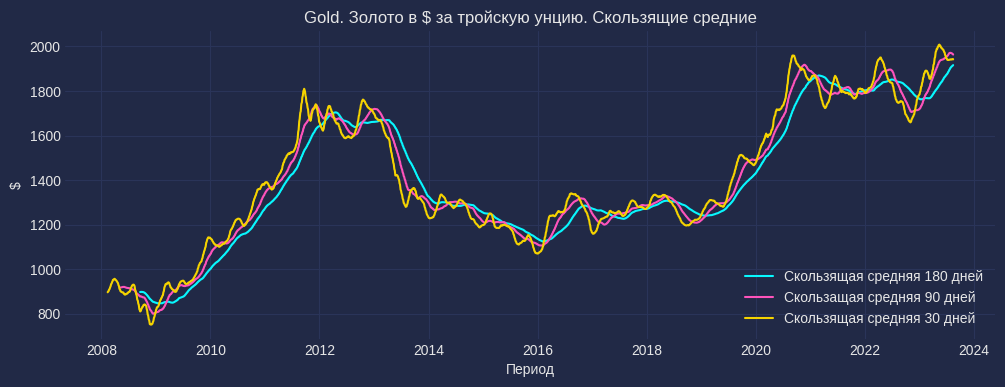

In [43]:
# скользящие средние разных периодов 

gold_rol180 = gold.rolling(180).mean()
gold_rol90 = gold.rolling(90).mean()
gold_rol30 = gold.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gold_rol180, label='Скользящая средняя 180 дней')
plt.plot(gold_rol90, label='Скользащая средняя 90 дней')
plt.plot(gold_rol30, label='Скользящая средняя 30 дней')
plt.title('Gold. Золото в $ за тройскую унцию. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

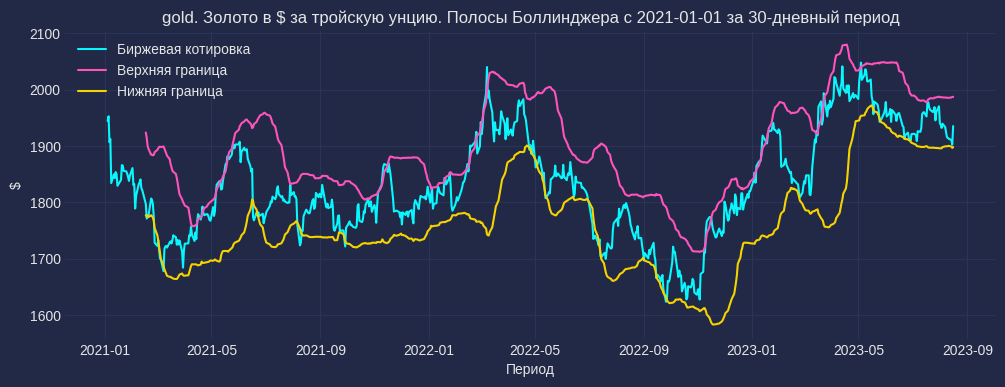

In [44]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

gold_d = gold[date:]
gold_ma = gold_d.rolling(window=n).mean()
gold_sd = gold_d.rolling(window=n).std()

gold_line1 = gold_ma + (2 * gold_sd)
gold_line2 = gold_ma - (2 * gold_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gold_d, label='Биржевая котировка')
plt.plot(gold_line1, label='Верхняя граница')
plt.plot(gold_line2, label='Нижняя граница')
plt.title(f'gold. Золото в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

In [45]:
# макс значение за заданный период

gold['2020-01-01': '2020-05-31'].max()

Ticker
gold    1756.69995
dtype: float64

<h3 id="Silver">Серебро</h3>

### Серебро $ за тройскую унцию

###### SI=F

<a href="https://finance.yahoo.com/quote/SI=F?p=SI=F" target="_blank">https://finance.yahoo.com/quote/SI=F?p=SI=F</a>


<a href="#top">К оглавлению</a>

In [46]:
silver = df02[['silver']].copy()

silver.dropna(how='any', inplace=True)

silver

Ticker      silver
Date              
2008-01-02  15.167
2008-01-03  15.382
2008-01-04  15.346
2008-01-07  15.180
2008-01-08  15.707
...            ...
2023-08-10  22.746
2023-08-11  22.674
2023-08-14  22.644
2023-08-15  22.595
2023-08-16  22.670

[3930 rows x 1 columns]

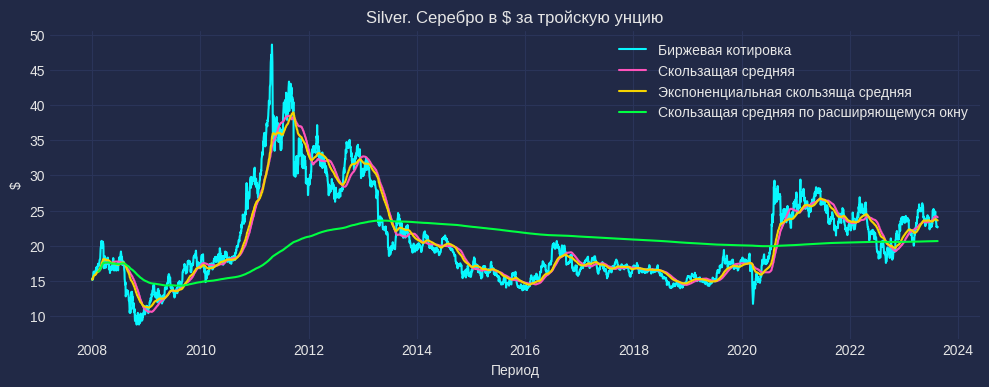

In [47]:
# серебро

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(silver, label='Биржевая котировка')
plt.plot(silver.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(silver.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(silver.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Silver. Серебро в $ за тройскую унцию')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

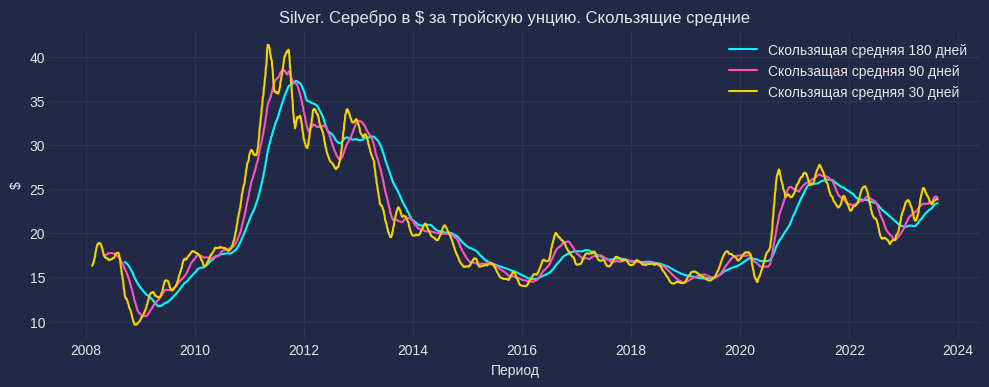

In [48]:
# скользящие средние разных периодов 

silver_rol180 = silver.rolling(180).mean()
silver_rol90 = silver.rolling(90).mean()
silver_rol30 = silver.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(silver_rol180, label='Скользящая средняя 180 дней')
plt.plot(silver_rol90, label='Скользащая средняя 90 дней')
plt.plot(silver_rol30, label='Скользящая средняя 30 дней')
plt.title('Silver. Серебро в $ за тройскую унцию. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

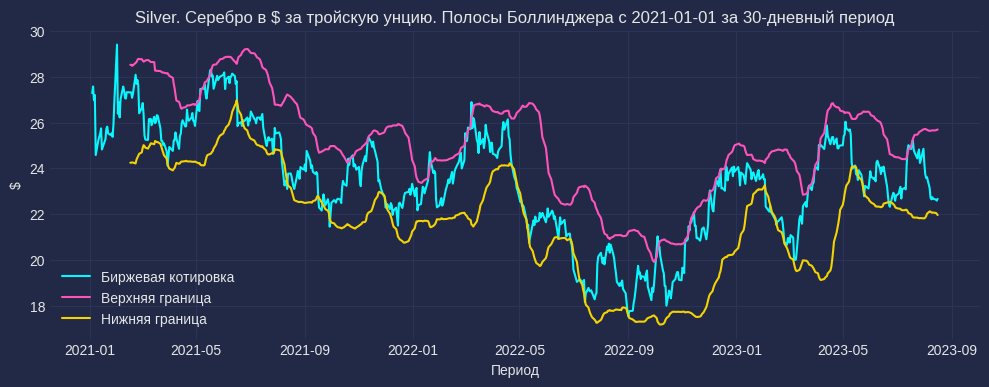

In [49]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

silver_d = silver[date:]
silver_ma = silver_d.rolling(window=n).mean()
silver_sd = silver_d.rolling(window=n).std()

silver_line1 = silver_ma + (2 * silver_sd)
silver_line2 = silver_ma - (2 * silver_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(silver_d, label='Биржевая котировка')
plt.plot(silver_line1, label='Верхняя граница')
plt.plot(silver_line2, label='Нижняя граница')
plt.title(f'Silver. Серебро в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Platinum">Платина</h3>

### Платина $ за тройскую унцию

###### PL=F

<a href="https://finance.yahoo.com/quote/PL=F?p=PL=F" target="_blank">https://finance.yahoo.com/quote/PL=F?p=PL=F</a>


<a href="#top">К оглавлению</a>

In [50]:
platinum = df02[['platinum']].copy()

platinum.dropna(how='any', inplace=True)

platinum

Ticker        platinum
Date                  
2008-01-02  1547.00000
2008-01-03  1541.80005
2008-01-04  1539.09998
2008-01-07  1524.19995
2008-01-08  1553.59998
...                ...
2023-08-10   908.20001
2023-08-11   907.90002
2023-08-14   900.09998
2023-08-15   885.90002
2023-08-16   895.40002

[3631 rows x 1 columns]

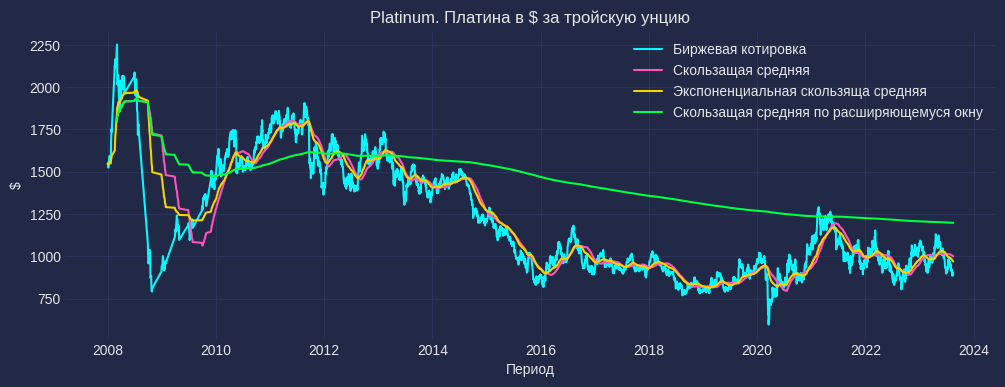

In [51]:
# Platinum

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(platinum, label='Биржевая котировка')
plt.plot(platinum.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(platinum.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(platinum.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Platinum. Платина в $ за тройскую унцию')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

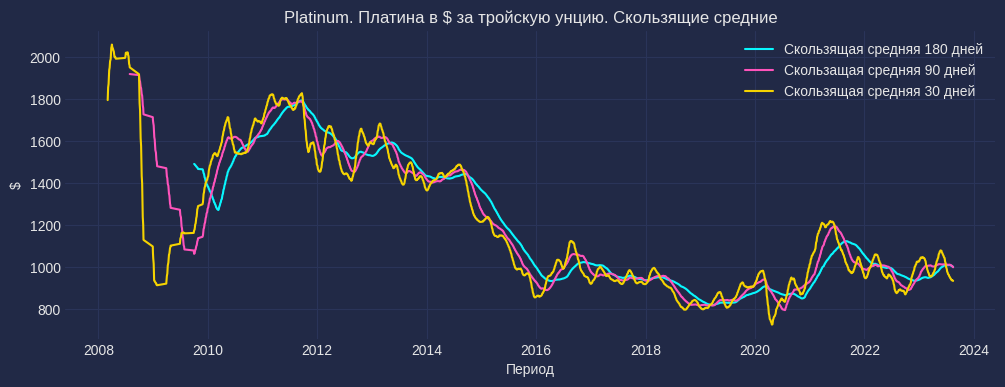

In [52]:
# скользящие средние разных периодов 

platinum_rol180 = platinum.rolling(180).mean()
platinum_rol90 = platinum.rolling(90).mean()
platinum_rol30 = platinum.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(platinum_rol180, label='Скользящая средняя 180 дней')
plt.plot(platinum_rol90, label='Скользащая средняя 90 дней')
plt.plot(platinum_rol30, label='Скользящая средняя 30 дней')
plt.title('Platinum. Платина в $ за тройскую унцию. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

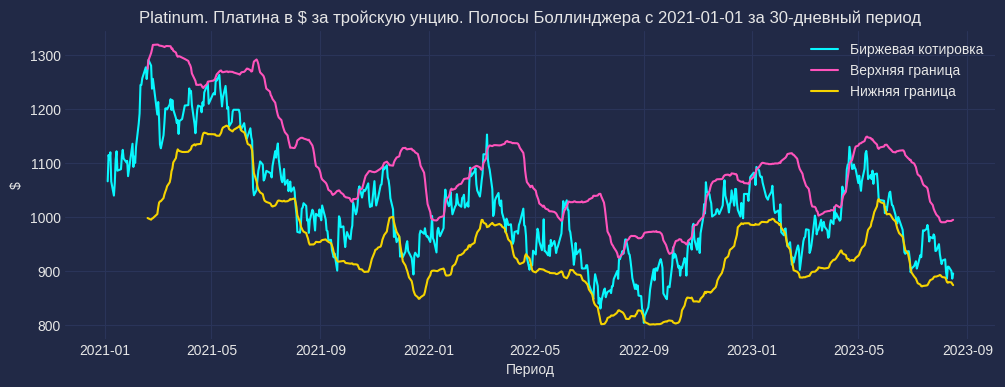

In [53]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

platinum_d = platinum[date:]
platinum_ma = platinum_d.rolling(window=n).mean()
platinum_sd = platinum_d.rolling(window=n).std()

platinum_line1 = platinum_ma + (2 * platinum_sd)
platinum_line2 = platinum_ma - (2 * platinum_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(platinum_d, label='Биржевая котировка')
plt.plot(platinum_line1, label='Верхняя граница')
plt.plot(platinum_line2, label='Нижняя граница')
plt.title(f'Platinum. Платина в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Gaz">Натуральный газ</h3>

### Натуральный газ (в долларах ($) на единицу MMBtu(1 млн БТЕ) (1 Btu ≈ 1054,615 Дж)

###### NG=F

<a href="https://finance.yahoo.com/quote/NG=F?p=NG=F" target="_blank">https://finance.yahoo.com/quote/NG=F?p=NG=F</a>


<a href="#top">К оглавлению</a>

In [54]:
gaz = df02[['gaz']].copy()

gaz.dropna(how='any', inplace=True)

gaz

Ticker        gaz
Date             
2008-01-02  7.850
2008-01-03  7.674
2008-01-04  7.841
2008-01-07  7.879
2008-01-08  7.967
...           ...
2023-08-10  2.763
2023-08-11  2.770
2023-08-14  2.795
2023-08-15  2.659
2023-08-16  2.584

[3931 rows x 1 columns]

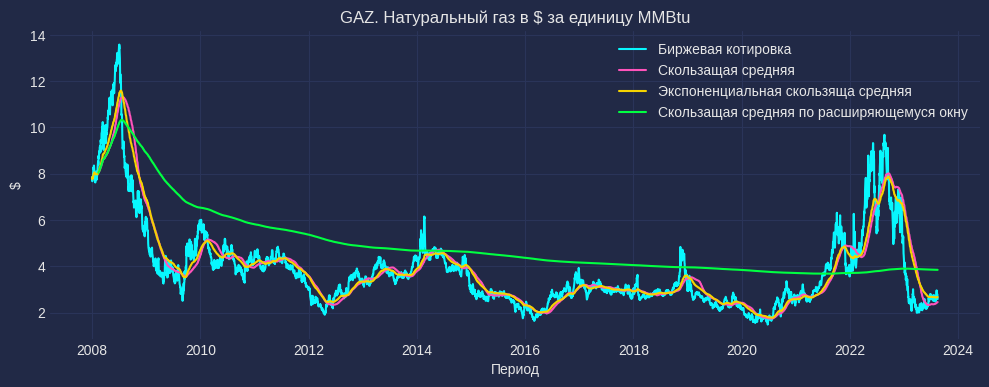

In [55]:
# газ


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gaz, label='Биржевая котировка')
plt.plot(gaz.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(gaz.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(gaz.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.title('GAZ. Натуральный газ в $ за единицу MMBtu')
plt.legend()
plt.show()

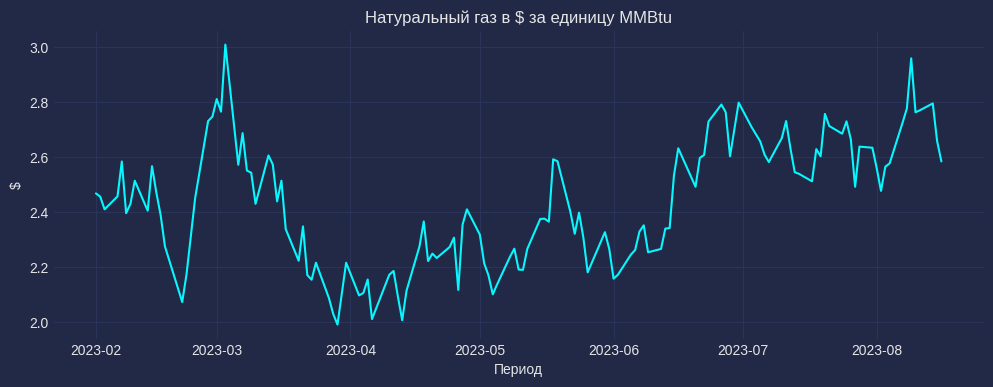

In [56]:
# график за ближайшие дни
fig = plt.figure(figsize=(12, 4))

plt.grid(2)
plt.title('Натуральный газ в $ за единицу MMBtu')
plt.plot(gaz['2023-02-01':])

plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)


plt.show()

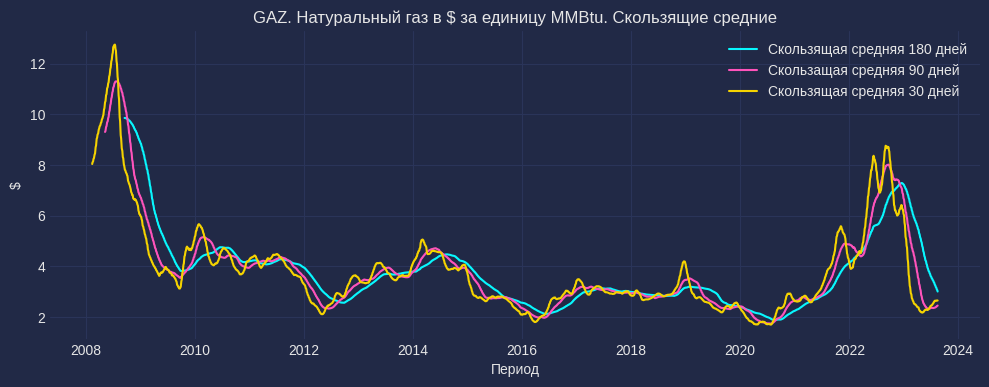

In [57]:
# скользящие средние разных периодов 

gaz_rol180 = gaz.rolling(180).mean()
gaz_rol90 = gaz.rolling(90).mean()
gaz_rol30 = gaz.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(True)
plt.plot(gaz_rol180, label='Скользящая средняя 180 дней')
plt.plot(gaz_rol90, label='Скользащая средняя 90 дней')
plt.plot(gaz_rol30, label='Скользящая средняя 30 дней')
plt.title('GAZ. Натуральный газ в $ за единицу MMBtu. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

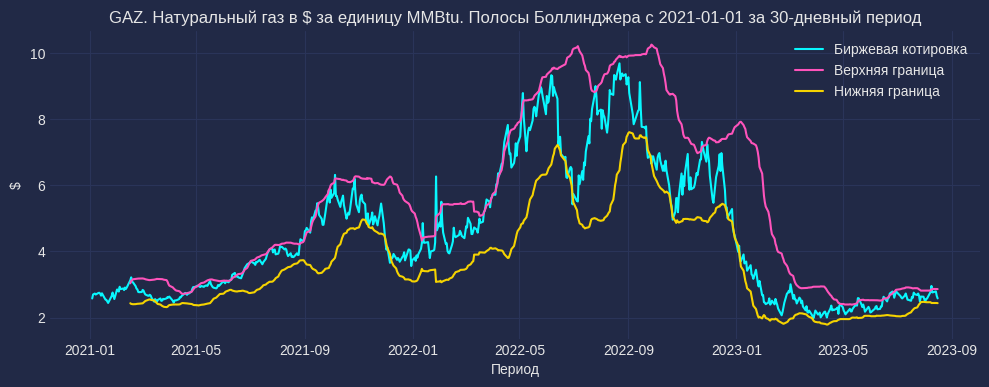

In [58]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

gaz_d = gaz[date:]
gaz_ma = gaz_d.rolling(window=n).mean()
gaz_sd = gaz_d.rolling(window=n).std()

gaz_line1 = gaz_ma + (2 * gaz_sd)
gaz_line2 = gaz_ma - (2 * gaz_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gaz_d, label='Биржевая котировка')
plt.plot(gaz_line1, label='Верхняя граница')
plt.plot(gaz_line2, label='Нижняя граница')
plt.title(f'GAZ. Натуральный газ в $ за единицу MMBtu. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Alum">Алюминий</h3>

### Алюминий $ за тонну

###### ALI=F

<a href="https://finance.yahoo.com/quote/ALI=F?p=ALI=F" target="_blank">https://finance.yahoo.com/quote/ALI=F?p=ALI=F</a>


<a href="#top">К оглавлению</a>

In [59]:
aluminum = df02[['aluminum']].copy()

aluminum.dropna(how='any', inplace=True)

aluminum

Ticker      aluminum
Date                
2014-05-06   2172.75
2014-05-07   2149.00
2014-05-08   2141.75
2014-05-09   2107.25
2014-05-12   2088.25
...              ...
2023-08-10   2154.75
2023-08-11   2115.25
2023-08-14   2081.00
2023-08-15   2075.50
2023-08-16   2137.00

[2299 rows x 1 columns]

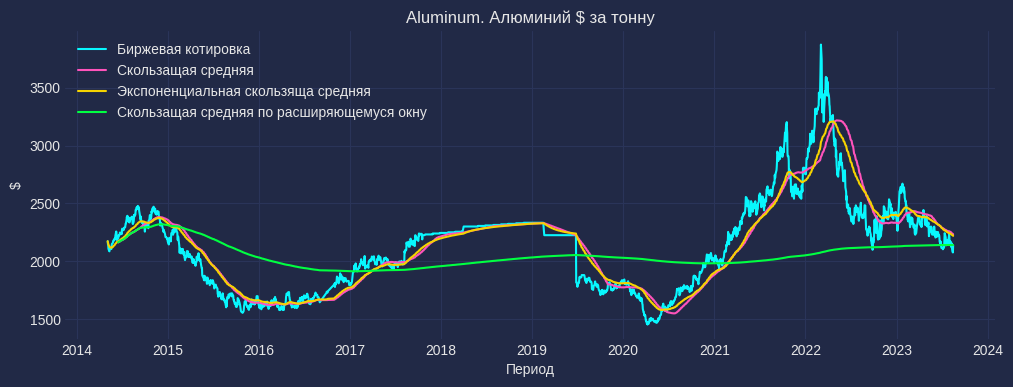

In [60]:
# Aluminum 


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(aluminum, label='Биржевая котировка')
plt.plot(aluminum.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(aluminum.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(aluminum.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Aluminum. Алюминий $ за тонну')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

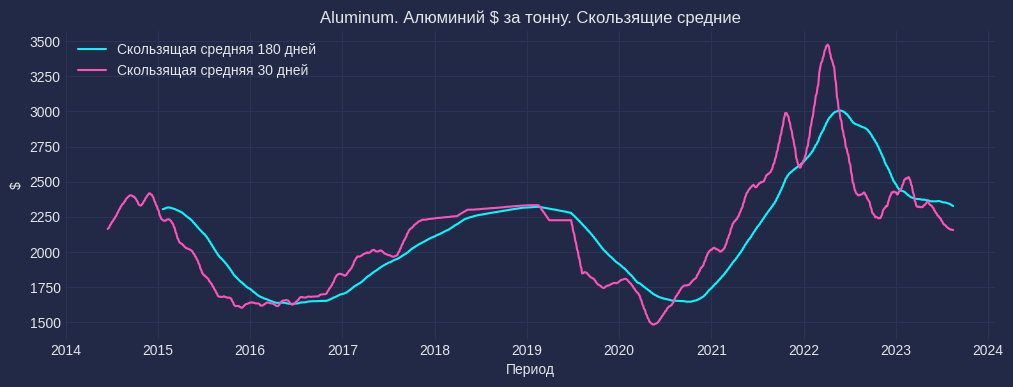

In [61]:
# скользящие средние разных периодов 

aluminum_rol180 = aluminum.rolling(180).mean()
aluminum_rol90 = aluminum.rolling(90).mean()
aluminum_rol30 = aluminum.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(aluminum_rol180, label='Скользящая средняя 180 дней')
# plt.plot(aluminum_rol90, label='Скользащая средняя 90 дней')
plt.plot(aluminum_rol30, label='Скользящая средняя 30 дней')
plt.title('Aluminum. Алюминий $ за тонну. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

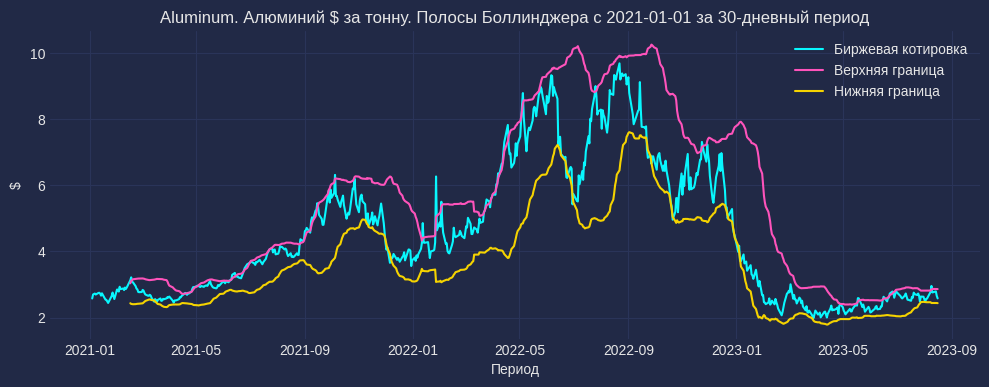

In [62]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

aluminum_d = gaz[date:]
aluminum_ma = aluminum_d.rolling(window=n).mean()
aluminum_sd = aluminum_d.rolling(window=n).std()

aluminum_line1 = aluminum_ma + (2 * aluminum_sd)
aluminum_line2 = aluminum_ma - (2 * aluminum_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(aluminum_d, label='Биржевая котировка')
plt.plot(aluminum_line1, label='Верхняя граница')
plt.plot(aluminum_line2, label='Нижняя граница')
plt.title(f'Aluminum. Алюминий $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Cupper">Медь</h3>

### Медь $ за фунт

###### HG=

<a href="https://finance.yahoo.com/quote/HG%3DF?p=HG%3DF" target="_blank">https://finance.yahoo.com/quote/HG%3DF?p=HG%3DF</a>


<a href="#top">К оглавлению</a>

In [63]:
cupper = df02[['cupper']].copy()

cupper.dropna(how='any', inplace=True)

cupper

Ticker      cupper
Date              
2008-01-02  3.0505
2008-01-03  3.1730
2008-01-04  3.1415
2008-01-07  3.1250
2008-01-08  3.2735
...            ...
2023-08-10  3.7510
2023-08-11  3.7145
2023-08-14  3.7245
2023-08-15  3.6615
2023-08-16  3.6750

[3930 rows x 1 columns]

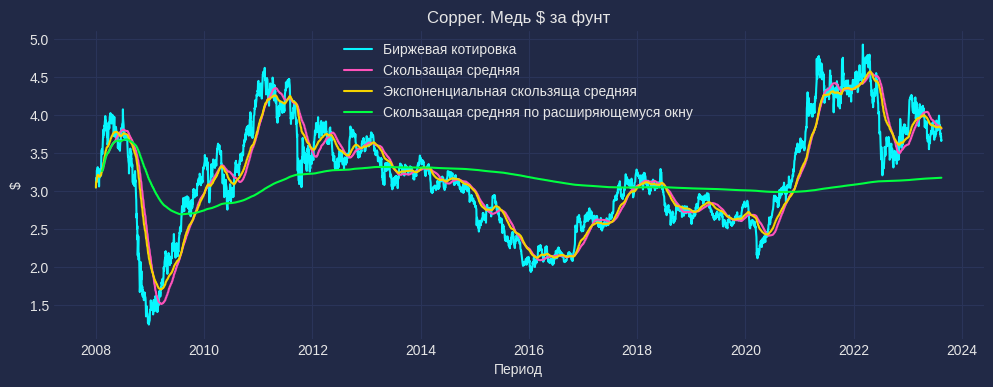

In [64]:
# Copper


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(cupper, label='Биржевая котировка')
plt.plot(cupper.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(cupper.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(cupper.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.title('Copper. Медь $ за фунт')
plt.legend()
plt.show()

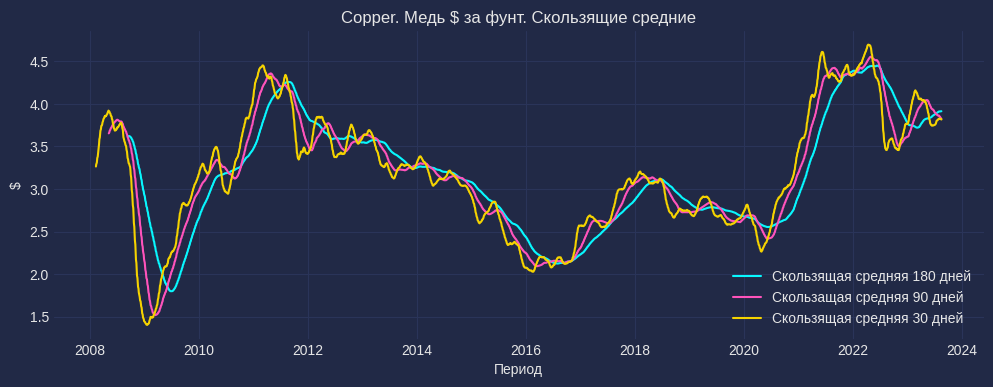

In [65]:
# скользящие средние разных периодов 

cupper_rol180 = cupper.rolling(180).mean()
cupper_rol90 = cupper.rolling(90).mean()
cupper_rol30 = cupper.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(cupper_rol180, label='Скользящая средняя 180 дней')
plt.plot(cupper_rol90, label='Скользащая средняя 90 дней')
plt.plot(cupper_rol30, label='Скользящая средняя 30 дней')
plt.title('Copper. Медь $ за фунт. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

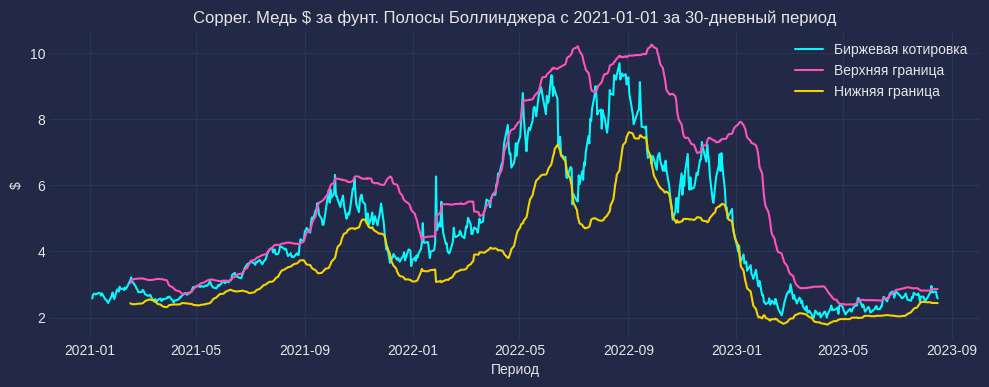

In [66]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

cupper_d = gaz[date:]
cupper_ma = cupper_d.rolling(window=n).mean()
cupper_sd = cupper_d.rolling(window=n).std()

cupper_line1 = cupper_ma + (2 * cupper_sd)
cupper_line2 = cupper_ma - (2 * cupper_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(cupper_d, label='Биржевая котировка')
plt.plot(cupper_line1, label='Верхняя граница')
plt.plot(cupper_line2, label='Нижняя граница')
plt.title(f'Copper. Медь $ за фунт. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

<h3 id="Corn">Кукуруза</h3>

### Кукуруза $ за 1 тонну

###### ZC=F

<a href="https://finance.yahoo.com/quote/ZC=F?p=ZC=F" target="_blank">https://finance.yahoo.com/quote/ZC=F?p=ZC=F</a>


<a href="#top">К оглавлению</a>

In [67]:
corn = df02[['cupper']].copy()

corn.dropna(how='any', inplace=True)

corn

Ticker      cupper
Date              
2008-01-02  3.0505
2008-01-03  3.1730
2008-01-04  3.1415
2008-01-07  3.1250
2008-01-08  3.2735
...            ...
2023-08-10  3.7510
2023-08-11  3.7145
2023-08-14  3.7245
2023-08-15  3.6615
2023-08-16  3.6750

[3930 rows x 1 columns]

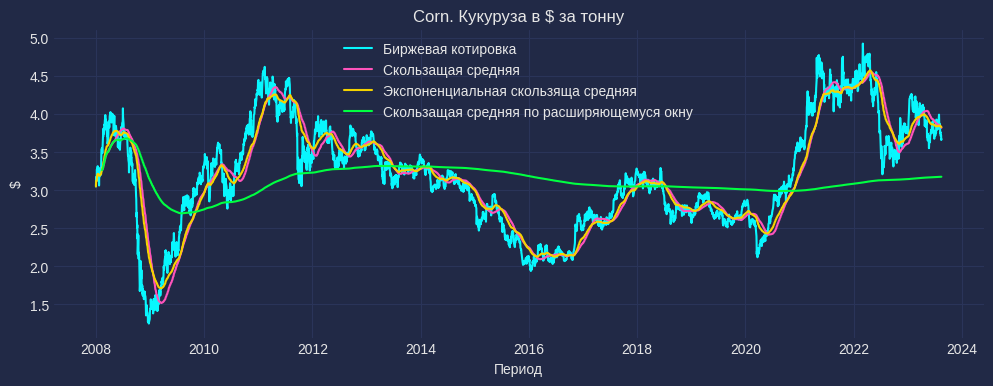

In [68]:
# Corn


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(corn, label='Биржевая котировка')
plt.plot(corn.rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(corn.ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(corn.expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Corn. Кукуруза в $ за тонну')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

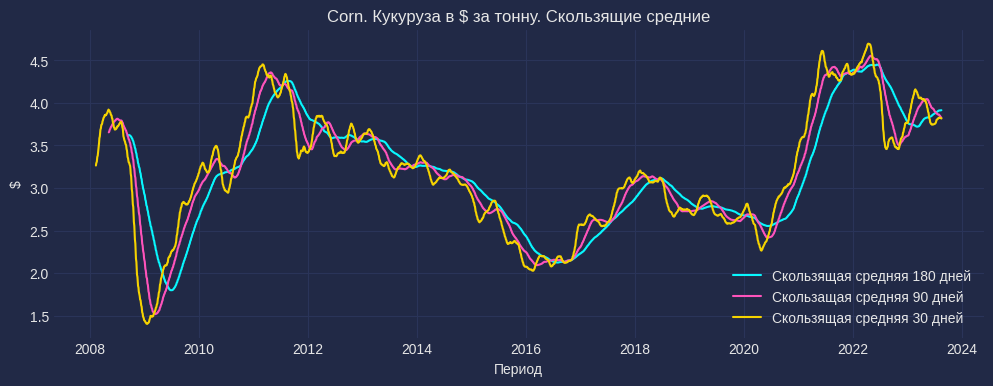

In [69]:
#  скользящие средние разных периодов 

corn_rol180 = corn.rolling(180).mean()
corn_rol90 = corn.rolling(90).mean()
corn_rol30 = corn.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(corn_rol180, label='Скользящая средняя 180 дней')
plt.plot(corn_rol90, label='Скользащая средняя 90 дней')
plt.plot(corn_rol30, label='Скользящая средняя 30 дней')
plt.title('Corn. Кукуруза в $ за тонну. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

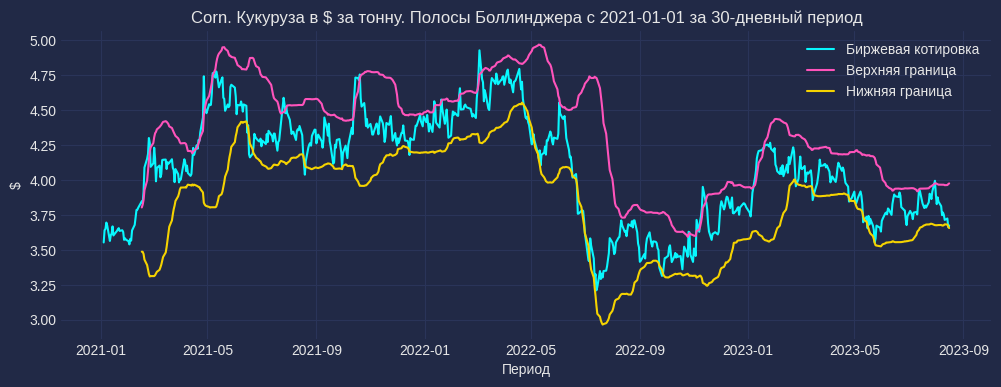

In [70]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

corn_d = corn[date:]
corn_ma = corn_d.rolling(window=n).mean()
corn_sd = corn_d.rolling(window=n).std()

corn_line1 = corn_ma + (2 * corn_sd)
corn_line2 = corn_ma - (2 * corn_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(corn_d, label='Биржевая котировка')
plt.plot(corn_line1, label='Верхняя граница')
plt.plot(corn_line2, label='Нижняя граница')
plt.title(f'Corn. Кукуруза в $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("$", fontsize = 10)
plt.legend()
plt.show()

### S&P500

###### ^GSPC

<a href="https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC" target="_blank">https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC</a>


<a href="#top">К оглавлению</a>

In [71]:
SP = df02[['SP']].copy()

SP.dropna(how='any', inplace=True)

SP

Ticker              SP
Date                  
2008-01-02  1447.16003
2008-01-03  1447.16003
2008-01-04  1411.63000
2008-01-07  1416.18005
2008-01-08  1390.18994
...                ...
2023-08-10  4468.83008
2023-08-11  4464.04980
2023-08-14  4489.72021
2023-08-15  4437.85986
2023-08-16  4445.81006

[3933 rows x 1 columns]

<AxesSubplot:title={'center':'Индекс S&P500'}, xlabel='Date'>

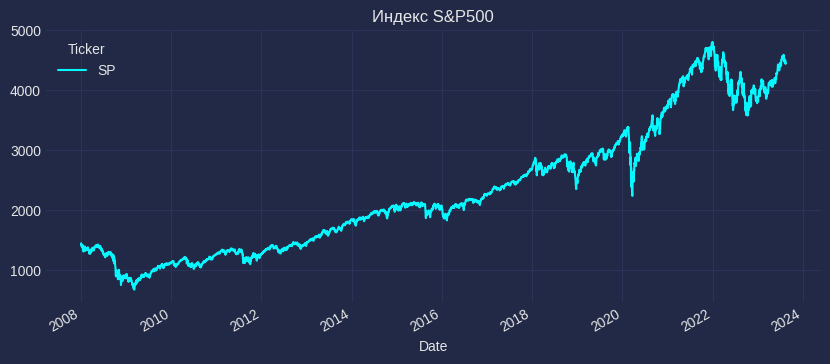

In [72]:
# S&P 500 (^GSPC)


SP.plot(figsize=(10,4), grid=True, title='Индекс S&P500')

### NASDAQ

###### ^IXIC

<a href="https://finance.yahoo.com/quote/%5EIXIC?p=%5EIXIC&.tsrc=fin-srch" target="_blank">https://finance.yahoo.com/quote/%5EIXIC?p=%5EIXIC&.tsrc=fin-srch</a>


<a href="#top">К оглавлению</a>

In [73]:
NASDAQ = df02['NASDAQ']

NASDAQ.dropna(how='any', inplace=True)

NASDAQ

/tmp/ipykernel_44299/3362688422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASDAQ.dropna(how='any', inplace=True)


Date
2008-01-02     2609.62988
2008-01-03     2602.67993
2008-01-04     2504.64990
2008-01-07     2499.45996
2008-01-08     2440.51001
                 ...     
2023-08-10    13737.99023
2023-08-11    13644.84961
2023-08-14    13788.33008
2023-08-15    13631.04980
2023-08-16    13631.58496
Name: NASDAQ, Length: 3933, dtype: float64

<AxesSubplot:title={'center':'Индекс NASDAQ'}, xlabel='Date'>

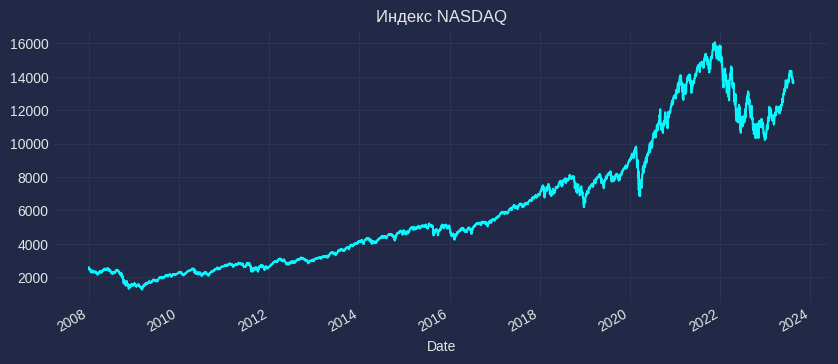

In [74]:
# NASDAQ Composite (^IXIC)

NASDAQ.plot(figsize=(10,4), grid=True, title='Индекс NASDAQ')

### <h3 id="df1">03. Анализ общего dateframe</h3>

###### df



<a href="#top">К оглавлению</a>

In [75]:
# делаю прореживание данных на среднемесячные значения
# Считаю, что нужно работать не с дневными значениями, т.к. корреляция с предыдущим днем почти равна ед.

df_month = df02.resample('M').mean()

# и делаю для ежедневн значений
df_day = df02.resample('D').mean()

df_month

Ticker           NASDAQ          SP    aluminum      brent       coal  \
Date                                                                    
2008-01-31   2418.09380  1378.76381         NaN   92.11238        NaN   
2008-02-29   2325.82554  1354.87251         NaN   94.65250        NaN   
2008-03-31   2254.81804  1316.94299         NaN  102.79900        NaN   
2008-04-30   2368.09955  1370.46909         NaN  110.44182        NaN   
2008-05-31   2483.24097  1403.21762         NaN  124.38095        NaN   
...                 ...         ...         ...        ...        ...   
2023-04-30  12073.46474  4121.46736  2357.92105   83.36895  138.00474   
2023-05-31  12446.53050  4146.17320  2284.15909   75.63227  119.86045   
2023-06-30  13463.77813  4345.37284  2209.16667   74.92571  112.65429   
2023-07-31  14033.09097  4508.07549  2160.68750   80.35550  110.43750   
2023-08-31  13846.73877  4488.48665  2139.60417   85.62833  111.86364   

Ticker           corn   cupper       gaz        gold    platinum    silver  
Date                                                                        
2008-01-31  488.57143  3.20171   7.99148   891.35713  1587.18947  16.05210  
2008-02-29  516.07500  3.58955   8.64225   925.11000  2135.56668  17.65610  
2008-03-31  547.68750  3.81107   9.62430   962.93000  2030.57501  19.15790  
2008-04-30  593.36364  3.93939  10.28809   909.66364  2012.18502  17.47827  
2008-05-31  597.85714  3.77421  11.38162   888.20476         NaN  17.01200  
...               ...      ...       ...         ...         ...       ...  
2023-04-30  654.88158  4.00037   2.19726  2001.04736  1054.50527  25.09232  
2023-05-31  608.90909  3.74173   2.29932  1993.42273  1066.60000  24.30314  
2023-06-30  615.16667  3.79598   2.47462  1941.65238   979.62857  23.38852  
2023-07-31  548.62500  3.83570   2.63655  1950.76500   948.38500  24.20300  
2023-08-31  481.22917  3.77475   2.68425  1924.87500   907.33334  23.08358  

[188 rows x 11 columns]

In [76]:
# df_day.isna().sum()

In [77]:
# сохранил в excel что бы было.
# df02.to_excel('ts_base_coal_2022-11-04.xlsx')

In [78]:
# сводные статистики

df02.describe()

Ticker       NASDAQ          SP    aluminum       brent        coal  \
count    3933.00000  3933.00000  2299.00000  3873.00000  3074.00000   
mean     6144.31317  2303.08772  2140.10026    78.31022   101.51062   
std      3927.09603  1077.10145   392.53062    25.59964    66.90713   
min      1268.64001   676.53003  1452.00000    19.33000    38.58000   
25%      2796.13989  1347.31995  1807.12500    57.23000    61.07000   
50%      4920.72021  2076.33008  2211.00000    75.17000    83.90000   
75%      8102.00977  2926.45996  2330.75000   103.81000   111.10000   
max     16057.44043  4796.56006  3873.00000   146.08000   438.35001   

Ticker        corn      cupper         gaz        gold    platinum      silver  
count   3929.00000  3930.00000  3931.00000  3930.00000  3631.00000  3930.00000  
mean     484.26953     3.17826     3.84643  1401.00346  1197.23175    20.66129  
std      142.67155     0.71008     1.88598   309.07582   326.70492     6.40599  
min      293.50000     1.24750     1.48200   704.90002   595.90002     8.79000  
25%      365.50000     2.67450     2.69700  1205.74997   933.35001    16.31250  
50%      414.75000     3.14525     3.33200  1319.00000  1055.00000    18.35000  
75%      615.00000     3.69137     4.31700  1683.77502  1478.25000    24.03450  
max      831.25000     4.92900    13.57700  2051.50000  2251.10010    48.58400

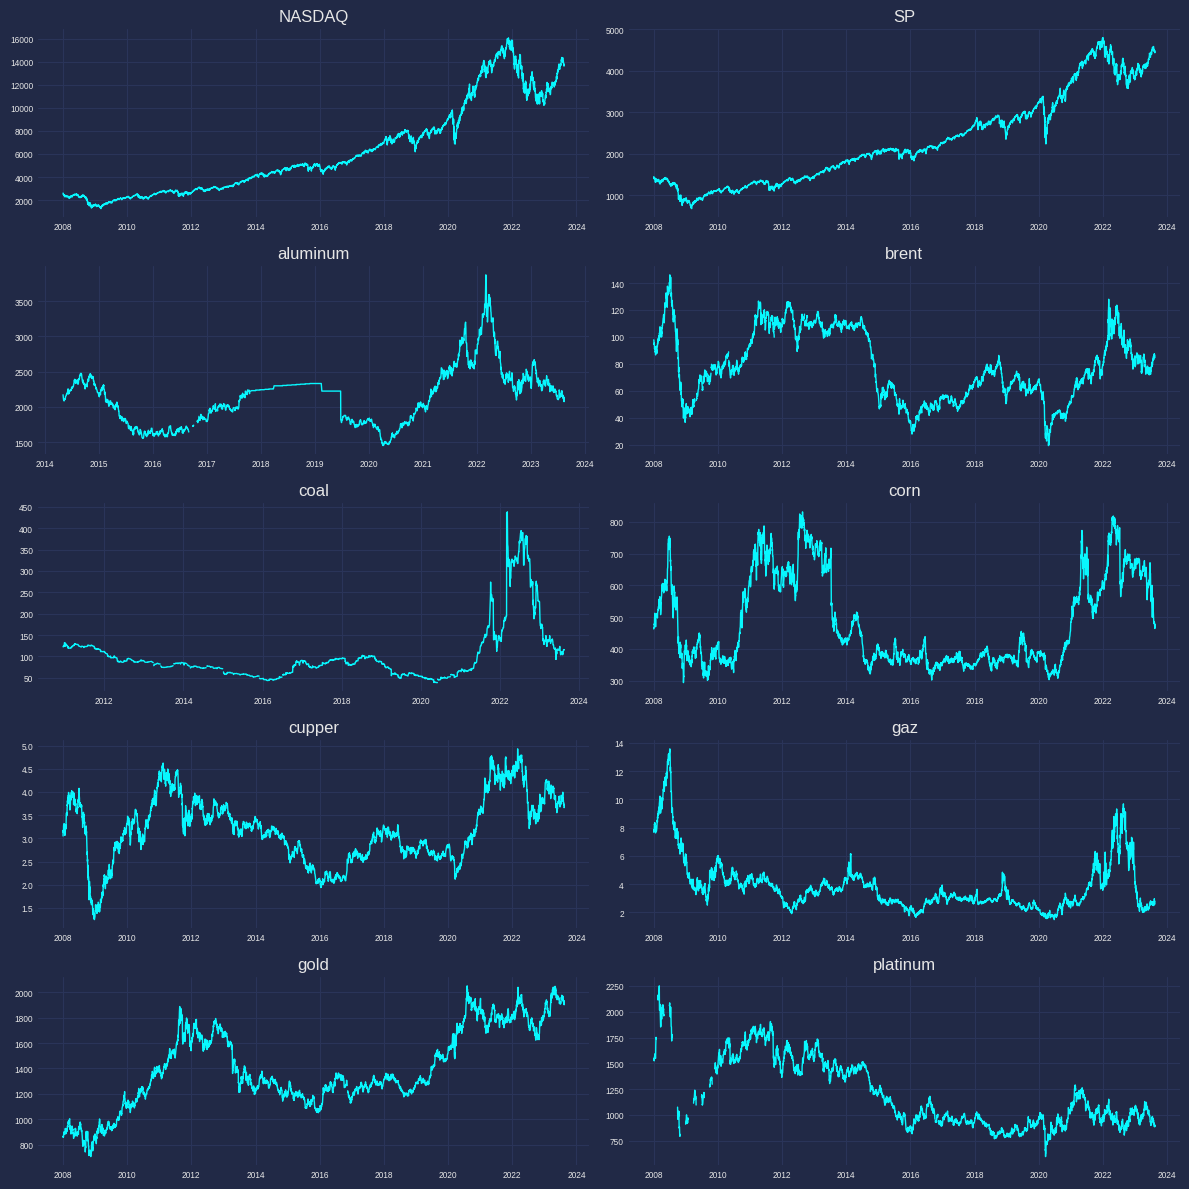

In [79]:
# графики для общего представления временных рядов
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df02[df02.columns[i]]
    ax.plot(data_temp, linewidth=1) # , color='blue'
    # Decorations
    ax.set_title(df02.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

#### 03.1 Корреляция временных рядов
###### corr


<a href="#top">К оглавлению</a>

In [80]:
# Корреляция 
corr = df02.corr()
corr

Ticker     NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Ticker                                                                     
NASDAQ    1.00000  0.99034   0.54207 -0.23584  0.40539  0.12248  0.36165   
SP        0.99034  1.00000   0.59288 -0.22054  0.43458  0.11591  0.34225   
aluminum  0.54207  0.59288   1.00000  0.76861  0.66730  0.66106  0.82276   
brent    -0.23584 -0.22054   0.76861  1.00000  0.44348  0.72656  0.66251   
coal      0.40539  0.43458   0.66730  0.44348  1.00000  0.57614  0.56793   
corn      0.12248  0.11591   0.66106  0.72656  0.57614  1.00000  0.76028   
cupper    0.36165  0.34225   0.82276  0.66251  0.56793  0.76028  1.00000   
gaz      -0.15353 -0.14526   0.61404  0.50874  0.82557  0.34651  0.29496   
gold      0.69795  0.67418   0.39194  0.14757  0.45194  0.52966  0.59734   
platinum -0.62526 -0.65773   0.20293  0.70760 -0.02421  0.47022  0.45280   
silver    0.04818  0.01118   0.44607  0.56919  0.20862  0.73803  0.70253   

Ticker        gaz     gold  platinum   silver  
Ticker                                         
NASDAQ   -0.15353  0.69795  -0.62526  0.04818  
SP       -0.14526  0.67418  -0.65773  0.01118  
aluminum  0.61404  0.39194   0.20293  0.44607  
brent     0.50874  0.14757   0.70760  0.56919  
coal      0.82557  0.45194  -0.02421  0.20862  
corn      0.34651  0.52966   0.47022  0.73803  
cupper    0.29496  0.59734   0.45280  0.70253  
gaz       1.00000 -0.27545   0.37078 -0.06376  
gold     -0.27545  1.00000  -0.10118  0.65438  
platinum  0.37078 -0.10118   1.00000  0.60087  
silver   -0.06376  0.65438   0.60087  1.00000

Text(0.5, 1.0, 'Корреляция ежедневных значений в $')

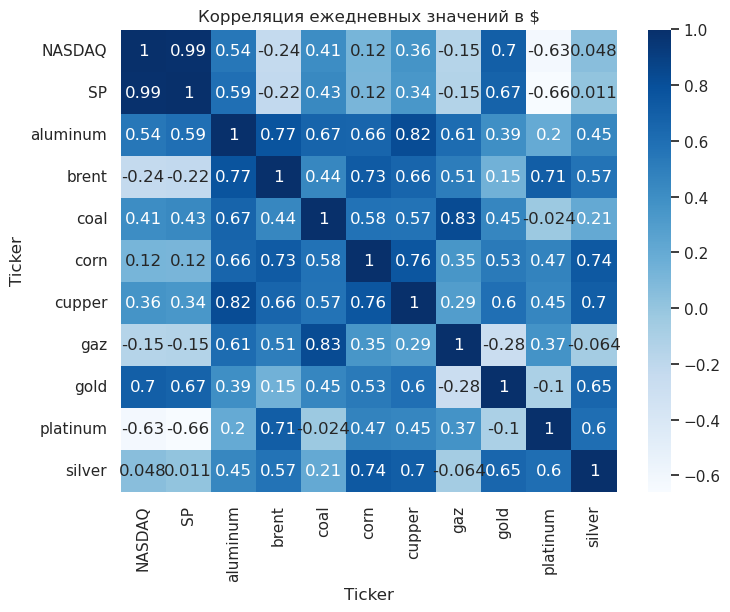

In [81]:
# Корреляция график heatmap

sns.set(rc = {'figure.figsize':(8, 6)})


sns.heatmap(corr, cmap='Blues', annot=True).set_title('Корреляция ежедневных значений в $')

Октябрь 2022:

Обратите внимание на пары товаров с высокой корреляцией (выше 0,75) такие как: 

Уголь - Газ         0,90 

Золото - Серебро    0,85

Уголь - Зерно       0,83 

Медь - Серебро      0,79 

Нефть - Алюминий    0,76 

Газ - Нефть         0,75 

Газ - Зерно         0,75 

Также следует заметить показатели корреляции платины, которые ведут себя практически независимо от других биржевых товаров. Смотрим на  показатель:

Платина - Серебро   0,36 - это пригодиться для последующего сравнения


июнь 2023:

Уголь - Газ         0,83 

Уголь - Зерно       0,58



In [82]:
# Определяем корреляцию Пирсона
# Коэффициент корреляции Пирсона применяется для исследования взаимосвязи двух переменных, 
# измеренных в метрических шкалах на одной и той же выборке. 
# Он позволяет определить, насколько пропорциональная изменчивость двух переменных.


# pearsonr(df['Coal'], df['Gold'])

# pearsonr(df['Brent'], df['CIF'])

# Коэфт корреляциии Спирмена
# Коэффициент корреляции Спирмена определяется как коэффициент корреляции Пирсона между ранговыми переменными.

# spearmanr(df['Brent'], df['Coal'])

# spearmanr(df['Brent'], df['CIF'])

Ticker       coal    brent      gaz     gold  platinum
Ticker                                                
coal      1.00000  0.44348  0.82557  0.45194  -0.02421
brent     0.44348  1.00000  0.50874  0.14757   0.70760
gaz       0.82557  0.50874  1.00000 -0.27545   0.37078
gold      0.45194  0.14757 -0.27545  1.00000  -0.10118
platinum -0.02421  0.70760  0.37078 -0.10118   1.00000


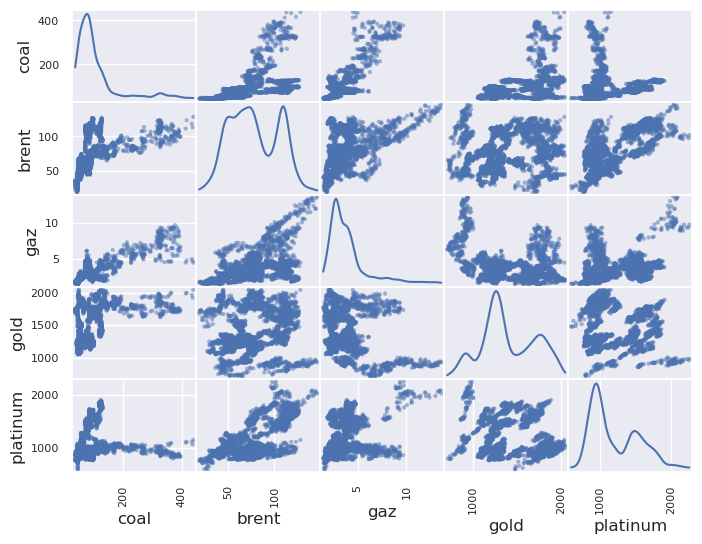

In [83]:
# Корреляция. Более наглядный график "scatter_matrix" по отдельным временным рядам

df1 = df02[["coal", 'brent', "gaz", 'gold', 'platinum']]

print(df1.corr())
pd.plotting.scatter_matrix(df1, diagonal='kde'); # , diagonal='kde'

#### 03.2 Ежедневная волотильность временных рядов
###### df_corr


<a href="#top">К оглавлению</a>

In [84]:
#  Ежедн изм

df_diff = df02 - df02.shift(1)

df_diff.dropna(inplace=True)

df_diff

Ticker         NASDAQ        SP  aluminum    brent  coal   corn  cupper  \
Date                                                                      
2014-05-07  -13.09009  10.48999    -23.75  1.07000 -0.30  -2.75 -0.0245   
2014-05-08  -16.16992  -2.57996     -7.25 -0.09000  0.30   3.00  0.0320   
2014-05-09   20.37012   2.84998    -34.50 -0.15000  0.00  -8.25  0.0180   
2014-05-12   71.98975  18.17004    -19.00  0.52000 -0.05  -7.50  0.0660   
2014-05-13  -13.68994   0.79993     -3.00  0.82999  0.00   5.75 -0.0170   
...               ...       ...       ...      ...   ...    ...     ...   
2023-08-09 -162.30078 -31.66992    -10.25  1.38000  0.90  -4.75  0.0195   
2023-08-10   15.97070   1.12012     32.00 -1.15000 -0.55   2.25 -0.0165   
2023-08-11  -93.14062  -4.78027    -39.50  0.41000  0.50  -8.75 -0.0365   
2023-08-14  143.48047  25.67041    -34.25 -0.60000 -0.80   1.25  0.0100   
2023-08-15 -157.28027 -51.86035     -5.50 -1.32000  0.80 -11.75 -0.0630   

Ticker        gaz      gold  platinum  silver  
Date                                           
2014-05-07 -0.059 -19.70007 -23.29993  -0.300  
2014-05-08 -0.168  -1.19995   3.29993  -0.204  
2014-05-09 -0.041  -0.09998  -8.19995  -0.017  
2014-05-12 -0.097   8.29993  12.00000   0.423  
2014-05-13 -0.076  -1.00000  13.79993   0.004  
...           ...       ...       ...     ...  
2023-08-09  0.182  -8.69995 -11.70001  -0.067  
2023-08-10 -0.196  -1.00000  22.00000   0.096  
2023-08-11  0.007  -1.50000  -0.29999  -0.072  
2023-08-14  0.025  -2.30005  -7.80005  -0.030  
2023-08-15 -0.136  -8.09998 -14.19995  -0.049  

[2164 rows x 11 columns]

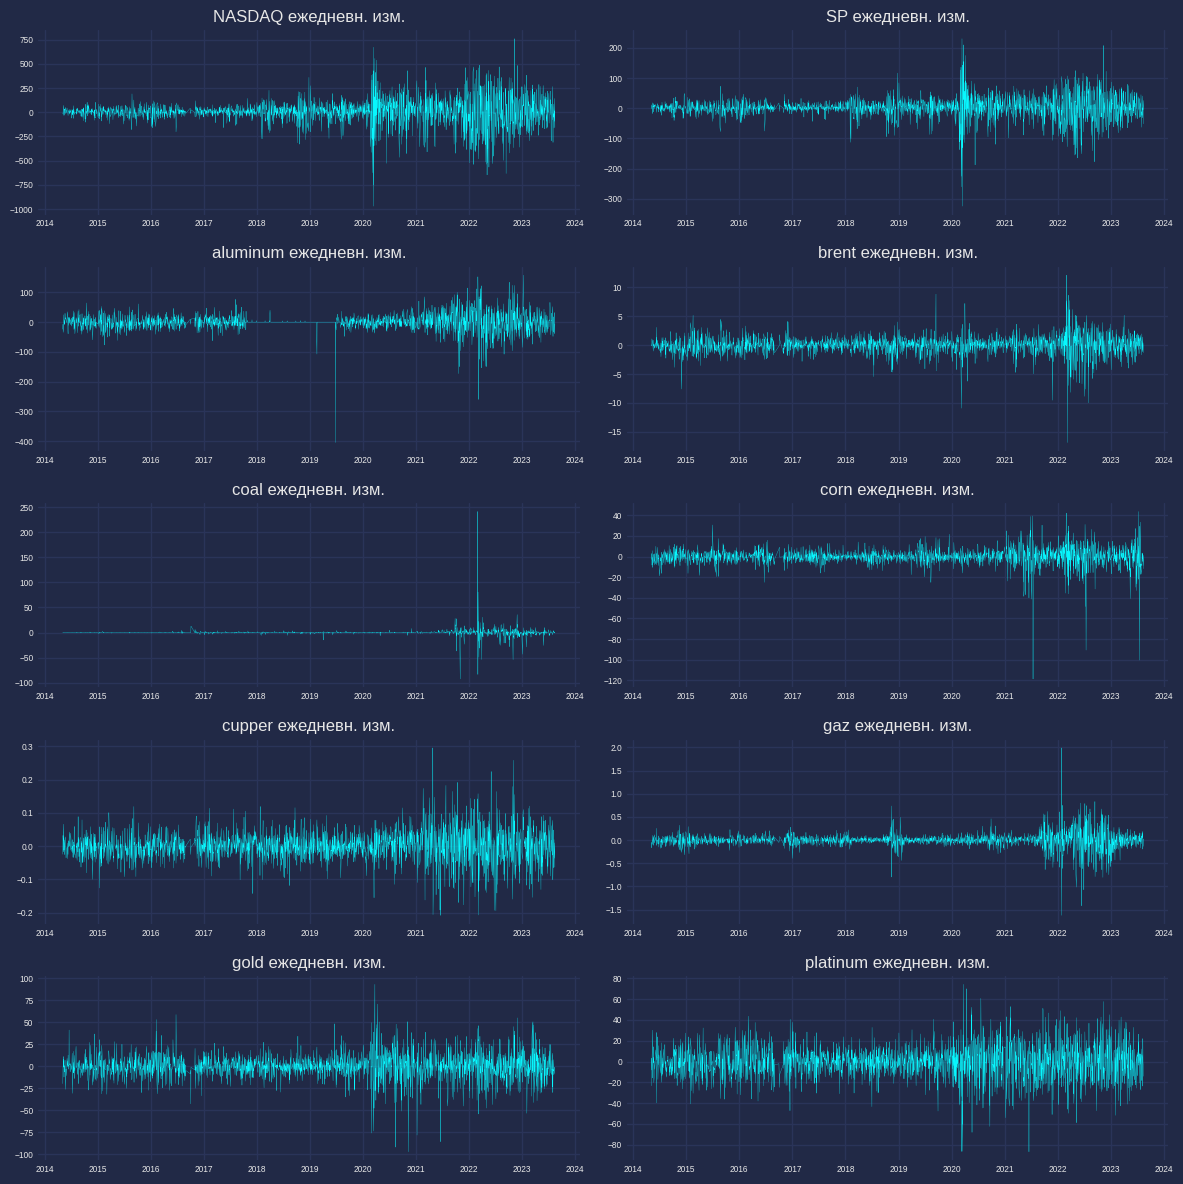

In [85]:
#  настройка графиков
plt.style.use("cyberpunk")

# графики ежедн изм
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_diff[df_diff.columns[i]]
    ax.plot(data_temp, linewidth=0.2) # , color='black'
    # Decorations
    ax.set_title(df_diff.columns[i] + ' ежедневн. изм.')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

### <h3 id="scaler1">04. Шкалирование временных рядов</h3>

###### df1_scaler

В данном случае шкалирование произвожу методом MinMaxScaler в диапазоне (0, 1)


<a href="#top">К оглавлению</a>

In [86]:
# Шкалирование 

scalerMMS = preprocessing.MinMaxScaler()



In [87]:
# Шкалирование получение Series
series_scaler = scalerMMS.fit_transform(df02)
series_scaler

array([[0.09067604, 0.18704475,        nan, ..., 0.11295112, 0.5746133 ,
        0.16025029],
       [0.09020609, 0.18704475,        nan, ..., 0.11993168, 0.57147171,
        0.16565312],
       [0.08357743, 0.17842102,        nan, ..., 0.11748103, 0.56984045,
        0.16474845],
       ...,
       [0.84656562, 0.92552485, 0.25981   , ..., 0.89536609, 0.1837844 ,
        0.34814292],
       [0.83593053, 0.91293748, 0.25753821, ..., 0.88935096, 0.17520541,
        0.34691158],
       [0.83596672, 0.91486713, 0.28294093, ..., 0.91378288, 0.18094489,
        0.34879631]])

In [88]:
# DataFrame ежедневных данных из series с нормализованными данными,

df_scaler = pd.DataFrame(series_scaler, index=df02.index)

df_scaler.columns = col

df_scaler

Ticker       NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Date                                                                         
2008-01-02  0.09068  0.18704       NaN  0.61941      NaN  0.31427  0.48975   
2008-01-03  0.09021  0.18704       NaN  0.61751      NaN  0.32078  0.52302   
2008-01-04  0.08358  0.17842       NaN  0.61112      NaN  0.32218  0.51446   
2008-01-07  0.08323  0.17953       NaN  0.59219      NaN  0.32125  0.50998   
2008-01-08  0.07924  0.17322       NaN  0.60126      NaN  0.34449  0.55032   
...             ...      ...       ...      ...      ...      ...      ...   
2023-08-10  0.84316  0.92045   0.29027  0.52915  0.19204  0.35286  0.68002   
2023-08-11  0.83686  0.91929   0.27396  0.53239  0.19329  0.33659  0.67011   
2023-08-14  0.84657  0.92552   0.25981  0.52765  0.19128  0.33891  0.67282   
2023-08-15  0.83593  0.91294   0.25754  0.51724  0.19329  0.31706  0.65571   
2023-08-16  0.83597  0.91487   0.28294  0.51558      NaN  0.34310  0.65938   

Ticker          gaz     gold  platinum   silver  
Date                                             
2008-01-02  0.52650  0.11295   0.57461  0.16025  
2008-01-03  0.51195  0.11993   0.57147  0.16565  
2008-01-04  0.52575  0.11748   0.56984  0.16475  
2008-01-07  0.52890  0.11488   0.56084  0.16058  
2008-01-08  0.53617  0.12855   0.57860  0.17382  
...             ...      ...       ...      ...  
2023-08-10  0.10591  0.89819   0.18868  0.35071  
2023-08-11  0.10649  0.89707   0.18850  0.34890  
2023-08-14  0.10856  0.89537   0.18378  0.34814  
2023-08-15  0.09731  0.88935   0.17521  0.34691  
2023-08-16  0.09111  0.91378   0.18094  0.34880  

[3933 rows x 11 columns]

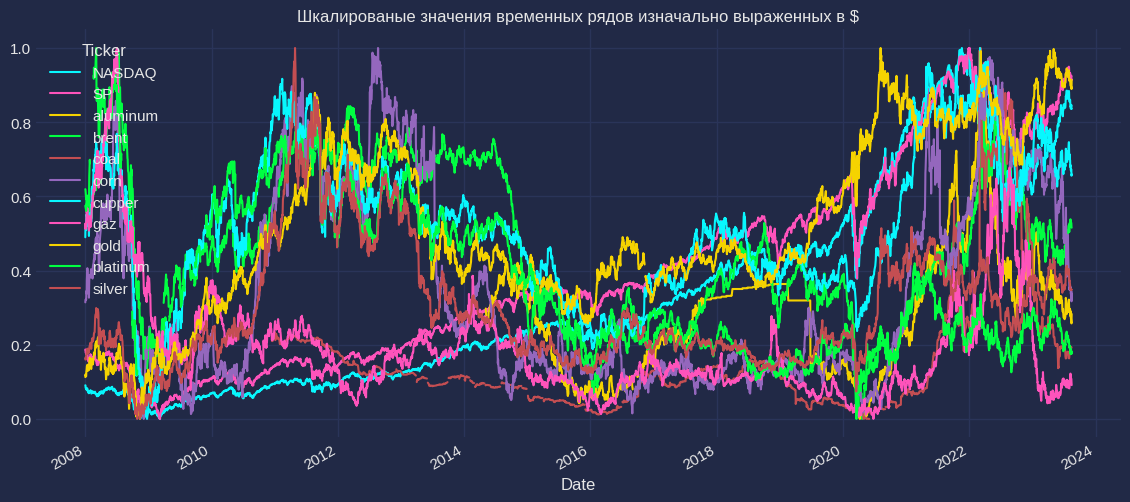

In [89]:
#  настройка графиков
plt.style.use("cyberpunk")

# График шкалированных врем рядов для наглядности
# В целом вид очень зашумленного и переполненного графика

df_scaler.plot(figsize=(14, 6), grid=True, title='Шкалированые значения временных рядов изначально выраженных в $');

Вышепредставленный график шкалированных в диапазоне 0 - 1 временных рядовов стоимости commodity выглядит очень зашумлено. Однако характерно видно начало COVID-19.

In [90]:
# Добавляю скользящие средние шкалированных значений
day = 30

df_scaler_roll_mean = df_scaler.rolling(day).mean() # (90, min_periods=30)

df_scaler_roll_mean

Ticker       NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Date                                                                         
2008-01-02      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
2008-01-03      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
2008-01-04      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
2008-01-07      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
2008-01-08      NaN      NaN       NaN      NaN      NaN      NaN      NaN   
...             ...      ...       ...      ...      ...      ...      ...   
2023-08-10  0.85977  0.92828   0.29135  0.48952  0.18055  0.44541  0.69925   
2023-08-11  0.85989  0.92883   0.29121  0.49280  0.18065  0.43880  0.69959   
2023-08-14  0.85989  0.92915   0.29074  0.49577  0.18060  0.43392  0.69944   
2023-08-15  0.85947  0.92901   0.29023  0.49847  0.18014  0.42814  0.69837   
2023-08-16  0.85911  0.92900   0.29047  0.50058      NaN  0.42379  0.69766   

Ticker          gaz     gold  platinum   silver  
Date                                             
2008-01-02      NaN      NaN       NaN      NaN  
2008-01-03      NaN      NaN       NaN      NaN  
2008-01-04      NaN      NaN       NaN      NaN  
2008-01-07      NaN      NaN       NaN      NaN  
2008-01-08      NaN      NaN       NaN      NaN  
...             ...      ...       ...      ...  
2023-08-10  0.09694  0.91925   0.20525  0.37877  
2023-08-11  0.09713  0.91934   0.20545  0.37884  
2023-08-14  0.09712  0.91908   0.20536  0.37870  
2023-08-15  0.09698  0.91860   0.20489  0.37845  
2023-08-16  0.09678  0.91899   0.20443  0.37801  

[3933 rows x 11 columns]

<AxesSubplot:title={'center':'Скользящие средние шкалированых значений по периоду в 30 дней'}, xlabel='Date'>

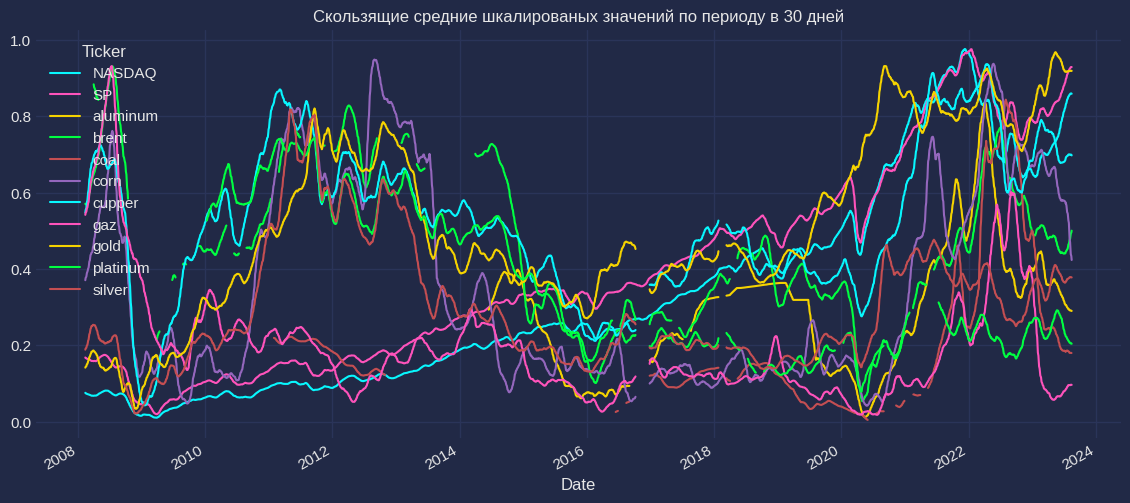

In [91]:
# График скользящих средних шкалированных значений
df_scaler_roll_mean.plot(figsize=(14, 6), grid=True, title=f'Скользящие средние шкалированых значений по периоду в {day} дней')
# пока отключил т.к. сложно интерпретируемо


При переходе к скользящим средмим шкалированных значений уже становится видно влияние начала событий 2022 года.

### 05. Перход к измерению в унциях золота
###### df_gold

Таким обрзом произвожу дефляцию (деление временого ряда на другой ряд) (стр. 279 книги Стефана Янсена) с целью конвентирования в реальную меру.




<a href="#top">К оглавлению</a>

In [92]:
# Прересчет в унции золота

df_gold = pd.DataFrame()

for column in df02.columns:
    df_gold[column] = df02[column] / df02['gold']
    

df_gold

NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Date                                                                         
2008-01-02  3.04508  1.68863       NaN  0.11417      NaN  0.53967  0.00356   
2008-01-03  3.00402  1.67031       NaN  0.11265      NaN  0.53786  0.00366   
2008-01-04  2.90192  1.63553       NaN  0.11214      NaN  0.54078  0.00364   
2008-01-07  2.90770  1.64749       NaN  0.10981      NaN  0.54240  0.00364   
2008-01-08  2.77962  1.58336       NaN  0.10882      NaN  0.54527  0.00373   
...             ...      ...       ...      ...      ...      ...      ...   
2023-08-10  7.17613  2.33432   1.12555  0.04513  0.06025  0.25243  0.00196   
2023-08-11  7.13307  2.33366   1.10578  0.04538  0.06056  0.24805  0.00194   
2023-08-14  7.21675  2.34990   1.08919  0.04512  0.06022  0.24901  0.00195   
2023-08-15  7.16481  2.33265   1.09093  0.04462  0.06089  0.24389  0.00192   
2023-08-16  7.04329  2.29710   1.10416  0.04375      NaN  0.24698  0.00190   

                gaz  gold  platinum   silver  
Date                                          
2008-01-02  0.00916   1.0   1.80513  0.01770  
2008-01-03  0.00886   1.0   1.77955  0.01775  
2008-01-04  0.00908   1.0   1.78322  0.01778  
2008-01-07  0.00917   1.0   1.77315  0.01766  
2008-01-08  0.00907   1.0   1.76948  0.01789  
...             ...   ...       ...      ...  
2023-08-10  0.00144   1.0   0.47440  0.01188  
2023-08-11  0.00145   1.0   0.47462  0.01185  
2023-08-14  0.00146   1.0   0.47111  0.01185  
2023-08-15  0.00140   1.0   0.46565  0.01188  
2023-08-16  0.00134   1.0   0.46264  0.01171  

[3933 rows x 11 columns]

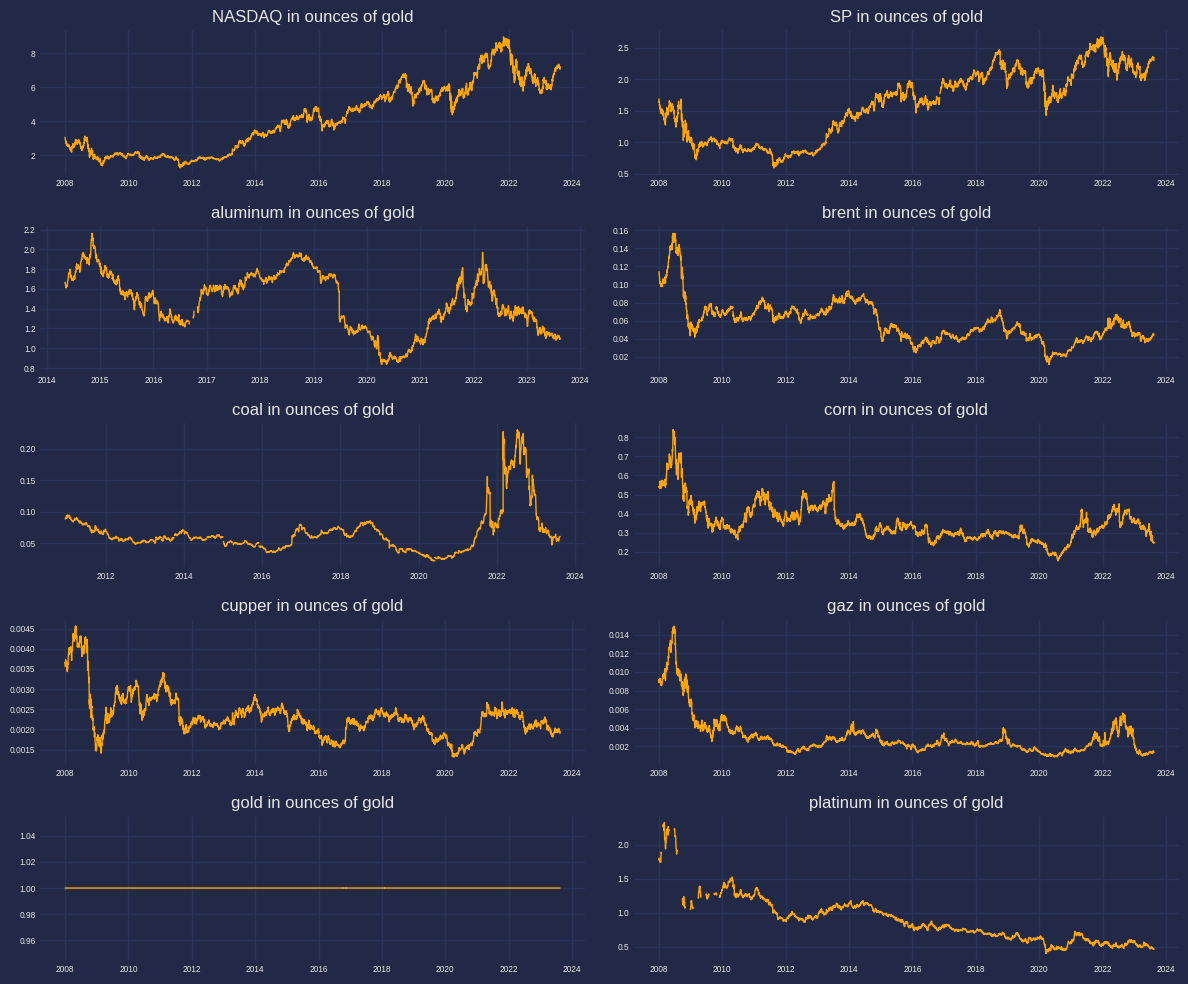

In [93]:
# графики стоимости выраженыех в унциях золота
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,10)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_gold[df_gold.columns[i]]
    ax.plot(data_temp, color='orange', linewidth=1)
    # Decorations
    ax.set_title(df_gold.columns[i]+' in ounces of gold')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

In [94]:
# удаляю столбцы с постоянными значениями

df1_gold = df_gold.drop('gold', axis=1)


# делаю прореживание данных на среднемесячные значения
# так же делая для измерения в золоте и нефти
df_gold_month = df1_gold.resample('M').mean()
df_gold_day = df1_gold.resample('D').mean()

df_gold_month

NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Date                                                                         
2008-01-31  2.71576  1.54817       NaN  0.10343      NaN  0.54812  0.00359   
2008-02-29  2.51588  1.46540       NaN  0.10229      NaN  0.55787  0.00388   
2008-03-31  2.34426  1.36909       NaN  0.10681      NaN  0.56912  0.00396   
2008-04-30  2.60550  1.50771       NaN  0.12148      NaN  0.65257  0.00433   
2008-05-31  2.79762  1.58094       NaN  0.13999      NaN  0.67354  0.00425   
...             ...      ...       ...      ...      ...      ...      ...   
2023-04-30  6.03389  2.05978   1.17842  0.04166  0.06897  0.32728  0.00200   
2023-05-31  6.24737  2.08066   1.14598  0.03795  0.06010  0.30534  0.00188   
2023-06-30  6.93553  2.23841   1.13769  0.03859  0.05804  0.31688  0.00196   
2023-07-31  7.19333  2.31089   1.10759  0.04119  0.05664  0.28132  0.00197   
2023-08-31  7.19345  2.33186   1.11150  0.04449  0.05816  0.25000  0.00196   

                gaz  platinum   silver  
Date                                    
2008-01-31  0.00897   1.78656  0.01801  
2008-02-29  0.00934   2.25349  0.01907  
2008-03-31  0.01000   2.10902  0.01988  
2008-04-30  0.01132   2.20222  0.01921  
2008-05-31  0.01282       NaN  0.01915  
...             ...       ...      ...  
2023-04-30  0.00110   0.52707  0.01254  
2023-05-31  0.00115   0.53505  0.01219  
2023-06-30  0.00128   0.50437  0.01204  
2023-07-31  0.00135   0.48610  0.01240  
2023-08-31  0.00139   0.47136  0.01199  

[188 rows x 10 columns]

#### 05.1 Корреляция временных рядов выраженная в унциях золота
###### corr_gold


<a href="#top">К оглавлению</a>

In [95]:
# Корреляция в показателях пересчитаных в унции золота.

corr_gold = df_gold.corr()
corr_gold

NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
NASDAQ    1.00000  0.96254  -0.18521 -0.53904  0.23290 -0.47642 -0.32030   
SP        0.96254  1.00000   0.09623 -0.43117  0.23457 -0.40992 -0.22796   
aluminum -0.18521  0.09623   1.00000  0.74111  0.26532  0.36619  0.77786   
brent    -0.53904 -0.43117   0.74111  1.00000  0.27967  0.80582  0.84075   
coal      0.23290  0.23457   0.26532  0.27967  1.00000  0.39238  0.33970   
corn     -0.47642 -0.40992   0.36619  0.80582  0.39238  1.00000  0.71811   
cupper   -0.32030 -0.22796   0.77786  0.84075  0.33970  0.71811  1.00000   
gaz      -0.31534 -0.18502   0.54979  0.77323  0.70183  0.75246  0.75119   
gold          NaN      NaN       NaN      NaN      NaN      NaN      NaN   
platinum -0.75244 -0.66886   0.56644  0.79498 -0.14954  0.63656  0.78664   
silver   -0.67308 -0.71163   0.29975  0.57403 -0.01879  0.58647  0.51822   

              gaz  gold  platinum   silver  
NASDAQ   -0.31534   NaN  -0.75244 -0.67308  
SP       -0.18502   NaN  -0.66886 -0.71163  
aluminum  0.54979   NaN   0.56644  0.29975  
brent     0.77323   NaN   0.79498  0.57403  
coal      0.70183   NaN  -0.14954 -0.01879  
corn      0.75246   NaN   0.63656  0.58647  
cupper    0.75119   NaN   0.78664  0.51822  
gaz       1.00000   NaN   0.70684  0.24750  
gold          NaN   NaN       NaN      NaN  
platinum  0.70684   NaN   1.00000  0.63877  
silver    0.24750   NaN   0.63877  1.00000

Text(0.5, 1.0, 'Корреляции показателей, выраженных в унциях золота')

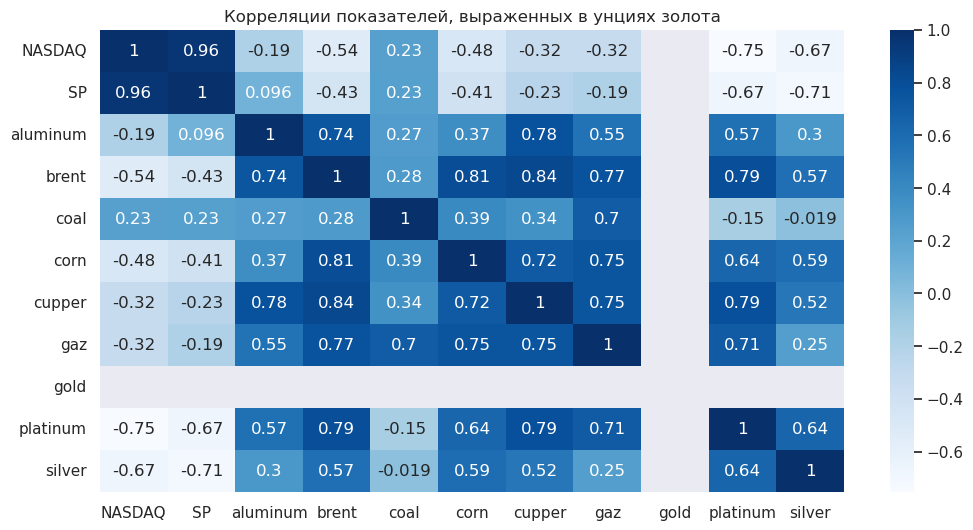

In [96]:
# граф корреляции средн мес знач выраж в унциях золота

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(corr_gold, cmap='Blues', annot=True).set_title('Корреляции показателей, выраженных в унциях золота')

Октябр 2022:

Посмотрим как трасформировалась корреляция при переходы с долл. на унции золота. Заметно снижение:

Уголь - Газ         0,90    --> 0,79 

Золото - Серебро    0,85    --> ---

Уголь - Зерно       0,83    --> 0,65

Медь - Серебро      0,79    --> 0,37

Нефть - Алюминий    0,76    --> 0,70

Газ - Нефть         0,75    --> 0,64

Газ - Зерно         0,75    --> 0,63


А вот, что с платиной идет увеличение:

Платина - Серебро   0,36    --> 0,67


июнь 2023:

Уголь - Газ         0,83    --> 0,71 

             coal    brent      gaz  aluminum
coal      1.00000  0.27967  0.70183   0.26532
brent     0.27967  1.00000  0.77323   0.74111
gaz       0.70183  0.77323  1.00000   0.54979
aluminum  0.26532  0.74111  0.54979   1.00000


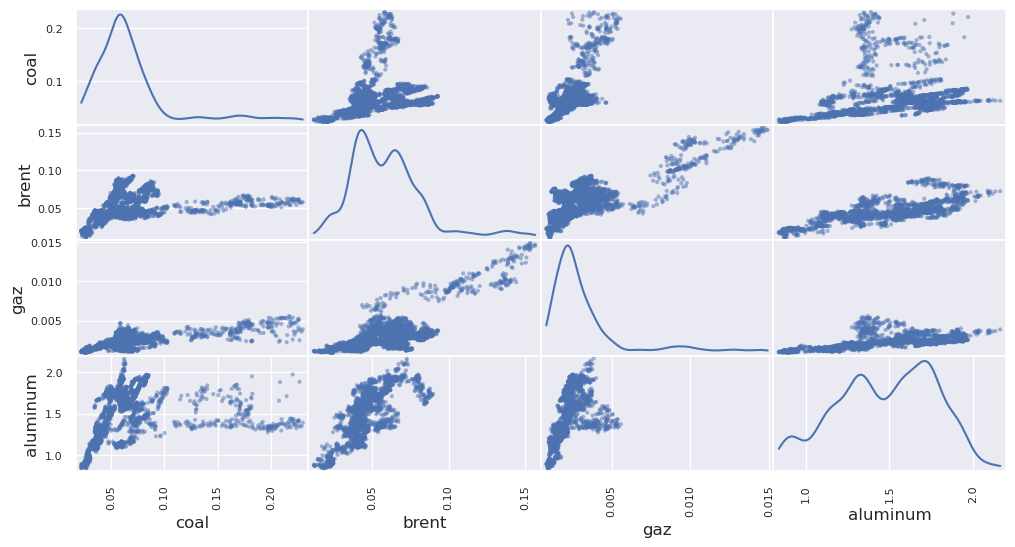

In [97]:
# Корреляция график scatter_matrix по отдельным временным рядам, выраженных в унциях золота

df1_gold = df_gold[["coal", 'brent', "gaz", 'aluminum']]

print(df1_gold.corr())
pd.plotting.scatter_matrix(df1_gold, diagonal='kde'); # , diagonal='kde'

In [98]:
# Временной ряд стоимости угля в унциях золота
coal_g = df_gold['coal']

coal_g.dropna(how='any', inplace=True)

coal_g

Date
2010-12-17    0.08886
2010-12-20    0.08842
2010-12-21    0.08878
2010-12-22    0.09050
2010-12-23    0.09076
               ...   
2023-08-09    0.06051
2023-08-10    0.06025
2023-08-11    0.06056
2023-08-14    0.06022
2023-08-15    0.06089
Name: coal, Length: 3074, dtype: float64

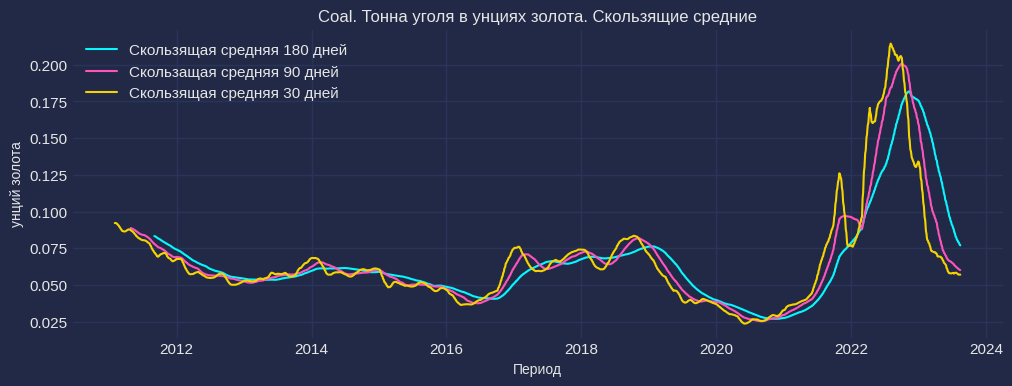

In [99]:
# Уголь в унциях золота
# Скользящие средние разных периодов в унциях золота


coal_g_rol180 = coal_g.rolling(180).mean()
coal_g_rol90 = coal_g.rolling(90).mean()
coal_g_rol30 = coal_g.rolling(30).mean()

# график скользящих средних
plt.style.use("cyberpunk")
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_g_rol180, label='Скользящая средняя 180 дней')
plt.plot(coal_g_rol90, label='Скользащая средняя 90 дней')
plt.plot(coal_g_rol30, label='Скользящая средняя 30 дней')
plt.title('Coal. Тонна уголя в унциях золота. Скользящие средние')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("унций золота", fontsize = 10)
plt.legend()
plt.show()

Вышепредставленный график достаточно близко похож к скользящим средним стоимости удля в долл., но есть особенность, что короткая скользящая средняя в золоте не пересекает длинную, в отличии от оценки в долл.

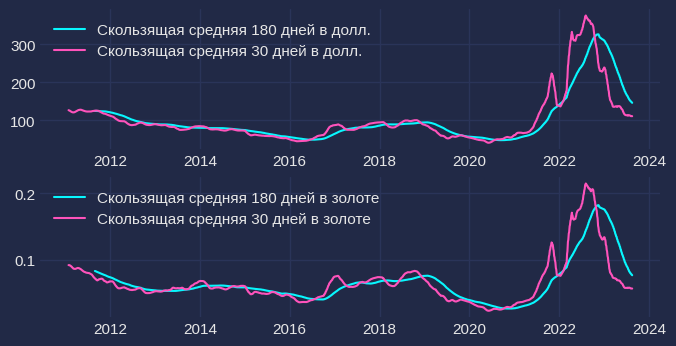

In [100]:
plt.style.use("cyberpunk")
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(coal_rol180, label='Скользящая средняя 180 дней в долл.')
plt.plot(coal_rol30, label='Скользящая средняя 30 дней в долл.')
plt.legend()

plt.subplot(212)
plt.plot(coal_g_rol180, label='Скользящая средняя 180 дней в золоте')
plt.plot(coal_g_rol30, label='Скользящая средняя 30 дней в золоте')
plt.legend()

plt.show()

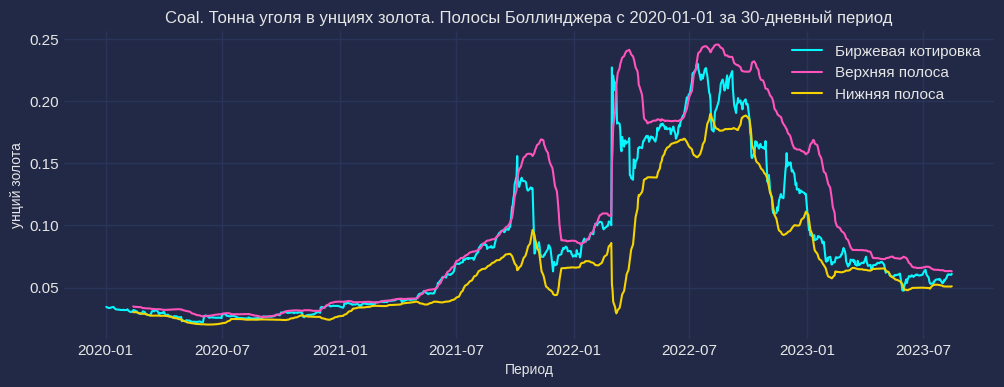

In [101]:
# Уголь в унциях золота
# полосы Боллинджера с заданной даты

n = 30
date = '2020-01-01'

coal_g_d = coal_g[date:]
coal_g_ma = coal_g_d.rolling(window=n).mean()
coal_g_sd = coal_g_d.rolling(window=n).std()

coal_g_line1 = coal_g_ma + (2 * coal_g_sd)
coal_g_line2 = coal_g_ma - (2 * coal_g_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_g_d, label='Биржевая котировка')
plt.plot(coal_g_line1, label='Верхняя полоса')
plt.plot(coal_g_line2, label='Нижняя полоса')
plt.title(f'Coal. Тонна уголя в унциях золота. Полосы Боллинджера c {date} за {n}-дневный период')
plt.xlabel("Период", fontsize = 10)
plt.ylabel("унций золота", fontsize = 10)
plt.legend()
plt.show()

In [102]:
# Нормализовываю знач в унциях золота

# series:
series_scaler_gold = scalerMMS.fit_transform(df_gold)

series_scaler_gold

# DataFrame с нормализованными данными:
df_gold_scaler = pd.DataFrame(series_scaler_gold, index=df_gold.index)

df_gold_scaler.columns = col

df_gold_scaler

Ticker       NASDAQ       SP  aluminum    brent     coal     corn   cupper  \
Date                                                                         
2008-01-02  0.23347  0.52651       NaN  0.70676      NaN  0.56300  0.69179   
2008-01-03  0.22816  0.51769       NaN  0.69632      NaN  0.56037  0.72342   
2008-01-04  0.21494  0.50095       NaN  0.69283      NaN  0.56461  0.71650   
2008-01-07  0.21569  0.50670       NaN  0.67675      NaN  0.56696  0.71515   
2008-01-08  0.19910  0.47583       NaN  0.66992      NaN  0.57113  0.74376   
...             ...      ...       ...      ...      ...      ...      ...   
2023-08-10  0.76833  0.83738   0.21763  0.23144  0.18340  0.14615  0.19931   
2023-08-11  0.76275  0.83706   0.20272  0.23316  0.18488  0.13980  0.19391   
2023-08-14  0.77359  0.84488   0.19021  0.23137  0.18322  0.14118  0.19624   
2023-08-15  0.76686  0.83657   0.19153  0.22792  0.18648  0.13376  0.18860   
2023-08-16  0.75113  0.81946   0.20151  0.22195      NaN  0.13824  0.18068   

Ticker          gaz  gold  platinum   silver  
Date                                          
2008-01-02  0.59078   0.0   0.72951  0.41843  
2008-01-03  0.56930   0.0   0.71622  0.42084  
2008-01-04  0.58545   0.0   0.71813  0.42197  
2008-01-07  0.59121   0.0   0.71290  0.41679  
2008-01-08  0.58469   0.0   0.71099  0.42666  
...             ...   ...       ...      ...  
2023-08-10  0.04277   0.0   0.03841  0.16893  
2023-08-11  0.04311   0.0   0.03852  0.16772  
2023-08-14  0.04416   0.0   0.03670  0.16765  
2023-08-15  0.03953   0.0   0.03386  0.16871  
2023-08-16  0.03509   0.0   0.03230  0.16172  

[3933 rows x 11 columns]

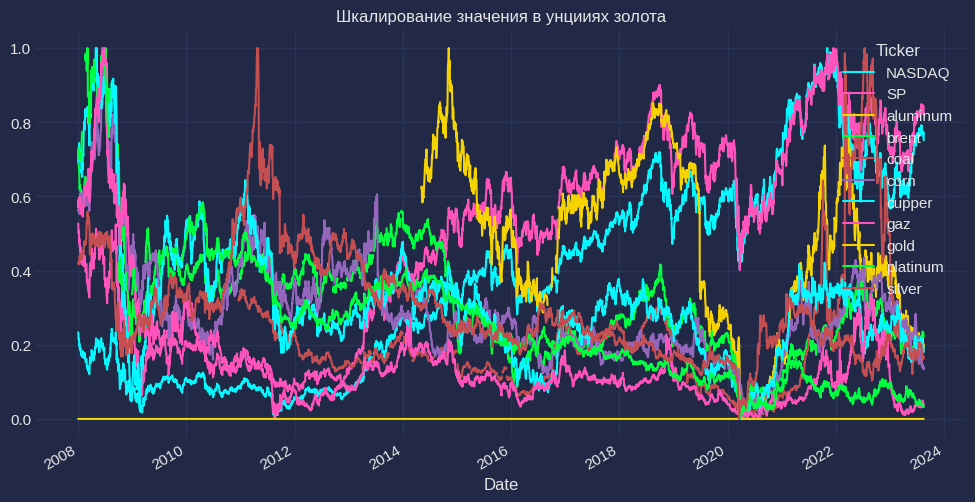

In [103]:
# График шкалированных значения временных рядов изначально выраженных в унциях золота
df_gold_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование значения в унцииях золота');

На вышепредставленном графике характерно виднен общее падение до маинимальных значений в первой половине 2020 года - начало COVID-19.
Напоминю, что стоимость одной унции золота взлетела тогда до 1750$.

### 06. Перход к измерению в баррелях нефти
###### df_brent


<a href="#top">К оглавлению</a>

In [104]:
# Прересчет в баррели нефти

df_brent = pd.DataFrame()

for column in df02.columns:
    df_brent[column] = df02[column] / df02['brent']
    

df_brent

NASDAQ        SP  aluminum  brent     coal     corn   cupper  \
Date                                                                          
2008-01-02   26.67242  14.79109       NaN    1.0      NaN  4.72711  0.03118   
2008-01-03   26.66680  14.82746       NaN    1.0      NaN  4.77459  0.03251   
2008-01-04   25.87716  14.58446       NaN    1.0      NaN  4.82230  0.03246   
2008-01-07   26.48014  15.00350       NaN    1.0      NaN  4.93961  0.03311   
2008-01-08   25.54438  14.55087       NaN    1.0      NaN  5.01099  0.03426   
...               ...       ...       ...    ...      ...      ...      ...   
2023-08-10  159.00451  51.72257  24.93924    1.0  1.33507  5.59317  0.04341   
2023-08-11  157.18062  51.42322  24.36643    1.0  1.33452  5.46596  0.04279   
2023-08-14  159.93887  52.07888  24.13873    1.0  1.33453  5.51850  0.04320   
2023-08-15  160.57309  52.27777  24.44929    1.0  1.36471  5.46590  0.04313   
2023-08-16  160.97762  52.50130  25.23618    1.0      NaN  5.64478  0.04340   

                gaz      gold  platinum   silver  
Date                                              
2008-01-02  0.08023   8.75920  15.81153  0.15502  
2008-01-03  0.07863   8.87705  15.79713  0.15760  
2008-01-04  0.08101   8.91724  15.90144  0.15855  
2008-01-07  0.08347   9.10690  16.14790  0.16082  
2008-01-08  0.08339   9.18987  16.26125  0.16440  
...             ...       ...       ...      ...  
2023-08-10  0.03198  22.15741  10.51157  0.26326  
2023-08-11  0.03191  22.03548  10.45847  0.26119  
2023-08-14  0.03242  22.16216  10.44078  0.26266  
2023-08-15  0.03132  22.41136  10.43586  0.26617  
2023-08-16  0.03051  22.85546  10.57393  0.26771  

[3933 rows x 11 columns]

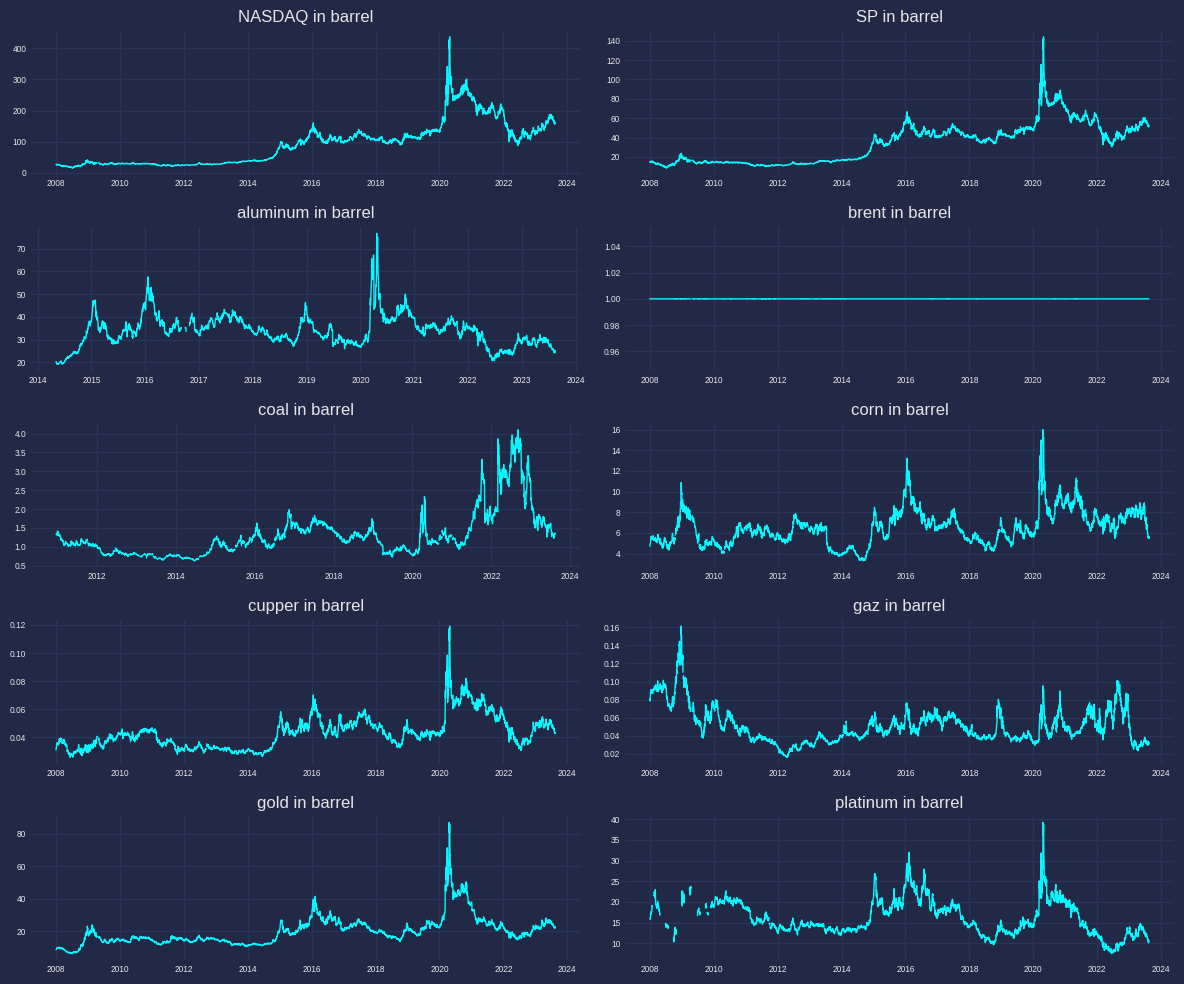

In [105]:
# графики стоимости выраженыех в баррелях нефти
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,10)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_brent[df_brent.columns[i]]
    ax.plot(data_temp, linewidth=1) # , color='black'
    # Decorations
    ax.set_title(df_brent.columns[i] + ' in barrel')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

In [106]:
# удаляю столбцы с постоянными значениями

df1_brent = df_brent.drop('brent', axis=1)

# делаю прореживание данных на среднемесячные значения
# так же делая для измерения в золоте и нефти

df_brent_month = df1_brent.resample('M').mean()
df_brent_day = df1_brent.resample('D').mean()

df_brent_month

NASDAQ        SP  aluminum     coal     corn   cupper      gaz  \
Date                                                                            
2008-01-31   26.25301  14.97273       NaN      NaN  5.31251  0.03480  0.08685   
2008-02-29   24.61958  14.33885       NaN      NaN  5.45693  0.03791  0.09125   
2008-03-31   21.95016  12.82061       NaN      NaN  5.32954  0.03709  0.09363   
2008-04-30   21.47466  12.42912       NaN      NaN  5.38302  0.03573  0.09314   
2008-05-31   20.00439  11.30610       NaN      NaN  4.81634  0.03042  0.09158   
...               ...       ...       ...      ...      ...      ...      ...   
2023-04-30  144.96636  49.48870  28.31274  1.65770  7.86104  0.04801  0.02641   
2023-05-31  164.65377  54.84769  30.21484  1.58450  8.05664  0.04950  0.03041   
2023-06-30  179.77715  58.02101  29.49229  1.50441  8.21267  0.05068  0.03305   
2023-07-31  174.79867  56.15328  26.91336  1.37734  6.83990  0.04777  0.03286   
2023-08-31  161.74507  52.42880  24.99258  1.30483  5.62114  0.04409  0.03134   

                gold  platinum   silver  
Date                                     
2008-01-31   9.69002  17.26151  0.17454  
2008-02-29   9.78282  21.68186  0.18649  
2008-03-31   9.36973  19.76718  0.18636  
2008-04-30   8.25180  18.28613  0.15858  
2008-05-31   7.14813       NaN  0.13688  
...              ...       ...      ...  
2023-04-30  24.02483  12.67429  0.30127  
2023-05-31  26.37396  14.10780  0.32155  
2023-06-30  25.92257  13.07466  0.31225  
2023-07-31  24.30191  11.81261  0.30136  
2023-08-31  22.48416  10.59880  0.26967  

[188 rows x 10 columns]

#### 06.1 Корреляция временных рядов выраженная в баррелях нефти
###### corr_brent


<a href="#top">К оглавлению</a>

In [107]:
# Корреляция в показателях пересчитаных в баррели нефти.

corr_brent = df_brent.corr()
corr_brent

NASDAQ       SP  aluminum  brent     coal     corn   cupper  \
NASDAQ    1.00000  0.98456   0.56304    NaN  0.35096  0.66517  0.87440   
SP        0.98456  1.00000   0.69548    NaN  0.33629  0.68954  0.88144   
aluminum  0.56304  0.69548   1.00000    NaN -0.09091  0.69405  0.82886   
brent         NaN      NaN       NaN    NaN      NaN      NaN      NaN   
coal      0.35096  0.33629  -0.09091    NaN  1.00000  0.29592  0.23643   
corn      0.66517  0.68954   0.69405    NaN  0.29592  1.00000  0.74613   
cupper    0.87440  0.88144   0.82886    NaN  0.23643  0.74613  1.00000   
gaz       0.01225  0.03782   0.33014    NaN  0.67716  0.18773  0.08131   
gold      0.86975  0.89710   0.77503    NaN  0.14460  0.77831  0.89284   
platinum  0.21398  0.28871   0.76718    NaN -0.23998  0.49266  0.56724   
silver    0.69725  0.70215   0.75232    NaN -0.01238  0.75329  0.81965   

              gaz     gold  platinum   silver  
NASDAQ    0.01225  0.86975   0.21398  0.69725  
SP        0.03782  0.89710   0.28871  0.70215  
aluminum  0.33014  0.77503   0.76718  0.75232  
brent         NaN      NaN       NaN      NaN  
coal      0.67716  0.14460  -0.23998 -0.01238  
corn      0.18773  0.77831   0.49266  0.75329  
cupper    0.08131  0.89284   0.56724  0.81965  
gaz       1.00000  0.03783   0.29760 -0.07508  
gold      0.03783  1.00000   0.56737  0.87918  
platinum  0.29760  0.56737   1.00000  0.65291  
silver   -0.07508  0.87918   0.65291  1.00000

Text(0.5, 1.0, 'Корреляции показателей, выраженных в баррелях нефти')

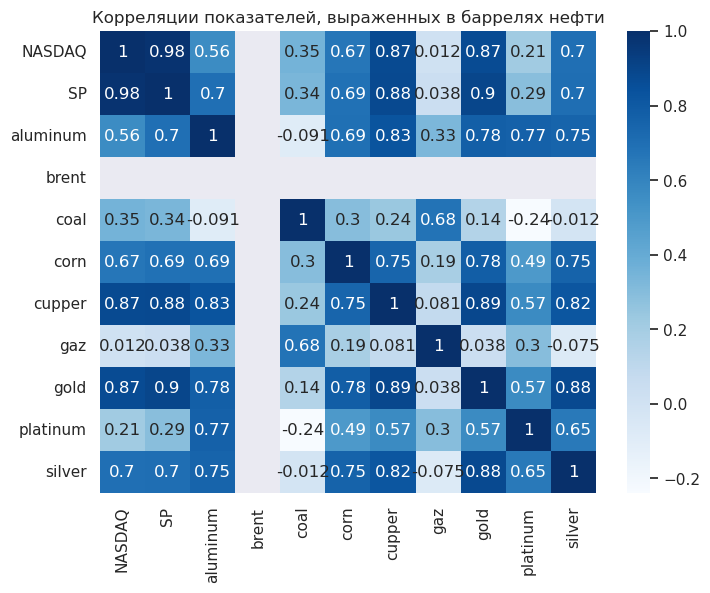

In [108]:
# граф корреляции средн мес знач выраж в баррелях нефти.

sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr_brent, cmap='Blues', annot=True).set_title('Корреляции показателей, выраженных в баррелях нефти')

Октябрь 2022:

К корреляции в долл., затем в золоте добавляем корреляцию в барелях:


Уголь - Газ         0,90    --> 0,79    --> 0,70 

Золото - Серебро    0,85    --> ---     --> 0,93

Уголь - Зерно       0,83    --> 0,65    --> 0,18

Медь - Серебро      0,79    --> 0,37    --> 0,78

Нефть - Алюминий    0,76    --> 0,70    --> ---

Газ - Нефть         0,75    --> 0,64    --> ---

Газ - Зерно         0,75    --> 0,63    --> 0,4


А вот, что с платиной:

Платина - Серебро   0,36    --> 0,67    --> 0,80

Интерпритацию данных значений оставлю на последующий анализ и осмысление, что бы не попасть в ловушку "ложных корреляций" и поверхностного подхода.

июнь 2023:

Уголь - Газ         0,83    --> 0,71    --> 0,72 

             coal     gold      gaz  aluminum
coal      1.00000  0.14460  0.67716  -0.09091
gold      0.14460  1.00000  0.03783   0.77503
gaz       0.67716  0.03783  1.00000   0.33014
aluminum -0.09091  0.77503  0.33014   1.00000


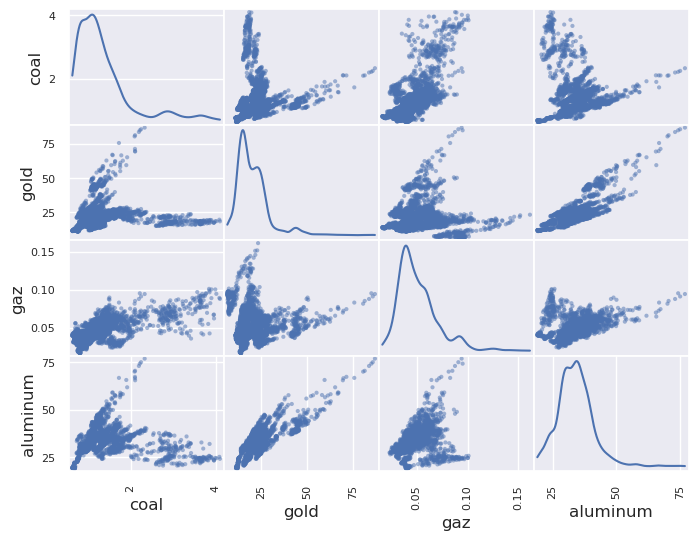

In [109]:
# Корреляция график scatter_matrix по отдельным временным рядам, выраженных в баррелях неефти.

df1_brent = df_brent[["coal", 'gold', "gaz", 'aluminum']]

print(df1_brent.corr())
pd.plotting.scatter_matrix(df1_brent, diagonal='kde'); # , diagonal='kde'

In [110]:
# Уголь в барелях нефти

# Временной ряд стоимости угля в унциях золота
coal_b = df_brent['coal']

coal_b.dropna(how='any', inplace=True)

coal_b


coal_b_rol180 = coal_b.rolling(180).mean()
coal_b_rol90 = coal_b.rolling(90).mean()
coal_b_rol30 = coal_b.rolling(30).mean()


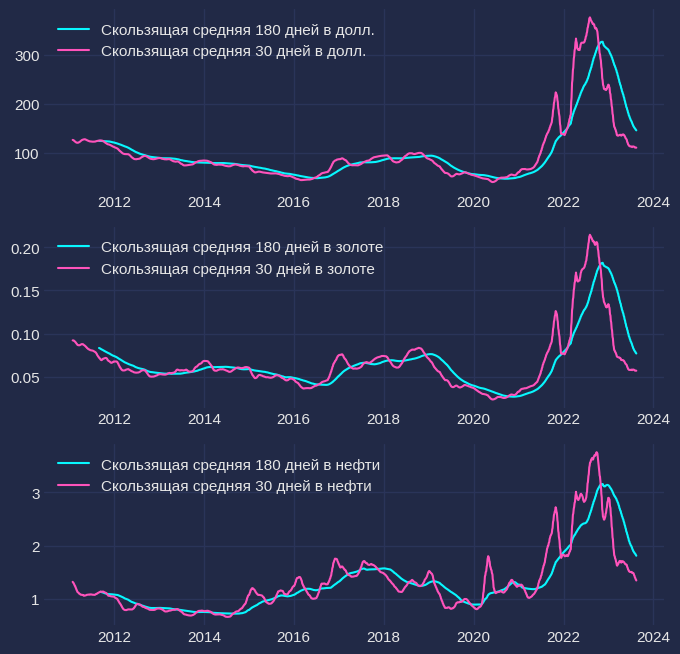

In [111]:
# Продолжение внлиза скользящих средних в сравнении


plt.style.use("cyberpunk")
plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(coal_rol180, label='Скользящая средняя 180 дней в долл.')
plt.plot(coal_rol30, label='Скользящая средняя 30 дней в долл.')
plt.legend()

plt.subplot(312)
plt.plot(coal_g_rol180, label='Скользящая средняя 180 дней в золоте')
plt.plot(coal_g_rol30, label='Скользящая средняя 30 дней в золоте')
plt.legend()

plt.subplot(313)
plt.plot(coal_b_rol180, label='Скользящая средняя 180 дней в нефти')
plt.plot(coal_b_rol30, label='Скользящая средняя 30 дней в нефти')
plt.legend()


plt.show()

In [112]:
# Нормализовываю знач в баррелях неефти.

# series:
series_scaler_brent = scalerMMS.fit_transform(df_brent)

series_scaler_brent

# DataFrame с нормализованными данными:
df_brent_scaler = pd.DataFrame(series_scaler_brent, index=df_brent.index)

df_brent_scaler.columns = col

df_brent_scaler

Ticker       NASDAQ       SP  aluminum  brent     coal     corn   cupper  \
Date                                                                       
2008-01-02  0.02682  0.04619       NaN    0.0      NaN  0.11258  0.05602   
2008-01-03  0.02681  0.04645       NaN    0.0      NaN  0.11632  0.07031   
2008-01-04  0.02493  0.04466       NaN    0.0      NaN  0.12008  0.06974   
2008-01-07  0.02637  0.04775       NaN    0.0      NaN  0.12931  0.07672   
2008-01-08  0.02414  0.04441       NaN    0.0      NaN  0.13493  0.08912   
...             ...      ...       ...    ...      ...      ...      ...   
2023-08-10  0.34088  0.31882   0.10192    0.0  0.20272  0.18077  0.18730   
2023-08-11  0.33656  0.31661   0.09199    0.0  0.20256  0.17075  0.18059   
2023-08-14  0.34310  0.32145   0.08805    0.0  0.20256  0.17489  0.18503   
2023-08-15  0.34461  0.32292   0.09343    0.0  0.21125  0.17075  0.18428   
2023-08-16  0.34557  0.32457   0.10706    0.0      NaN  0.18483  0.18714   

Ticker          gaz     gold  platinum   silver  
Date                                             
2008-01-02  0.44105  0.02959   0.26156  0.07219  
2008-01-03  0.43000  0.03105   0.26110  0.07611  
2008-01-04  0.44641  0.03155   0.26439  0.07755  
2008-01-07  0.46336  0.03391   0.27217  0.08099  
2008-01-08  0.46278  0.03494   0.27575  0.08643  
...             ...      ...       ...      ...  
2023-08-10  0.10889  0.19615   0.09432  0.23641  
2023-08-11  0.10840  0.19463   0.09264  0.23327  
2023-08-14  0.11193  0.19621   0.09209  0.23550  
2023-08-15  0.10437  0.19931   0.09193  0.24082  
2023-08-16  0.09881  0.20483   0.09629  0.24316  

[3933 rows x 11 columns]

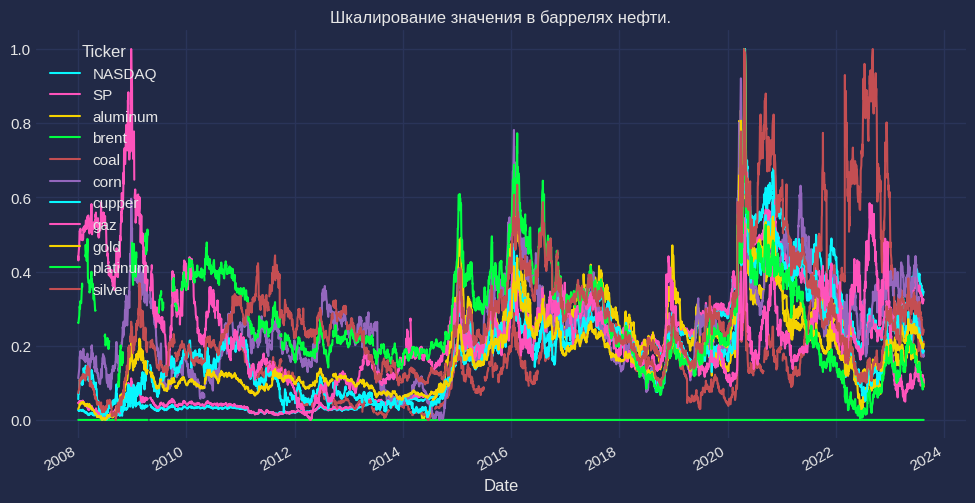

In [113]:
# График шкалированных значения временных рядов изначально выраженных в баррелях нефти.
# настройка графиков
plt.style.use("cyberpunk")
df_brent_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование значения в баррелях нефти.');

В расчете на беррель нефти график выглядит противоположно в сравнении с графиком в унции золота. Как мы помним одномоментнтно с началом COVID-19 стоимсоть барреля нефти снижалась практически до нуля и, следовательно, стоимость биржевых товаров взлетает до максимальных значений.

### 07. Представление шкалированной стоимости угля в разных ед.измерения
###### df2


<a href="#top">К оглавлению</a>

Ниже представленный график шкалированнаной стоимость угля в разных ед.измерения необходимо интерпретировать.

На обсуждение: м.б. стоит это использовать для последующего прогнозирования.

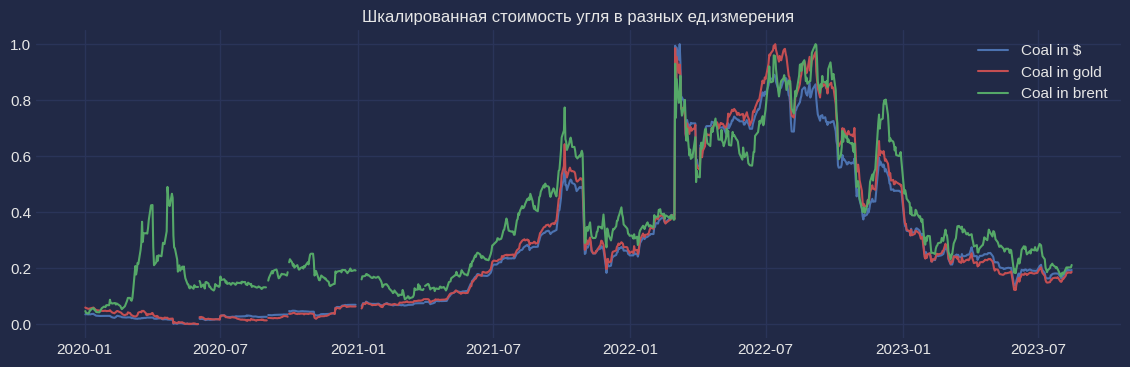

In [114]:
# График Шкалированнаной стоимость угля в разных ед.измерения
plt.figure(figsize=(14,4))
plt.plot(df_scaler['coal']['2020-01-01':], label='Coal in $', color='b')
plt.plot(df_gold_scaler['coal']['2020-01-01':], label='Coal in gold', color='r')
plt.plot(df_brent_scaler['coal']['2020-01-01':], label='Coal in brent', color='g')
plt.title('Шкалированная стоимость угля в разных ед.измерения')
plt.legend()
plt.show()

Обратите внимание на два "всплеска": начало COVID-19, и февраль-март 2022 - начало СВО России. Скоордиированный "всплеск" в октябре 2021 пока не проанализирован.  

In [115]:
# dataframe со шкалированной стоимостью угля при разных ед изм.
df2 = pd.concat([df_scaler['coal'], df_gold_scaler['coal'], df_brent_scaler['coal']], axis=1)

df2.columns = ['in_doll', 'in_gold', 'in_brent']

df2.dropna(how='any', inplace=True)

df2

in_doll  in_gold  in_brent
Date                                  
2010-12-17  0.20992  0.32102   0.20307
2010-12-20  0.20992  0.31889   0.19864
2010-12-21  0.21180  0.32067   0.19908
2010-12-22  0.21743  0.32890   0.20416
2010-12-23  0.21680  0.33018   0.20094
...             ...      ...       ...
2023-08-09  0.19341  0.18463   0.19948
2023-08-10  0.19204  0.18340   0.20272
2023-08-11  0.19329  0.18488   0.20256
2023-08-14  0.19128  0.18322   0.20256
2023-08-15  0.19329  0.18648   0.21125

[3040 rows x 3 columns]

#### 07.1 Корреляция стоимости угля выраженная в разных единицах измеренния
###### corr2


<a href="#top">К оглавлению</a>

In [116]:
# Корреляция стоимости угля выраженная в разных единицах измеренния

corr2 = df2.corr()
corr2

in_doll  in_gold  in_brent
in_doll   1.00000  0.96804   0.85811
in_gold   0.96804  1.00000   0.83628
in_brent  0.85811  0.83628   1.00000

Text(0.5, 1.0, 'Корреляция стоимости угля выраженная в разных единицах измеренния')

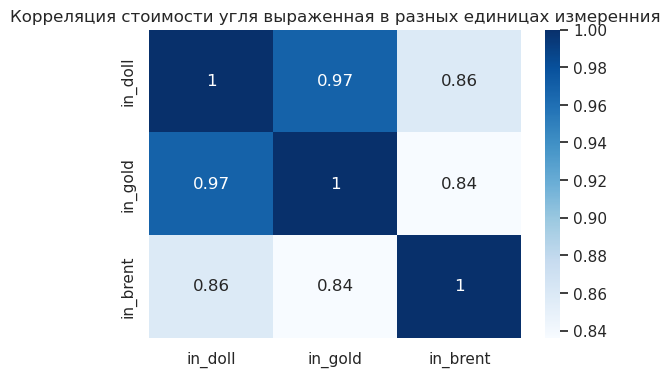

In [117]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(corr2, cmap='Blues', annot=True).set_title('Корреляция стоимости угля выраженная в разных единицах измеренния')

## <h2><a name="part_2"><b>Часть вторая</b></a></h2>

### 08. Построение прогнозов стоимости угля на основании использования библиотеки SKTIME
###### sktime



<a href="#top">К оглавлению</a>

#### 08.1 Метод прогнозирования SKTIME ARIMA

<a href="https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.forecasting.arima.ARIMA.html">sktime ARIMA</a>

Прогноз только по самому временному ряду стоимости угля.


In [118]:
# Расчет прогноза по самому временному ряду стоимости угля

y_d = df_day['coal'] # ежедневные данные

y_d

Date
2008-01-02       NaN
2008-01-03       NaN
2008-01-04       NaN
2008-01-05       NaN
2008-01-06       NaN
               ...  
2023-08-12       NaN
2023-08-13       NaN
2023-08-14    115.05
2023-08-15    115.85
2023-08-16       NaN
Freq: D, Name: coal, Length: 5706, dtype: float64

In [119]:

forecaster = ARIMA()

# forecaster = AutoARIMA(sp=12, d=0, max_p=2, max_q=2, suppress_warnings=True)

# или так можно задать:
# forecaster.fit(y, fh=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# задание периодов прогноза

fh = np.arange(1, 5)


# прогноз по дни
forecaster.fit(y_d)

y_pred_ARIMA_d = forecaster.predict(fh=fh)

y_pred_ARIMA_d



### 2023-06-09 
# oduleNotFoundError: ARIMA requires package 'pmdarima' to be present in the python environment, 
# but 'pmdarima' was not found. 'pmdarima' is a soft dependency and not included in the base sktime installation. 
# Please run: `pip install pmdarima` to install the pmdarima package. 
# To install all soft dependencies, run: `pip install sktime[all_extras]


2023-08-17    115.74126
2023-08-18    115.68722
2023-08-19    115.63339
2023-08-20    115.57977
Freq: D, Name: coal, dtype: float64

Прогноз от октября 2022:

2022-11-05    222.22353

2022-11-06    221.78808

2022-11-07    221.35449

2022-11-08    220.92274



Прогоз от 15 марта 2023:

2023-03-16    135.40383

2023-03-17    135.28157

2023-03-18    135.15985

2023-03-19    135.03866

Прогноз от 2023-06-09:

2023-06-10    112.41548
2023-06-11    112.37348
2023-06-12    112.33164
2023-06-13    112.28997

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='coal'>)

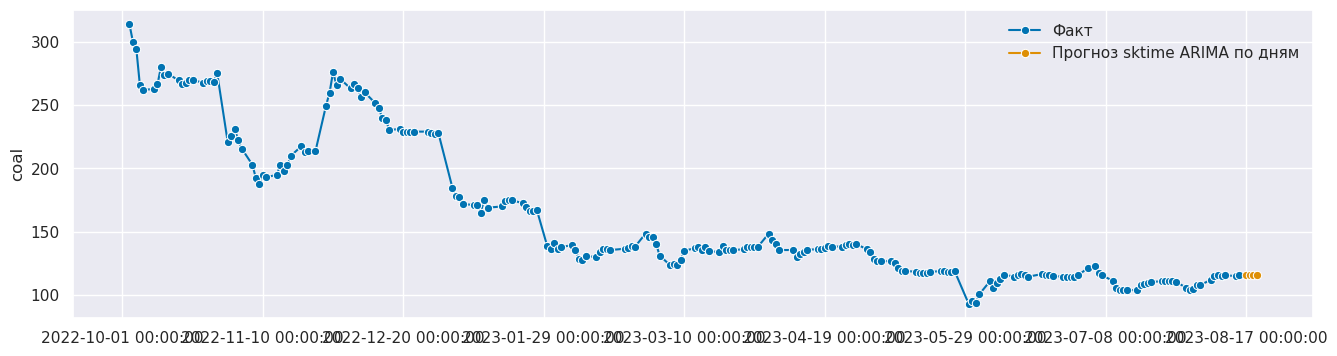

In [120]:
plot_series(y_d['2022-10-01':], y_pred_ARIMA_d, labels=["Факт", "Прогноз sktime ARIMA по дням"])


In [121]:
y_m = df_month['coal'] # ежемес данные

y_m

Date
2008-01-31          NaN
2008-02-29          NaN
2008-03-31          NaN
2008-04-30          NaN
2008-05-31          NaN
                ...    
2023-04-30    138.00474
2023-05-31    119.86045
2023-06-30    112.65429
2023-07-31    110.43750
2023-08-31    111.86364
Freq: M, Name: coal, Length: 188, dtype: float64

In [122]:
# прогноз по месяцы
forecaster.fit(y_m)

fh_m = np.arange(1, 4)

y_pred_ARIMA_m = forecaster.predict(fh=fh_m)

y_pred_ARIMA_m

2023-09-30    111.43233
2023-10-31    111.02440
2023-11-30    110.63857
Freq: M, Name: coal, dtype: float64

Прогноз по месяца от октября 2022:

2022-12-31    225.08039

2023-01-31    221.93905

2023-02-28    218.90548


Прогоз от 15 марта 2023:

2023-04-30    128.35539

2023-05-31    126.93890

2023-06-30    125.60092


Прогноз от 2023-06-09:


2023-07-31    105.38935
2023-08-31    105.26898
2023-09-30    105.15516

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='coal'>)

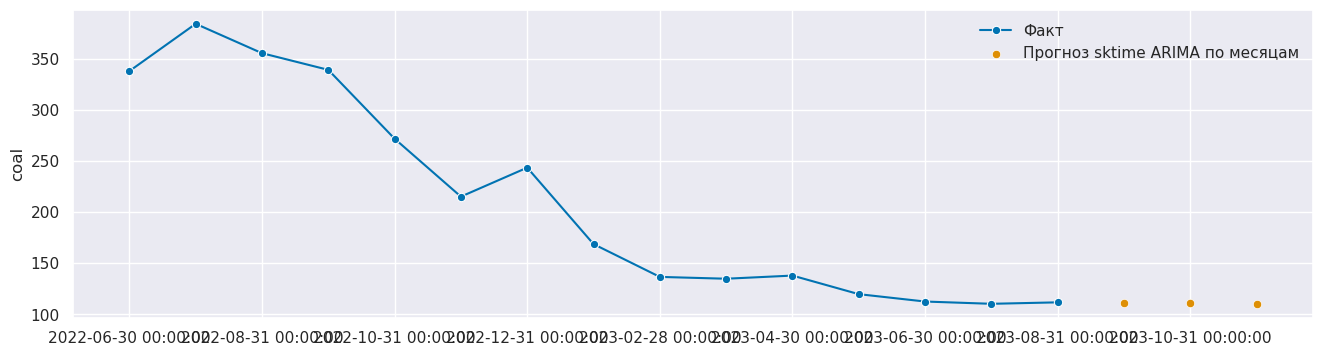

In [123]:
plot_series(y_m['2022-06-01':], y_pred_ARIMA_m, labels=["Факт", "Прогноз sktime ARIMA по месяцам"])

In [124]:
# forecaster.forecasters_

In [125]:
# вероятностный прогноз
coverage = 0.2
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage           
                  0.2           
                lower      upper
2023-09-30  106.31904  116.54561
2023-10-31  103.98636  118.06243
2023-11-30  102.24479  119.03236

Пргноз от октября 2022:

2022-12-31	219.76729	    230.39348

2023-01-31	214.55297	    229.32513

2023-02-28	210.01143	    227.79952



Прогноз от 15 марта 2023:

2023-04-30	123.52096	    133.18981

2023-05-31	120.28877	    133.58902

2023-06-30	117.67445	    133.52740


Прогноз от 2023-06-09:

2023-07-31	100.23679	110.54192
2023-08-31	98.17787	112.36008
2023-09-30	96.69923	113.61108



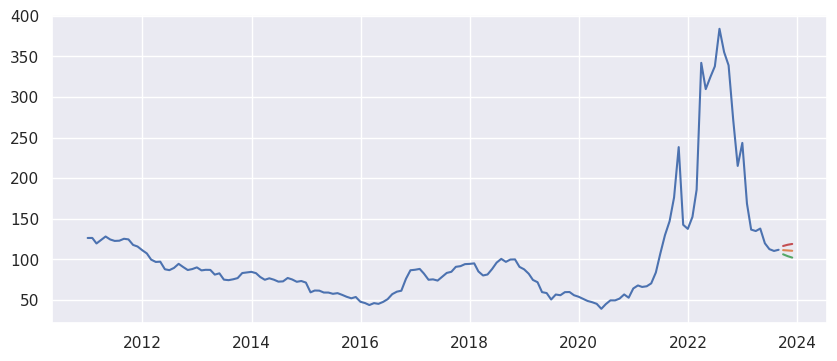

In [126]:
plt.figure(figsize=(10, 4))
plt.plot(y_m)
plt.plot(y_pred_ARIMA_m)
plt.plot(y_pred_ints)
plt.show()



predict_quantiles - квантильные прогнозы
sktime предлагает predict_quantiles в качестве унифицированного интерфейса для возврата квантильных значений прогнозов. Аналогично predict_interval.

predict_quantiles имеет аргумент alpha, содержащий запрашиваемые значения квантилей. Подобно случаю с predict_interval, alpha может быть значением с плавающей точкой или списком значений с плавающей точкой.

In [127]:
y_pred_quantiles = forecaster.predict_quantiles(alpha=[0.275, 0.975])
y_pred_quantiles

Quantiles           
               0.275      0.975
2023-09-30  99.36778  150.99015
2023-10-31  94.41849  165.47263
2023-11-30  90.83384  175.57525

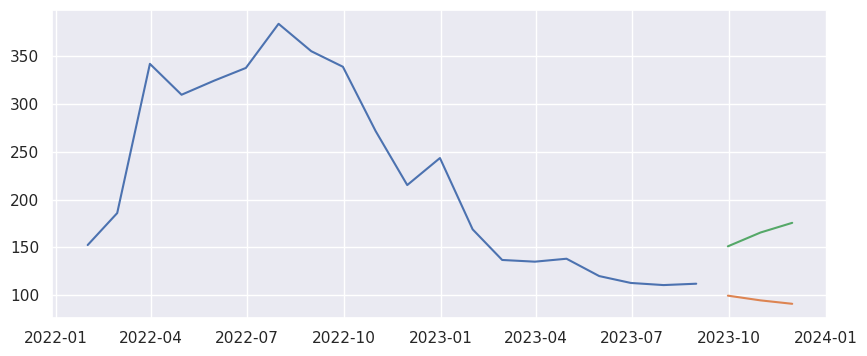

In [128]:
plt.figure(figsize=(10, 4))
plt.plot(y_m['2022-01-01':])
plt.plot(y_pred_quantiles)
plt.show()


In [129]:
# predict_var выдает предсказания дисперсии:
y_pred_var = forecaster.predict_var()
y_pred_var

0
2023-09-30   407.35071
2023-10-31   771.74071
2023-11-30  1097.70078

In [130]:
# predict_proba - прогнозы распределения
y_pred_proba = forecaster.predict_proba()
y_pred_proba

Normal(columns=Index(['coal'], dtype='object'),
       index=DatetimeIndex(['2023-09-30', '2023-10-31', '2023-11-30'], dtype='datetime64[ns]', freq='M'),
       mu=                 coal
2023-09-30  111.43233
2023-10-31  111.02440
2023-11-30  110.63857,
       sigma=                   0
2023-09-30  20.18293
2023-10-31  27.78022
2023-11-30  33.13157)

#### 08.2 Sktime. Метод прогнозирования VAR (векторная авторегрессия) в долл.

###### sktime.var


<a href="#top">К оглавлению</a>

In [131]:
# Напоминание:
# df со средн мес знач в долл.
# df_month

# df со средн мес знач в золоте.
# df_gold_month

# df со средн мес знач в нефти.
# df_brent_month

In [132]:
# Создание df со средн дневн и сред мес значениями

y_m = df_month['2015-01-01':] # ежемес знач
y_d = df_day['2015-01-01':] # ежедн знач

In [133]:


df_day1 = df_day.dropna(how='any')
df_day1.fillna(0, inplace=True)

y_d1 = df_day1['2015-01-01':] # ежедн знач без пропусков


/tmp/ipykernel_44299/3963326005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1.fillna(0, inplace=True)


In [134]:
# df среднемес знач
y_m

Ticker           NASDAQ          SP    aluminum     brent       coal  \
Date                                                                   
2015-01-31   4673.70149  2028.17851  2220.80000  49.68000   59.47632   
2015-02-28   4854.25583  2082.19579  2174.71053  58.44053   61.71176   
2015-03-31   4938.01045  2079.99044  2056.14773  56.93500   61.54950   
2015-04-30   4985.95143  2094.86284  2005.79762  60.96524   59.24471   
2015-05-31   5029.43147  2111.94352  1953.55000  65.60100   59.20000   
...                 ...         ...         ...       ...        ...   
2023-04-30  12073.46474  4121.46736  2357.92105  83.36895  138.00474   
2023-05-31  12446.53050  4146.17320  2284.15909  75.63227  119.86045   
2023-06-30  13463.77813  4345.37284  2209.16667  74.92571  112.65429   
2023-07-31  14033.09097  4508.07549  2160.68750  80.35550  110.43750   
2023-08-31  13846.73877  4488.48665  2139.60417  85.62833  111.86364   

Ticker           corn   cupper      gaz        gold    platinum    silver  
Date                                                                       
2015-01-31  388.10000  2.65322  2.92935  1252.92499  1245.72000  17.20000  
2015-02-28  383.68421  2.62363  2.75495  1224.91052  1199.63684  16.72021  
2015-03-31  382.94318  2.70793  2.74691  1177.76818  1140.41363  16.19436  
2015-04-30  373.96429  2.75276  2.59133  1199.82858  1154.72381  16.32014  
2015-05-31  359.23750  2.89338  2.85595  1198.21501  1141.61501  16.79985  
...               ...      ...      ...         ...         ...       ...  
2023-04-30  654.88158  4.00037  2.19726  2001.04736  1054.50527  25.09232  
2023-05-31  608.90909  3.74173  2.29932  1993.42273  1066.60000  24.30314  
2023-06-30  615.16667  3.79598  2.47462  1941.65238   979.62857  23.38852  
2023-07-31  548.62500  3.83570  2.63655  1950.76500   948.38500  24.20300  
2023-08-31  481.22917  3.77475  2.68425  1924.87500   907.33334  23.08358  

[104 rows x 11 columns]

In [135]:
y_m.isna().sum()

Ticker
NASDAQ      0
SP          0
aluminum    0
brent       0
coal        0
corn        0
cupper      0
gaz         0
gold        0
platinum    0
silver      0
dtype: int64

In [136]:
# y_m.dropna(how='any', inplace=True)

y_m.fillna(0, inplace=True)

/tmp/ipykernel_44299/268557846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_m.fillna(0, inplace=True)


In [137]:
# y_m.info()

# y_m.isna().sum()
y_m.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31',
               ...
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', name='Date', length=104, freq='M')

In [138]:
# df дневн знач с пропусками 
y_d

Ticker           NASDAQ          SP  aluminum  brent    coal    corn  cupper  \
Date                                                                           
2015-01-01          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2015-01-02   4726.81006  2058.19995   2168.50  56.42     NaN  395.75  2.8385   
2015-01-03          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2015-01-04          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2015-01-05   4652.56982  2020.57996   2148.25  53.11   63.65  406.00  2.7930   
...                 ...         ...       ...    ...     ...     ...     ...   
2023-08-12          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2023-08-13          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2023-08-14  13788.33008  4489.72021   2081.00  86.21  115.05  475.75  3.7245   
2023-08-15  13631.04980  4437.85986   2075.50  84.89  115.85  464.00  3.6615   
2023-08-16  13631.58496  4445.81006   2137.00  84.68     NaN  478.00  3.6750   

Ticker        gaz        gold    platinum  silver  
Date                                               
2015-01-01    NaN         NaN         NaN     NaN  
2015-01-02  3.003  1186.00000  1203.00000  15.734  
2015-01-03    NaN         NaN         NaN     NaN  
2015-01-04    NaN         NaN         NaN     NaN  
2015-01-05  2.882  1203.90002  1210.09998  16.179  
...           ...         ...         ...     ...  
2023-08-12    NaN         NaN         NaN     NaN  
2023-08-13    NaN         NaN         NaN     NaN  
2023-08-14  2.795  1910.59998   900.09998  22.644  
2023-08-15  2.659  1902.50000   885.90002  22.595  
2023-08-16  2.584  1935.40002   895.40002  22.670  

[3150 rows x 11 columns]

In [139]:
y_d.info()
# y_d.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3150 entries, 2015-01-01 to 2023-08-16
Freq: D
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NASDAQ    2170 non-null   float64
 1   SP        2170 non-null   float64
 2   aluminum  2132 non-null   float64
 3   brent     2163 non-null   float64
 4   coal      2118 non-null   float64
 5   corn      2166 non-null   float64
 6   cupper    2167 non-null   float64
 7   gaz       2168 non-null   float64
 8   gold      2167 non-null   float64
 9   platinum  2151 non-null   float64
 10  silver    2167 non-null   float64
dtypes: float64(11)
memory usage: 295.3 KB


In [140]:
# df дневн знач без пропусков 
y_d1.fillna(0, inplace=True)
y_d1

/tmp/ipykernel_44299/740862418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_d1.fillna(0, inplace=True)


Ticker           NASDAQ          SP  aluminum  brent    coal    corn  cupper  \
Date                                                                           
2015-01-05   4652.56982  2020.57996   2148.25  53.11   63.65  406.00  2.7930   
2015-01-06   4592.74023  2002.60999   2144.50  51.10   62.70  405.00  2.8040   
2015-01-07   4650.47021  2025.90002   2165.00  51.15   60.90  396.25  2.7960   
2015-01-08   4736.18994  2062.13989   2202.75  50.96   60.60  394.25  2.8070   
2015-01-09   4704.06982  2044.81006   2189.00  50.11   60.15  400.25  2.7905   
...                 ...         ...       ...    ...     ...     ...     ...   
2023-08-09  13722.01953  4467.70996   2122.75  87.55  115.90  481.00  3.7675   
2023-08-10  13737.99023  4468.83008   2154.75  86.40  115.35  483.25  3.7510   
2023-08-11  13644.84961  4464.04980   2115.25  86.81  115.85  474.50  3.7145   
2023-08-14  13788.33008  4489.72021   2081.00  86.21  115.05  475.75  3.7245   
2023-08-15  13631.04980  4437.85986   2075.50  84.89  115.85  464.00  3.6615   

Ticker        gaz        gold    platinum  silver  
Date                                               
2015-01-05  2.882  1203.90002  1210.09998  16.179  
2015-01-06  2.938  1219.30005  1220.80005  16.603  
2015-01-07  2.871  1210.59998  1220.69995  16.510  
2015-01-08  2.927  1208.40002  1221.69995  16.351  
2015-01-09  2.946  1216.00000  1229.09998  16.386  
...           ...         ...         ...     ...  
2023-08-09  2.959  1915.40002   886.20001  22.650  
2023-08-10  2.763  1914.40002   908.20001  22.746  
2023-08-11  2.770  1912.90002   907.90002  22.674  
2023-08-14  2.795  1910.59998   900.09998  22.644  
2023-08-15  2.659  1902.50000   885.90002  22.595  

[2062 rows x 11 columns]

In [141]:
# y_d1.info()
y_d1.isna().sum()
# y_d1.index


Ticker
NASDAQ      0
SP          0
aluminum    0
brent       0
coal        0
corn        0
cupper      0
gaz         0
gold        0
platinum    0
silver      0
dtype: int64

In [142]:
y_d1.asfreq('D')

Ticker           NASDAQ          SP  aluminum  brent    coal    corn  cupper  \
Date                                                                           
2015-01-05   4652.56982  2020.57996   2148.25  53.11   63.65  406.00  2.7930   
2015-01-06   4592.74023  2002.60999   2144.50  51.10   62.70  405.00  2.8040   
2015-01-07   4650.47021  2025.90002   2165.00  51.15   60.90  396.25  2.7960   
2015-01-08   4736.18994  2062.13989   2202.75  50.96   60.60  394.25  2.8070   
2015-01-09   4704.06982  2044.81006   2189.00  50.11   60.15  400.25  2.7905   
...                 ...         ...       ...    ...     ...     ...     ...   
2023-08-11  13644.84961  4464.04980   2115.25  86.81  115.85  474.50  3.7145   
2023-08-12          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2023-08-13          NaN         NaN       NaN    NaN     NaN     NaN     NaN   
2023-08-14  13788.33008  4489.72021   2081.00  86.21  115.05  475.75  3.7245   
2023-08-15  13631.04980  4437.85986   2075.50  84.89  115.85  464.00  3.6615   

Ticker        gaz        gold    platinum  silver  
Date                                               
2015-01-05  2.882  1203.90002  1210.09998  16.179  
2015-01-06  2.938  1219.30005  1220.80005  16.603  
2015-01-07  2.871  1210.59998  1220.69995  16.510  
2015-01-08  2.927  1208.40002  1221.69995  16.351  
2015-01-09  2.946  1216.00000  1229.09998  16.386  
...           ...         ...         ...     ...  
2023-08-11  2.770  1912.90002   907.90002  22.674  
2023-08-12    NaN         NaN         NaN     NaN  
2023-08-13    NaN         NaN         NaN     NaN  
2023-08-14  2.795  1910.59998   900.09998  22.644  
2023-08-15  2.659  1902.50000   885.90002  22.595  

[3145 rows x 11 columns]

In [143]:
# y_d1.index
y_d1.isna().sum()

Ticker
NASDAQ      0
SP          0
aluminum    0
brent       0
coal        0
corn        0
cupper      0
gaz         0
gold        0
platinum    0
silver      0
dtype: int64

In [144]:
# df для обучения беру без последних 2 значений
i = 2

y_m_train = y_m[:-i]

y_m_train

Ticker           NASDAQ          SP    aluminum     brent       coal  \
Date                                                                   
2015-01-31   4673.70149  2028.17851  2220.80000  49.68000   59.47632   
2015-02-28   4854.25583  2082.19579  2174.71053  58.44053   61.71176   
2015-03-31   4938.01045  2079.99044  2056.14773  56.93500   61.54950   
2015-04-30   4985.95143  2094.86284  2005.79762  60.96524   59.24471   
2015-05-31   5029.43147  2111.94352  1953.55000  65.60100   59.20000   
...                 ...         ...         ...       ...        ...   
2023-02-28  11785.07432  4079.68472  2424.82895  83.50947  136.71053   
2023-03-31  11637.09222  3968.55915  2314.63043  79.20696  134.93043   
2023-04-30  12073.46474  4121.46736  2357.92105  83.36895  138.00474   
2023-05-31  12446.53050  4146.17320  2284.15909  75.63227  119.86045   
2023-06-30  13463.77813  4345.37284  2209.16667  74.92571  112.65429   

Ticker           corn   cupper      gaz        gold    platinum    silver  
Date                                                                       
2015-01-31  388.10000  2.65322  2.92935  1252.92499  1245.72000  17.20000  
2015-02-28  383.68421  2.62363  2.75495  1224.91052  1199.63684  16.72021  
2015-03-31  382.94318  2.70793  2.74691  1177.76818  1140.41363  16.19436  
2015-04-30  373.96429  2.75276  2.59133  1199.82858  1154.72381  16.32014  
2015-05-31  359.23750  2.89338  2.85595  1198.21501  1141.61501  16.79985  
...               ...      ...      ...         ...         ...       ...  
2023-02-28  671.09211  4.08824  2.43747  1853.23685   951.63684  21.89637  
2023-03-31  637.39130  4.04915  2.40778  1912.96087   973.03478  21.97178  
2023-04-30  654.88158  4.00037  2.19726  2001.04736  1054.50527  25.09232  
2023-05-31  608.90909  3.74173  2.29932  1993.42273  1066.60000  24.30314  
2023-06-30  615.16667  3.79598  2.47462  1941.65238   979.62857  23.38852  

[102 rows x 11 columns]

In [145]:
# df для тестирования беру последние i значений

y_m_test = y_m[-i:]

y_m_test

Ticker           NASDAQ          SP    aluminum     brent       coal  \
Date                                                                   
2023-07-31  14033.09097  4508.07549  2160.68750  80.35550  110.43750   
2023-08-31  13846.73877  4488.48665  2139.60417  85.62833  111.86364   

Ticker           corn   cupper      gaz      gold   platinum    silver  
Date                                                                    
2023-07-31  548.62500  3.83570  2.63655  1950.765  948.38500  24.20300  
2023-08-31  481.22917  3.77475  2.68425  1924.875  907.33334  23.08358

In [146]:
# y_m_train.index
y_m_test.index

DatetimeIndex(['2023-07-31', '2023-08-31'], dtype='datetime64[ns]', name='Date', freq='M')

In [147]:
# прогноз VAR на train для следующих i периодов
fh=[1, 2] 
forecaster = VAR()
forecaster.fit(y_m_train, fh=fh) # y_m_train
y_m_pred = forecaster.predict()
y_m_pred

Ticker           NASDAQ          SP    aluminum     brent       coal  \
Date                                                                   
2023-07-31  13609.35273  4364.76719  2247.06128  72.59997  112.01273   
2023-08-31  13778.30345  4386.75829  2276.73886  71.82991  115.60090   

Ticker           corn   cupper      gaz        gold   platinum    silver  
Date                                                                      
2023-07-31  611.53397  3.82280  2.56604  1985.94002  979.63788  23.70208  
2023-08-31  611.54225  3.86736  2.61701  2031.16955  982.47049  24.13135

In [148]:
# Прогноз от октября 2022

# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# 2022-10-31	11022.47480	3747.62382	2054.62424	83.10507	298.17192	665.47727	3.31883	7.49401	1660.98394	879.93192	18.12086
# 2022-11-30	10653.74568	3639.38105	1907.67892	76.07661	280.64174	645.59887	3.17064	7.10013	1655.63304	889.65533	17.71014

# Прогноз от 15 октября 2023:


# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# 2023-02-28	11064.81593	3944.29704	2516.89268	87.82867	164.75180	648.04233	4.01485	3.73618	1958.93956	1026.58754	23.73452
# 2023-03-31	11149.86778	3922.83904	2463.51579	89.88762	172.29638	622.62755	3.87488	4.15659	1994.79756	994.66941	23.67449



# Прогноз от 2023-06-09:
# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# Date											
# 2023-05-31	12356.03401	4163.85714	2320.69926	82.47391	139.48830	648.95043	3.95734	2.66868	2034.20257	1027.24196	25.08633
# 2023-06-30	12605.97197	4196.86109	2282.52453	81.67902	145.56486	641.98883	3.91464	2.90323	2061.92958	1008.35977	25.14589

In [149]:
df_delta = y_m_test - y_m_pred
df_delta

Ticker         NASDAQ         SP   aluminum     brent     coal       corn  \
Date                                                                        
2023-07-31  423.73823  143.30830  -86.37378   7.75553 -1.57523  -62.90897   
2023-08-31   68.43532  101.72836 -137.13470  13.79842 -3.73727 -130.31308   

Ticker       cupper      gaz       gold  platinum   silver  
Date                                                        
2023-07-31  0.01290  0.07051  -35.17502 -31.25288  0.50092  
2023-08-31 -0.09261  0.06724 -106.29455 -75.13715 -1.04776

In [150]:
df_delta_pr = (df_delta / y_m_test * 100).round(2)

df_delta_pr

Ticker      NASDAQ    SP  aluminum  brent  coal   corn  cupper   gaz  gold  \
Date                                                                         
2023-07-31    3.02  3.18     -4.00   9.65 -1.43 -11.47    0.34  2.67 -1.80   
2023-08-31    0.49  2.27     -6.41  16.11 -3.34 -27.08   -2.45  2.50 -5.52   

Ticker      platinum  silver  
Date                          
2023-07-31     -3.30    2.07  
2023-08-31     -8.28   -4.54

In [151]:
# прогноз VAR на полном df

fh=[1, 2] 
forecaster = VAR()
forecaster.fit(y_m, fh=fh)
y_m_pred1 = forecaster.predict()
y_m_pred1

Ticker           NASDAQ          SP    aluminum     brent      coal  \
Date                                                                  
2023-09-30  14037.25108  4505.02031  2198.67279  80.36289  98.12955   
2023-10-31  14186.75855  4514.51324  2262.85160  77.19405  91.74047   

Ticker           corn   cupper      gaz        gold   platinum    silver  
Date                                                                      
2023-09-30  472.33075  3.71988  2.52828  1927.80999  879.11648  22.58599  
2023-10-31  470.03268  3.71858  2.39709  1947.52066  863.09234  22.41220

In [152]:
# Прогноз от октября 2022

# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# 2022-12-31	10095.38815	3653.12931	2207.13735	91.36506	227.72750	656.21026	3.30284	5.92458	1630.71689	927.29568	18.81098
# 2023-01-31	9622.75128	3525.90529	2129.62842	87.41021	225.74037	628.53211	3.13392	5.79529	1625.34470	912.38111	18.21636


# Прогноз от 15 октября 2022:

# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# 2023-04-30	11678.61052	3958.30899	2285.67372	81.95777	128.63773	594.41993	3.89382	2.72105	1888.70078	943.52230	20.97088
# 2023-05-31	11925.07310	3966.62690	2236.61238	80.66609	131.30668	562.18753	3.75486	2.88779	1911.46634	921.55002	21.07172



# Прогноз от 2023-06-09:
# Ticker	NASDAQ	SP	aluminum	brent	coal	corn	cupper	gaz	gold	platinum	silver
# Date											
# 2023-07-31	13349.03776	4282.96826	2258.71315	73.88578	107.08447	593.86030	3.77808	2.46909	1996.56001	1015.23659	24.03900
# 2023-08-31	13513.72796	4299.25512	2268.67219	72.97452	112.75701	595.76091	3.80837	2.60059	2030.11958	1009.32738	24.36763

# то есть в в июне прогноз на июль: 107.08, август: 112.74


# 2023-08-16 факт115.85, а прогноз на сентябрь 98.13
# Ticker	    NASDAQ	SP	aluminum	brent	                coal	corn	cupper	gaz	gold	platinum	silver
# Date											
# 2023-09-30	14037.25108	4505.02031	2198.67279	80.36289	98.12955	472.33075	3.71988	2.52828	1927.80999	879.11648	22.58599
# 2023-10-31	14186.75855	4514.51324	2262.85160	77.19405	91.74047	470.03268	3.71858	2.39709	1947.52066	863.09234	22.41220


Факт ст-ть угля:  Date
2023-07-31    110.0
2023-08-31    112.0
Freq: M, Name: coal, dtype: float64
----
Прогноз ст-ти угля:  Date
2023-09-30    98.0
2023-10-31    92.0
Name: coal, dtype: float64


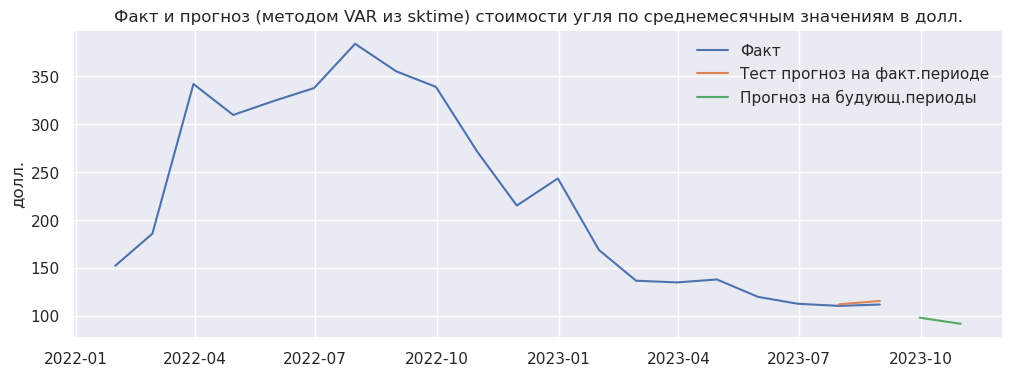

In [153]:
print('Факт ст-ть угля: ', (y_m['coal'][-2:]).round(0))
print('----')
print('Прогноз ст-ти угля: ', (y_m_pred1['coal']).round(0))

plt.figure(figsize=(12, 4))
plt.plot(y_m['coal']['2022-01-01':], label='Факт')
plt.plot(y_m_pred['coal'], label='Тест прогноз на факт.периоде')
plt.plot(y_m_pred1['coal'], label='Прогноз на будующ.периоды')
plt.title('Факт и прогноз (методом VAR из sktime) стоимости угля по среднемесячным значениям в долл.')
plt.ylabel('долл.')
plt.legend()
plt.show()


#### Finish

<a name="Finish">Окончание</a>

<a href="#top">К оглавлению</a>

Коммерсант2022-10-27 № 200
### Торг уместен, но не очень велик

По мере ослабления глобального
роста мировые цены на сырьевые
товары также продолжат снижаться,
но из-за укрепления доллара США
в местных валютах они по-прежне-
му будут оставаться высокими, что
будет оказывать дополнительное
давление на инфляцию, говорится
в обзоре сырьевых рынков от Все-
мирного банка (ВБ). Так, стоимость
нефти марки Brent с февраля снизи-
лась на 6%, но 60% стран-импорте-
ров нефти и 90% импортеров зерна
столкнулись с ростом цен, выражен-
ных в национальных валютах.
В ВБ ждут, что цены на энерго-
ресурсы после роста в этом году
на 60% снизятся на 11% в 2023-м
и еще на 12% в 2024-м, но и после
этого останутся на 50% выше, чем
в среднем за пять лет. Этот же фак-
тор скажется на увеличении стои-
мости электроэнергии и повыше-
нии транспортных издержек. Цены
на газ в Европе и на уголь, пере-
возимый по морю, уже превыша-
ют средние за пять лет показате-
ли на 420% и 180% — удорожа-
ние природного газа также приве-
дет к увеличению потребления угля.
При этом средняя цена нефти мар-
ки Brent, как ожидается, снизится
со $100 за баррель в 2022 году до
$92 за баррель в 2023-м и $80 за
баррель в 2024-м.

Цены же на неэнергетическое
сырье в третьем квартале этого
года уже снизились на 13% к пре-
дыдущему кварталу, в том числе на
ценные металлы — на 9%, на сель-
хозсырье — на 11% (сейчас они
превышают прошлогодний уро-
вень на 9%). По итогам года ин-
декс стоимости неэнергетическо-
го сырья, как ожидается, вырастет
на 10,5%, в следующем году цены
могут снизиться на 8,1%. Так, сто-
имость металлов после снижения
в этом году на 2% по прогнозу ВБ
упадет на 15% (на это влияет в том
числе спад на рынке недвижимости
в Китае), а затем стабилизирует-
ся. Цены на продовольствие в этом
году вырастут на 13,4% (в том чис-
ле на зерно — на 20,6%), а в сле-
дующем могут снизиться на 5%,
ожидают в банке. Этот прогноз,
однако, подвержен значитель-
ным рискам как в краткосрочной,
так и среднесрочной перспекти-
ве, полагают в ВБ. Более высокие
цены на энергоресурсы, к приме-
ру, могут поддержать повышение
цен и на другое сырье, в частно-
сти, на удобрения: их стоимость за
год увеличится на 66,1%, в следу-
ющем году ожидается ее снижение
на 12,4%. Также прогноз предус-
матривает возвращение на рынок
большего объема поставок продо-
вольствия с Украины.
Татьяна Едовина